Reading data

In [1]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt, seaborn as sns

In [2]:
raw_data=pd.read_csv(r"telecom_churn_data.csv")
# raw_data=pd.read_csv(r"D:\Churn Data\Churn-\telecom_churn_data.csv")
raw_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


dropping 'mobile_number ' & 'circle_id'

In [3]:
raw_data.shape

(99999, 226)

In [4]:
data=raw_data.copy()

In [5]:
data.drop(columns=['mobile_number', 'circle_id'],  inplace=True)

In [6]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [7]:

data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=224)

creating churn columns 

In [8]:
for i in ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']:
    print(f'for {i} null % is ',data[i].isna().sum())

for total_ic_mou_9 null % is  0
for total_og_mou_9 null % is  0
for vol_2g_mb_9 null % is  0
for vol_3g_mb_9 null % is  0


In [9]:
data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,188.04,72.11,0.00,0.00
2,517.74,124.94,0.00,8.42
3,305.38,362.54,0.00,0.00
4,205.31,104.59,0.00,0.00
...,...,...,...,...
99994,154.43,27.14,0.00,0.00
99995,108.84,106.41,0.00,0.00
99996,0.00,0.00,0.00,0.00
99997,2.21,0.00,85.67,4177.14


In [10]:
data['churn']=((data['total_ic_mou_9']+data['total_og_mou_9']+data['vol_3g_mb_9']+data['vol_2g_mb_9'])==0).astype('int')
# data.drop(columns=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'], inplace=True)
data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn'],
      dtype='object', length=225)

as we have to predict on churm month i.e month 9 
so segrating month 9 data togrther i.e. TEST data

In [11]:
col=data.columns.to_list()
churn_col=[i for i in col if i.endswith('9')]
data[churn_col].isna().sum()/data.shape[0]


last_date_of_month_9        0.016590
arpu_9                      0.000000
onnet_mou_9                 0.077451
offnet_mou_9                0.077451
roam_ic_mou_9               0.077451
roam_og_mou_9               0.077451
loc_og_t2t_mou_9            0.077451
loc_og_t2m_mou_9            0.077451
loc_og_t2f_mou_9            0.077451
loc_og_t2c_mou_9            0.077451
loc_og_mou_9                0.077451
std_og_t2t_mou_9            0.077451
std_og_t2m_mou_9            0.077451
std_og_t2f_mou_9            0.077451
std_og_t2c_mou_9            0.077451
std_og_mou_9                0.077451
isd_og_mou_9                0.077451
spl_og_mou_9                0.077451
og_others_9                 0.077451
total_og_mou_9              0.000000
loc_ic_t2t_mou_9            0.077451
loc_ic_t2m_mou_9            0.077451
loc_ic_t2f_mou_9            0.077451
loc_ic_mou_9                0.077451
std_ic_t2t_mou_9            0.077451
std_ic_t2m_mou_9            0.077451
std_ic_t2f_mou_9            0.077451
s

In [12]:
selcted=[i for i in data.columns if (data[i].dtype== 'int' or data[i].dtype== 'float') and data[i].max()<=1 ]
data[selcted].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,churn
count,98981.0,98981.0,98981.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968,0.101911
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987,0.302533
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


droping columns such as 'loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,
std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_7, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_t2o_mou_9
' as maximum value in these is zero 0 and rest missing

In [13]:
data.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'],inplace=True)
churn_col.remove('std_og_t2c_mou_9')
churn_col.remove('std_ic_t2o_mou_9')


In [14]:
# Updating the list of columns


In [15]:
selcted= [i for i in selcted if i not in ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9']]
selcted

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'churn']

In [16]:
data.columns.nunique()

214

In [17]:
data[selcted].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,churn
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000
mean,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968,0.101911
std,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987,0.302533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Print missing data percentage before filling NaN
print(f'Missing data % in feature\n', data[selcted].isna().sum() / data[selcted].shape[0])

# Fill missing values with 0



Missing data % in feature
 night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
churn               0.000000
dtype: float64


In [19]:
for i in selcted:
    data[i].fillna(0, inplace=True)

# Print missing data percentage after filling NaN


In [20]:
print(f'Missing data % in feature post filling NaN\n', data[selcted].isna().sum() / data[selcted].shape[0])

Missing data % in feature post filling NaN
 night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
churn               0.0
dtype: float64


In [21]:
data.shape[1]

214

In [22]:
numerrical_col=data.columns.difference(selcted)

In [23]:
data[numerrical_col].describe()

,aon,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_6,arpu_7,arpu_8,arpu_9,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9
count,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.

In [24]:
for i in numerrical_col:
    if data[i].isna().sum()/data.shape[0]>0.4:
        print(i,data[i].isna().sum()/data.shape[0])
        data[i].fillna(0,inplace=True)
# it miight be possible that people didn't use Internet/recharge/ so we can't drop there columns
# imputing missing values with 0


arpu_2g_6 0.7484674846748467
arpu_2g_7 0.7442874428744287
arpu_2g_8 0.7366073660736607
arpu_2g_9 0.7407774077740777
arpu_3g_6 0.7484674846748467
arpu_3g_7 0.7442874428744287
arpu_3g_8 0.7366073660736607
arpu_3g_9 0.7407774077740777
av_rech_amt_data_6 0.7484674846748467
av_rech_amt_data_7 0.7442874428744287
av_rech_amt_data_8 0.7366073660736607
av_rech_amt_data_9 0.7407774077740777
count_rech_2g_6 0.7484674846748467
count_rech_2g_7 0.7442874428744287
count_rech_2g_8 0.7366073660736607
count_rech_2g_9 0.7407774077740777
count_rech_3g_6 0.7484674846748467
count_rech_3g_7 0.7442874428744287
count_rech_3g_8 0.7366073660736607
count_rech_3g_9 0.7407774077740777
date_of_last_rech_data_6 0.7484674846748467
date_of_last_rech_data_7 0.7442874428744287
date_of_last_rech_data_8 0.7366073660736607
date_of_last_rech_data_9 0.7407774077740777
max_rech_data_6 0.7484674846748467
max_rech_data_7 0.7442874428744287
max_rech_data_8 0.7366073660736607
max_rech_data_9 0.7407774077740777
total_rech_data_6 0.

In [25]:
date_col=data.columns.str.contains('date')
data.columns[date_col]

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [26]:
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
#  dropping these columns as last date of month have same data in it and for last recharge date it has more than 70 % data ,missing
data.drop(columns=data.columns[date_col], inplace=True)
churn_col.remove('date_of_last_rech_data_9')
churn_col.remove('date_of_last_rech_9')
churn_col.remove('last_date_of_month_9')



In [27]:
for i in data.columns:
    print(i,data[i].isna().sum()/data.shape[0])

arpu_6 0.0
arpu_7 0.0
arpu_8 0.0
arpu_9 0.0
onnet_mou_6 0.03937039370393704
onnet_mou_7 0.03859038590385904
onnet_mou_8 0.05378053780537805
onnet_mou_9 0.07745077450774508
offnet_mou_6 0.03937039370393704
offnet_mou_7 0.03859038590385904
offnet_mou_8 0.05378053780537805
offnet_mou_9 0.07745077450774508
roam_ic_mou_6 0.03937039370393704
roam_ic_mou_7 0.03859038590385904
roam_ic_mou_8 0.05378053780537805
roam_ic_mou_9 0.07745077450774508
roam_og_mou_6 0.03937039370393704
roam_og_mou_7 0.03859038590385904
roam_og_mou_8 0.05378053780537805
roam_og_mou_9 0.07745077450774508
loc_og_t2t_mou_6 0.03937039370393704
loc_og_t2t_mou_7 0.03859038590385904
loc_og_t2t_mou_8 0.05378053780537805
loc_og_t2t_mou_9 0.07745077450774508
loc_og_t2m_mou_6 0.03937039370393704
loc_og_t2m_mou_7 0.03859038590385904
loc_og_t2m_mou_8 0.05378053780537805
loc_og_t2m_mou_9 0.07745077450774508
loc_og_t2f_mou_6 0.03937039370393704
loc_og_t2f_mou_7 0.03859038590385904
loc_og_t2f_mou_8 0.05378053780537805
loc_og_t2f_mou_9 

focusiing only on Missing columns

In [28]:
num_col=[i for i in data.columns if data[i].isna().sum()/data.shape[0]>0]

In [29]:
len(num_col)


108

In [30]:
for i in num_col:
    print(i, data[i].isna().sum()/data.shape[0])

onnet_mou_6 0.03937039370393704
onnet_mou_7 0.03859038590385904
onnet_mou_8 0.05378053780537805
onnet_mou_9 0.07745077450774508
offnet_mou_6 0.03937039370393704
offnet_mou_7 0.03859038590385904
offnet_mou_8 0.05378053780537805
offnet_mou_9 0.07745077450774508
roam_ic_mou_6 0.03937039370393704
roam_ic_mou_7 0.03859038590385904
roam_ic_mou_8 0.05378053780537805
roam_ic_mou_9 0.07745077450774508
roam_og_mou_6 0.03937039370393704
roam_og_mou_7 0.03859038590385904
roam_og_mou_8 0.05378053780537805
roam_og_mou_9 0.07745077450774508
loc_og_t2t_mou_6 0.03937039370393704
loc_og_t2t_mou_7 0.03859038590385904
loc_og_t2t_mou_8 0.05378053780537805
loc_og_t2t_mou_9 0.07745077450774508
loc_og_t2m_mou_6 0.03937039370393704
loc_og_t2m_mou_7 0.03859038590385904
loc_og_t2m_mou_8 0.05378053780537805
loc_og_t2m_mou_9 0.07745077450774508
loc_og_t2f_mou_6 0.03937039370393704
loc_og_t2f_mou_7 0.03859038590385904
loc_og_t2f_mou_8 0.05378053780537805
loc_og_t2f_mou_9 0.07745077450774508
loc_og_t2c_mou_6 0.03937

In [31]:
data[num_col].describe(percentiles=[.90,.95,.99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.281794,107.475650,107.120493,108.460515,106.155471,12.084305,12.599697,11.751834,12.173105,167.491059,167.719540,167.432575,164.619293,9.575993,10.011904,9.883921,9.432479,20.722240,21.656415,21.183211,19.620913,2.156397,2.216923,2.085004,2.173419,32.457179,33.887833,33.154735,31.229344,0.061557,0.033585,0.040361,0.1

In [32]:
# It might be possibel that people didn't rechrged  thier phn 
data[['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']]
data.fillna(0, inplace=True)

In [33]:
# as theer is a huge difference between mean nd median tere are outliers in the data
# impoting median
for i in num_col:
    
    if data[i].dtype=='int' or data[i].dtype=='float':
        data[i].fillna(0, inplace=True)

In [34]:
data.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000

In [35]:
churn_data=data[churn_col]
data.drop(columns=churn_col, inplace=True)
churn_data

,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,last_day_rch_amt_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9
0,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
1,86.285,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,72.11,0.00,0.00,0.0,0.00,0.0,0.00,0.0,72.11,116.09,56.93,0.00,173.03,0.00,15.01,0.00,15.01,188.04,0.00,0.00,0.00,5,121,50,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
2,290.714,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,64.81,8.76,9.28,0.0,18.04,0.0,42.08,0.0,124.94,148.23,38.98,158.19,345.41,49.44,118.18,3.86,171.49,517.74,0.45,0.01,0.36,7,358,100,0,1.0,46.0,1.0,0.0,46.0,0.00,8.42,2.84,0.00,0.0,0,1,0,0,1.0
3,389.500,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,83.03,226.21,9.99,0.0,236.21,0.0,43.29,0.0,362.54,41.73,52.86,65.59,160.19,129.84,13.98,0.00,143.83,305.38,0.55,0.00,0.80,14,410,50,30,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
4,163.426,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,98.61,0.00,0.00,0.0,0.00,0.0,5.98,0.0,104.59,154.56,48.24,0.00,202.81,2.31,0.00,0.00,2.31,205.31,0.18,0.00,0.00,4,200,50,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,29.950,0.00,27.14,0.00,0.00,0.00,24.78,2.25,0.11,27.03,0.00,0.00,0.0,0.00,0.0,0.11,0.0,27.14,22.06,82.89,49.46,154.43,0.00,0.00,0.00,0.00,154.43,0.00,0.00,0.00,2,50,50,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
99995,140.835,49.49,56.13,0.95,4.23,49.49,46.71,3.28,0.00,99.49,0.00,1.90,0.0,1.90,0.0,5.01,0.0,106.41,25.71,63.44,18.44,107.61,0.00,1.23,0.00,1.23,108.84,0.00,0.00,0.00,1,30,30,30,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
99996,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
99997,731.010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,2.21,0.00,2.21,0.00,0.00,0.00,0.00,2.21,0.00,0.00,0.00,6,862,252,179,4.0,252.0,0.0,4.0,862.0,85.67,4177.14,725.69,725.68,0.0,0,0,4,0,1.0


# segrating high value customers 
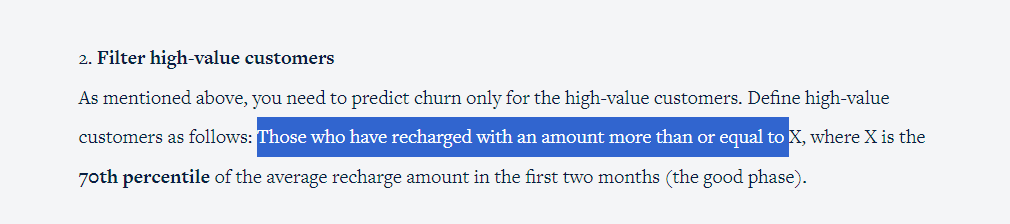

In [36]:
rech=data.columns.str.contains('rech')
data.columns[rech]

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

# what needs to be done
total_rech_amount= total_mobile_rech_6+total_mobile_rech_7+(av_recharge_data_6*total_rech_data_7)+(av_recharge_data_6*total_rech_data_7)

In [37]:
data['total_rech_amount_6_7']=(data['total_rech_amt_6']+data['total_rech_amt_7']+(data['av_rech_amt_data_6']*data['total_rech_data_6'])+(data['av_rech_amt_data_7']*data['total_rech_data_7']))/2
data['total_rech_amount_6_7'].quantile(.7)
data=data[data['total_rech_amount_6_7']>=data['total_rech_amount_6_7'].quantile(.7)]


In [64]:
data.shape

(30001, 153)

EDA

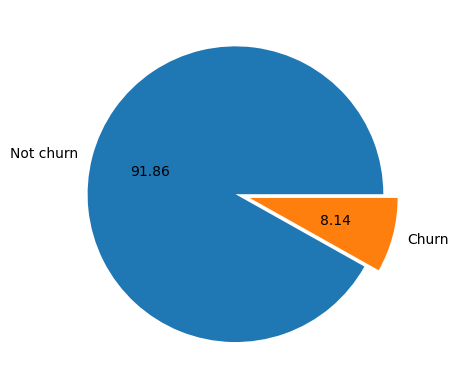

In [38]:
plt.pie(x=data['churn'].value_counts(), explode=[0,.1], labels=['Not churn','Churn'], autopct='%.2f');

In [39]:
# 8.2% churn in 3 month

In [40]:
# reading data based on total recharge cost monthwise

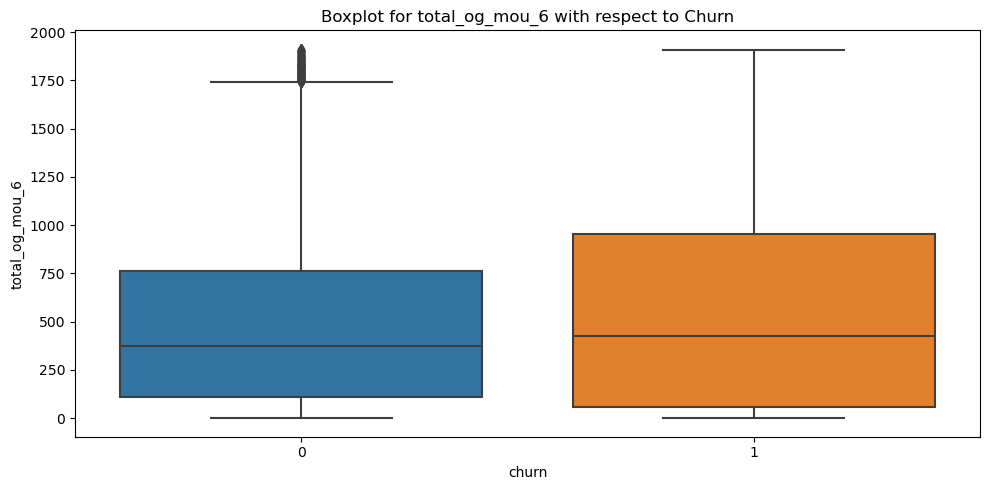

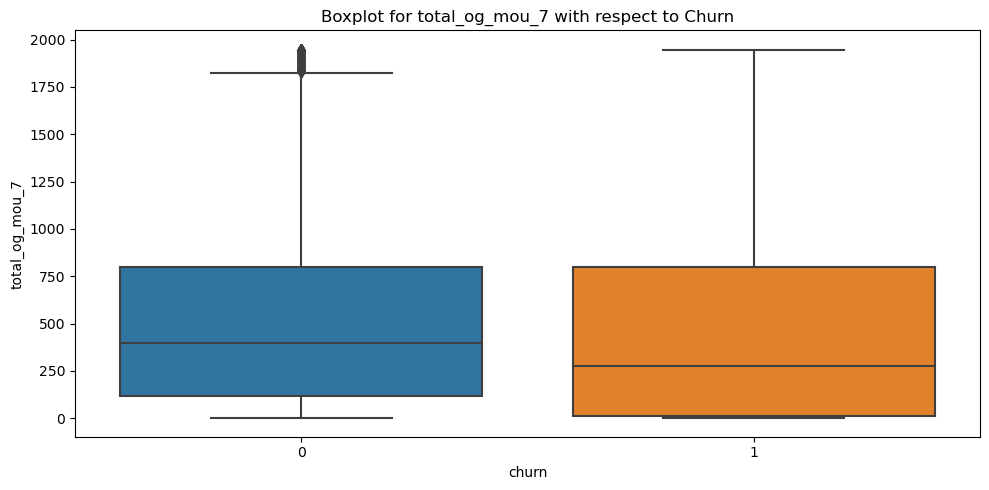

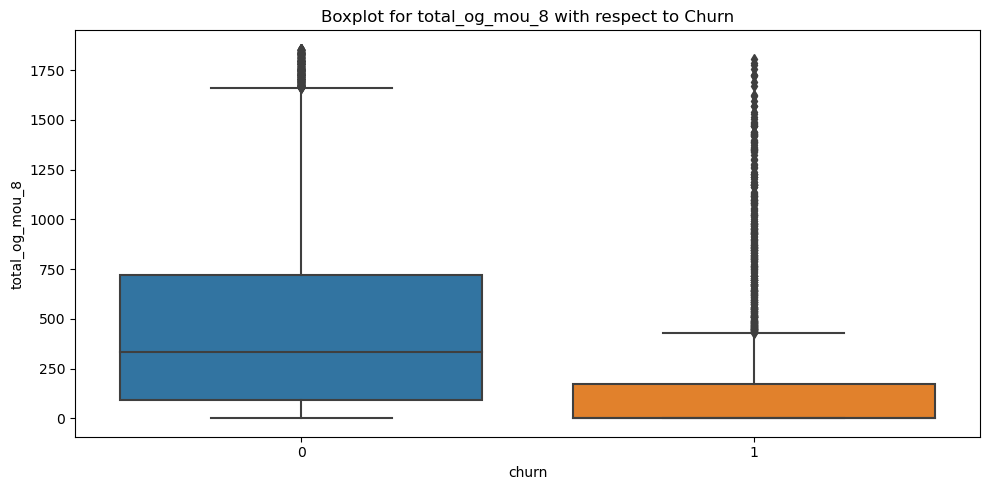

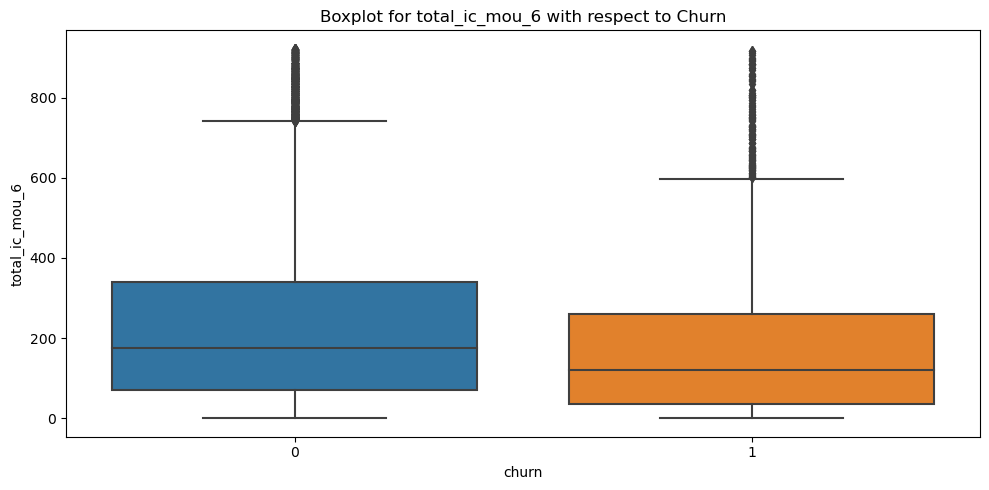

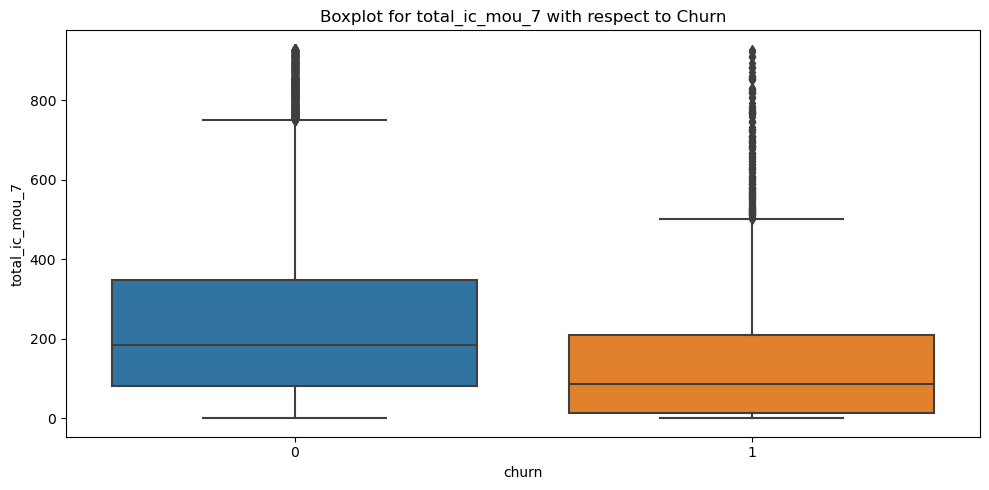

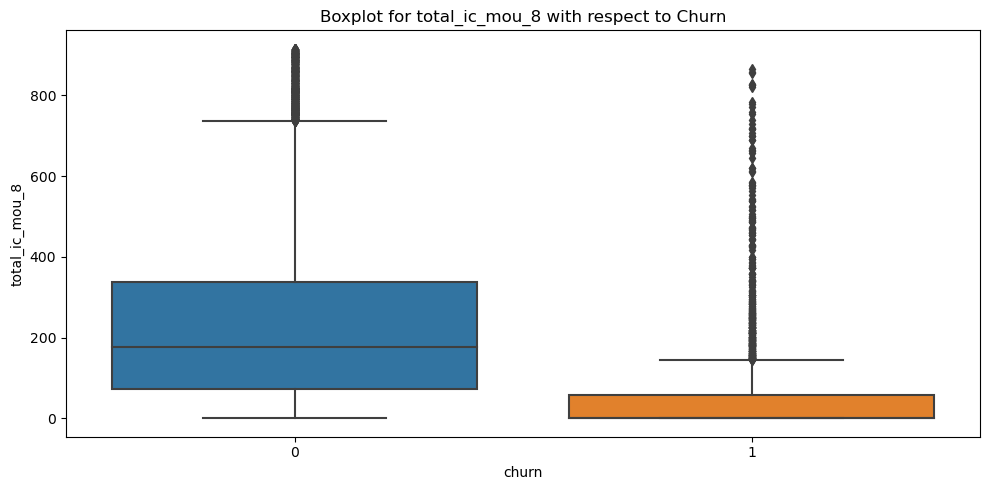

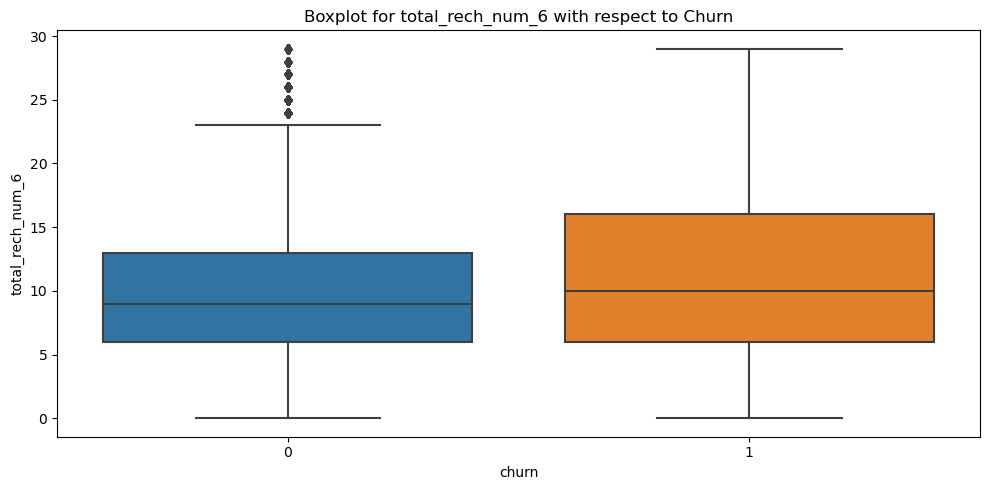

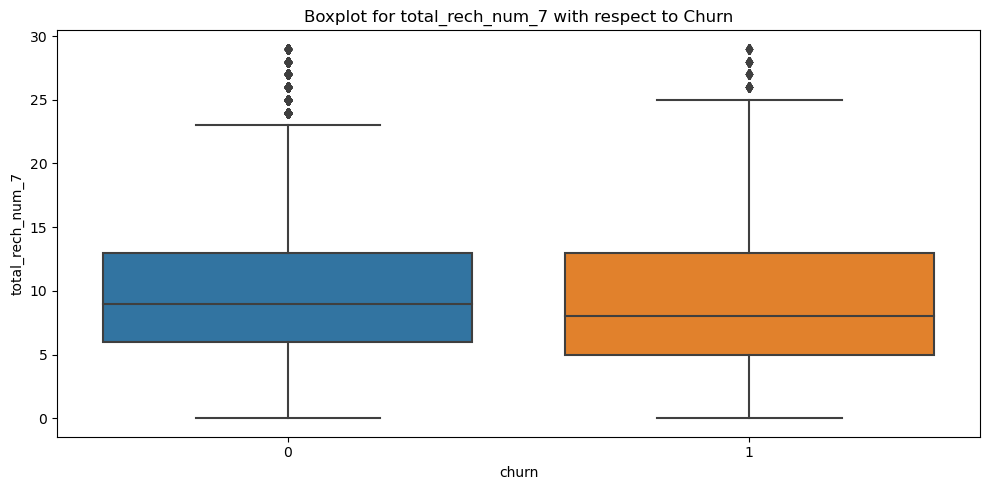

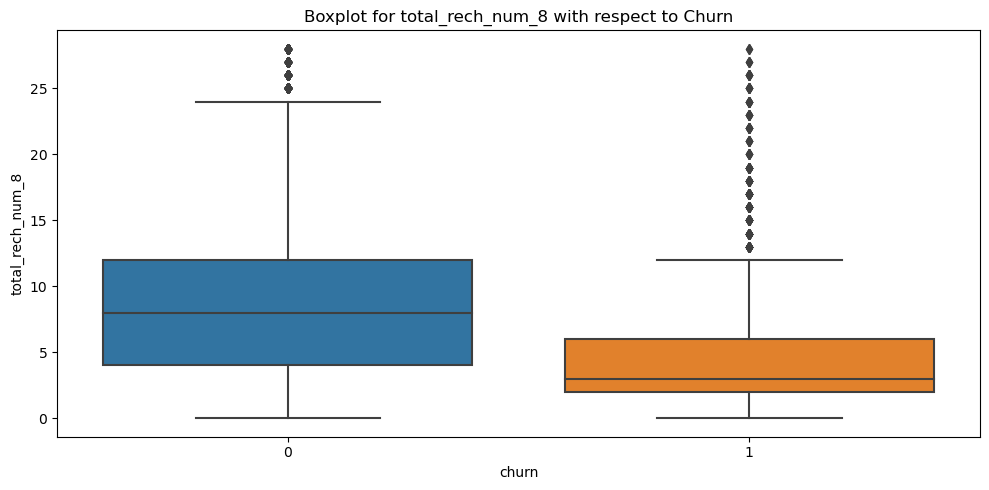

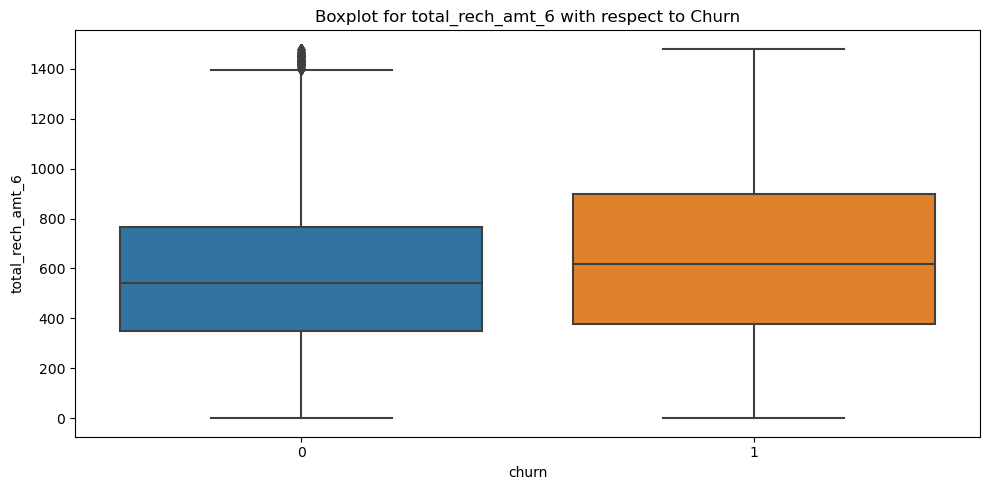

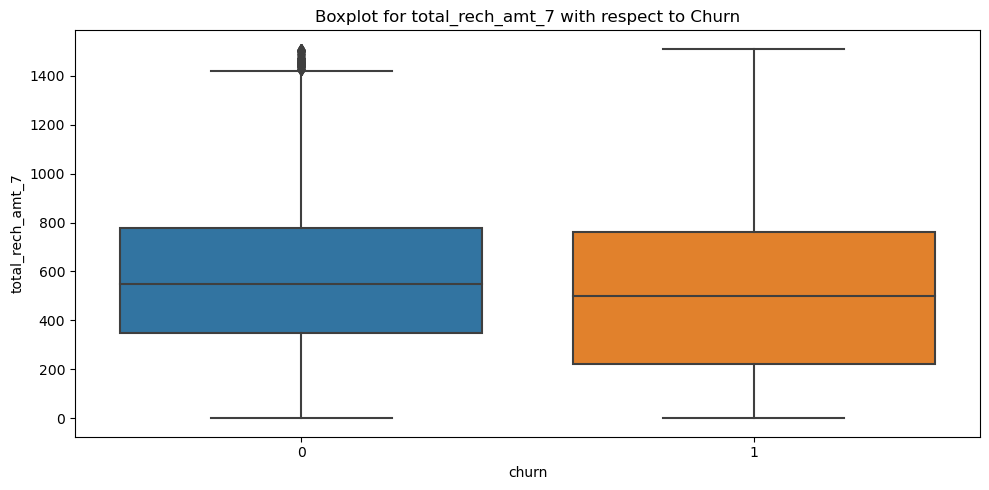

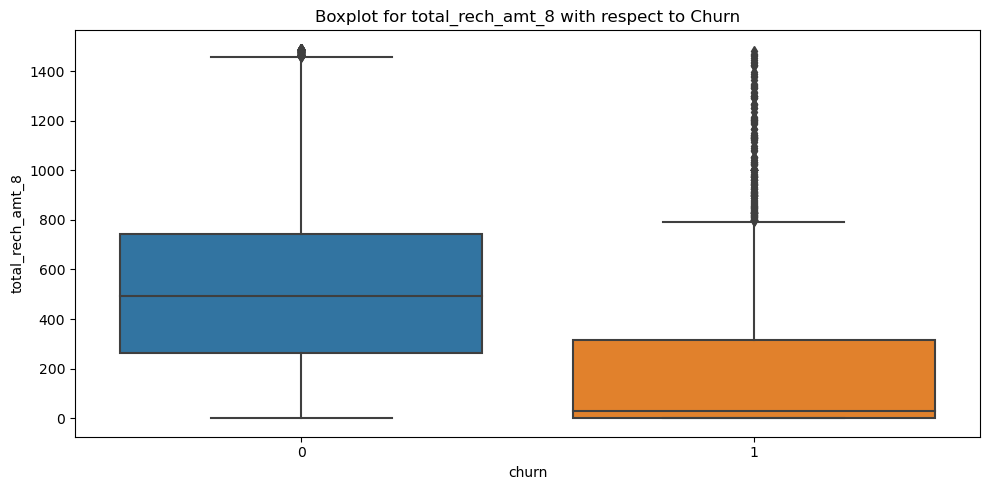

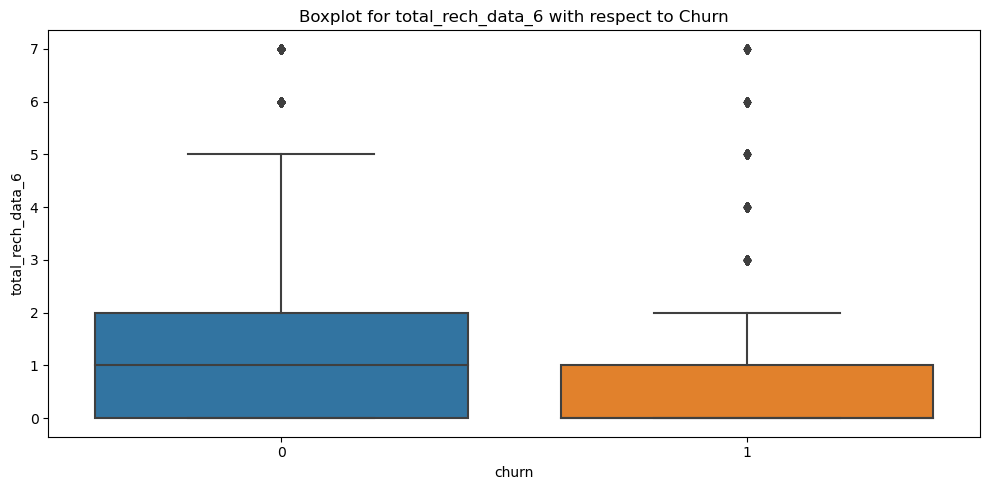

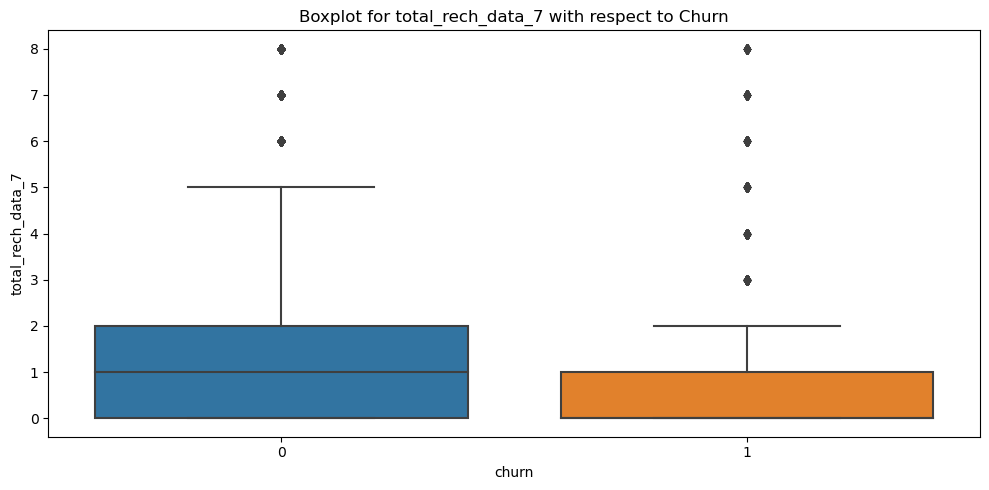

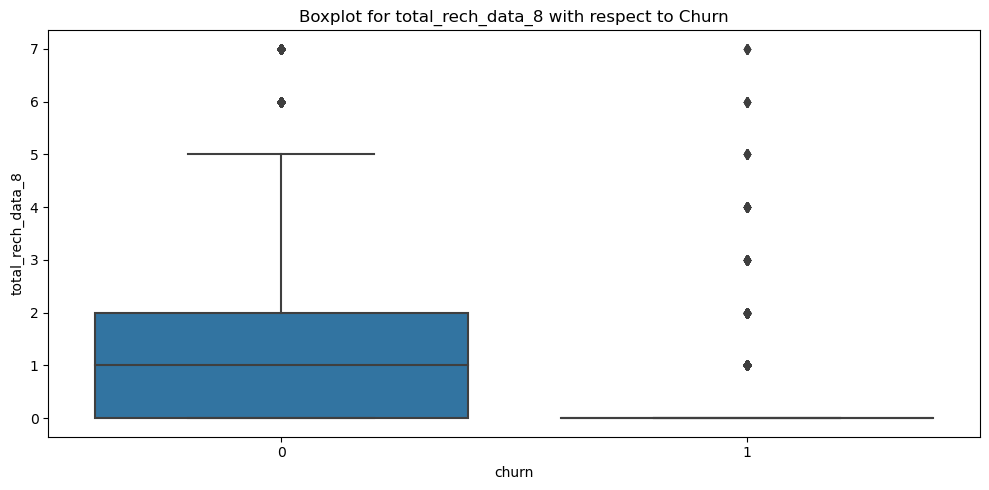

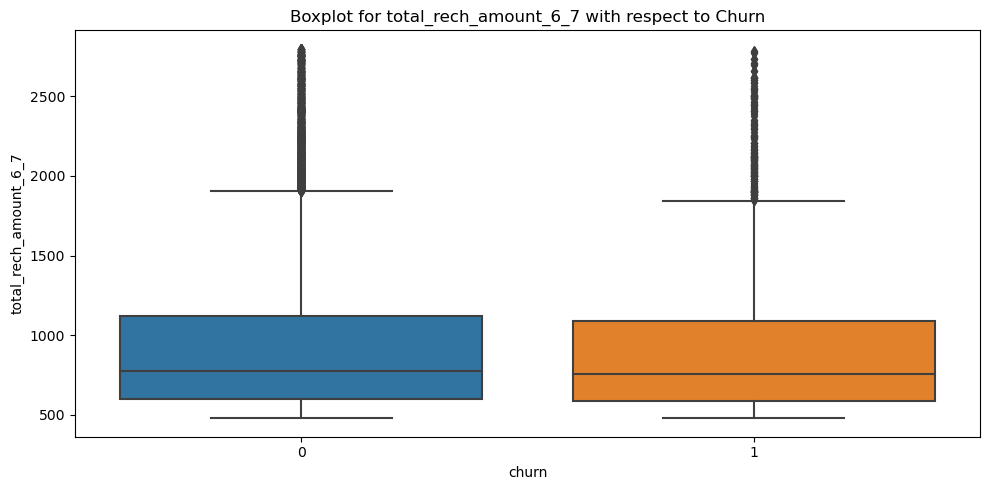

In [41]:

rech_columns = data.columns[data.columns.str.contains('total')]

# Loop through rech_columns
for i in rech_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    sns.boxplot(x='churn', y=i, data=data_ct)
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()


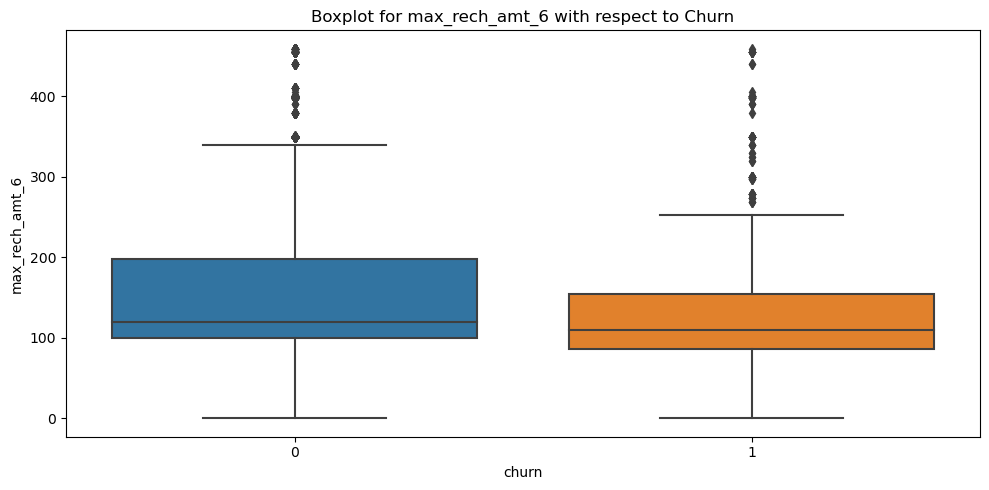

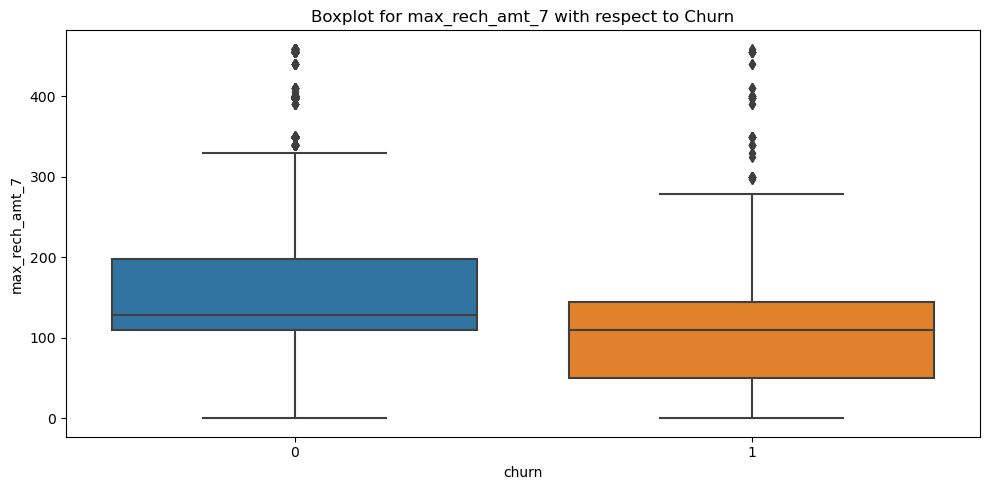

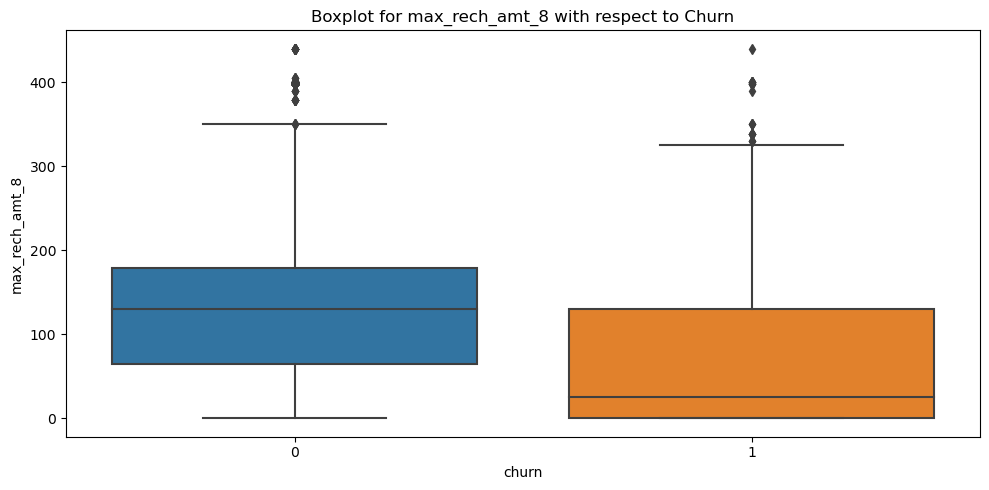

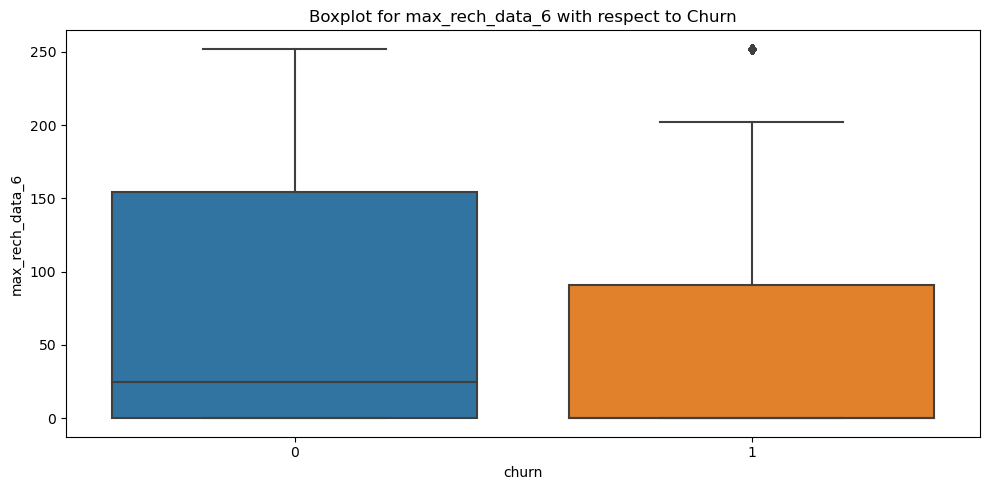

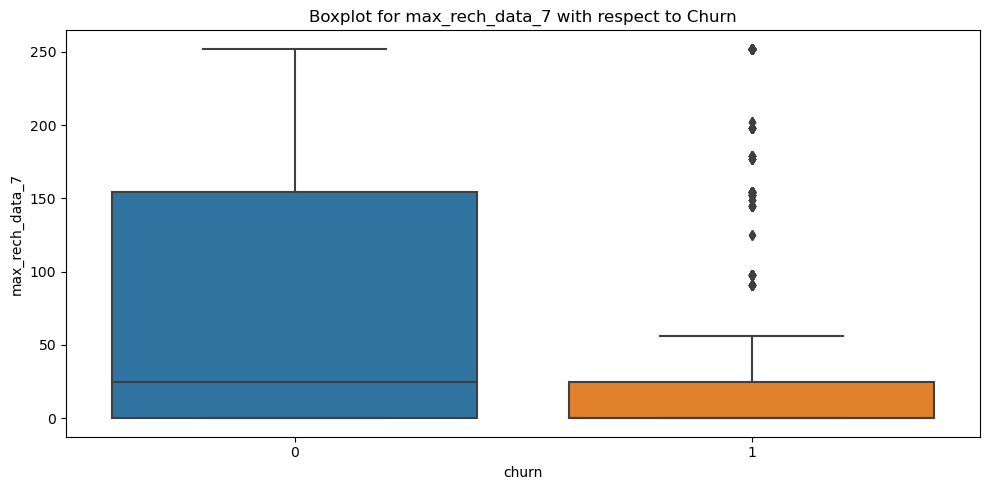

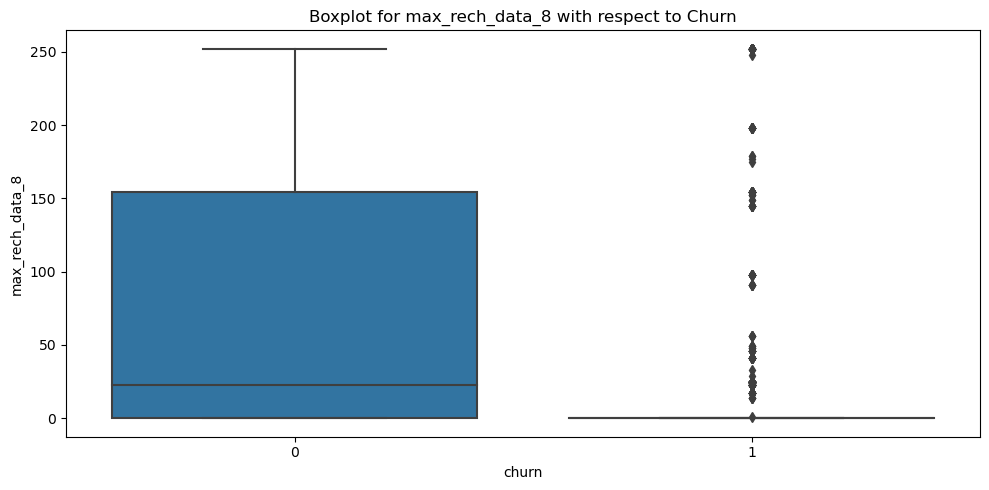

In [42]:

max_columns = data.columns[data.columns.str.contains('max')]

# Loop through rech_columns
for i in max_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    sns.boxplot(x='churn', y=i, data=data_ct)
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

In [43]:
data.describe(percentiles=[.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_amount_6_7
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

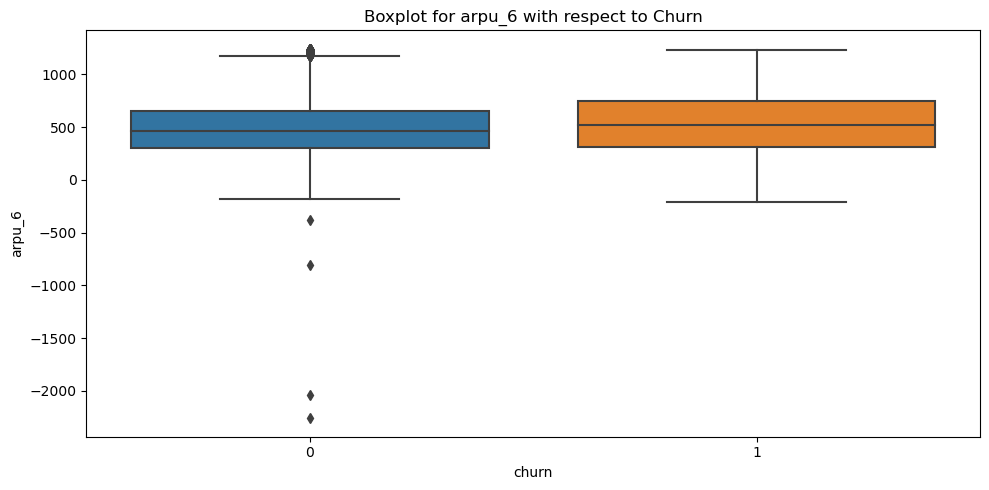

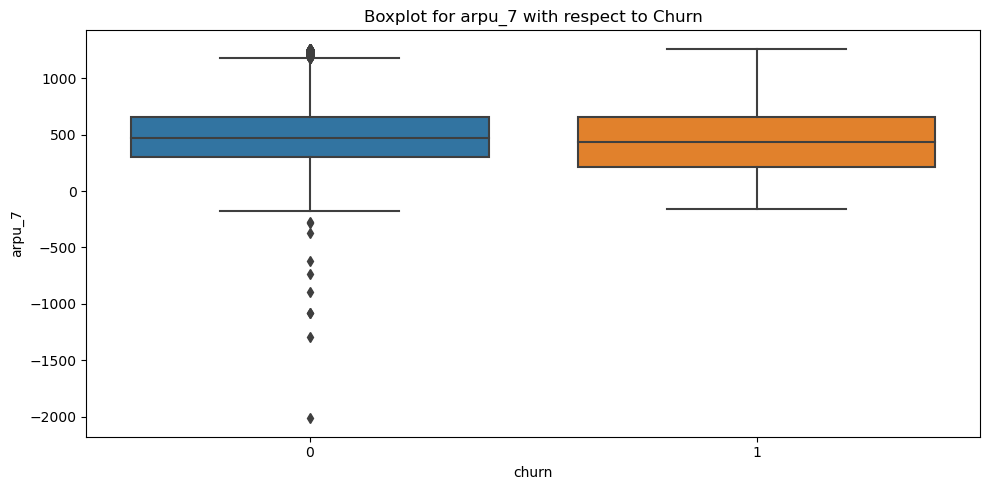

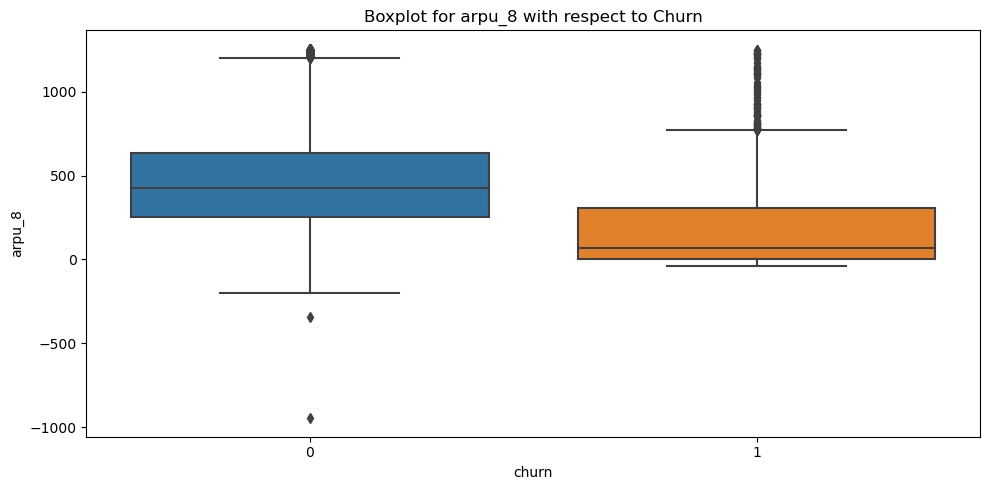

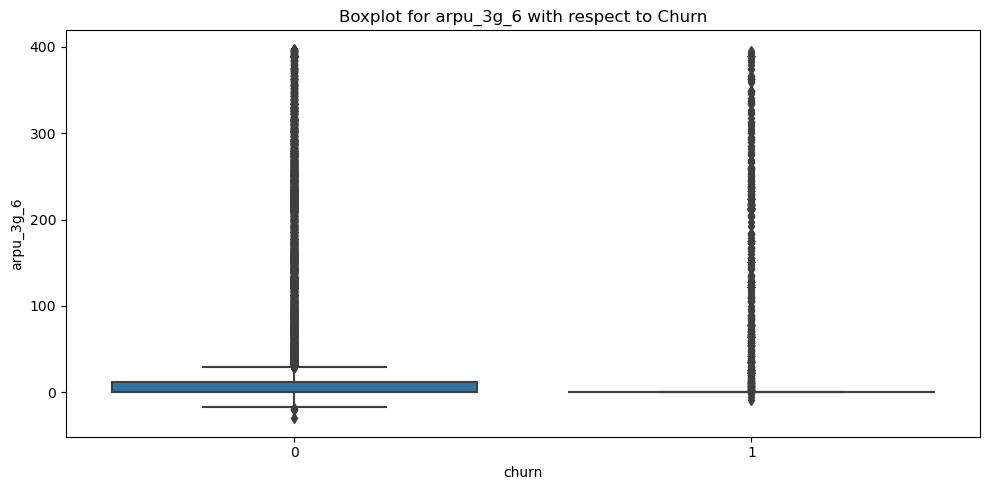

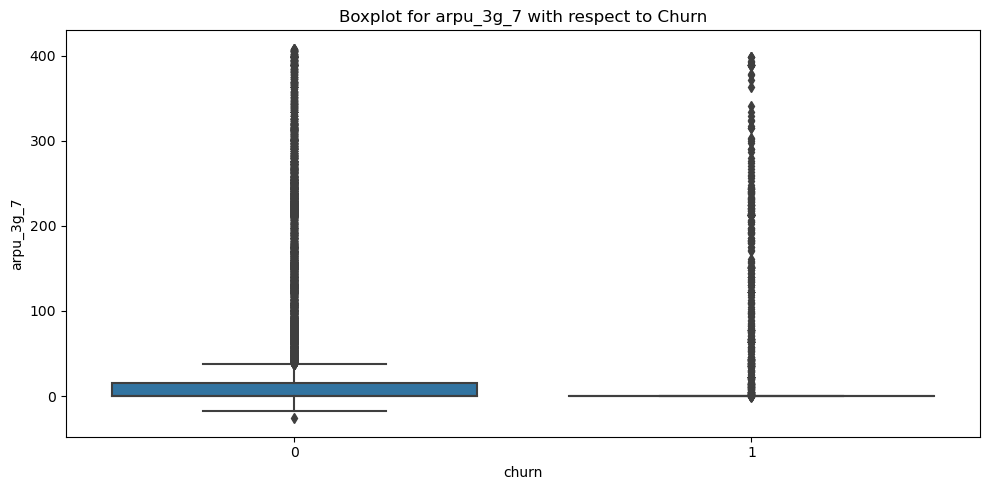

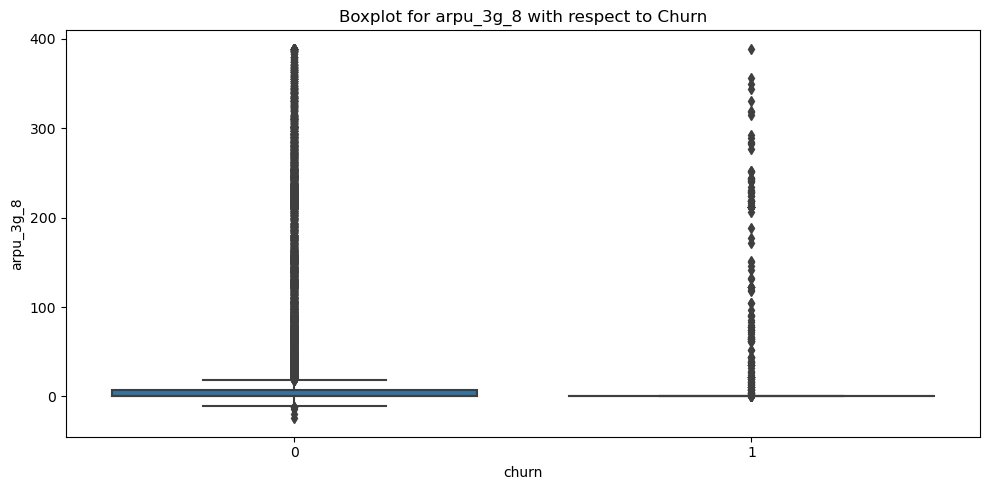

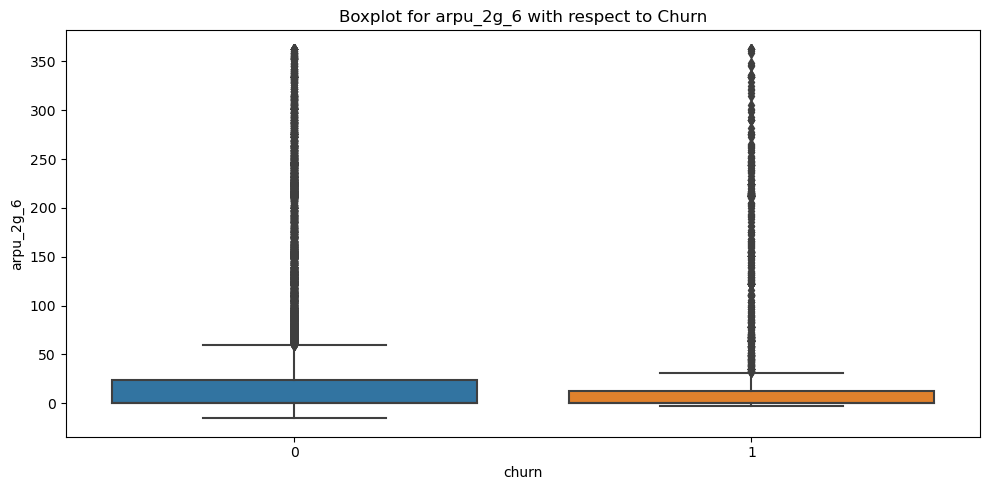

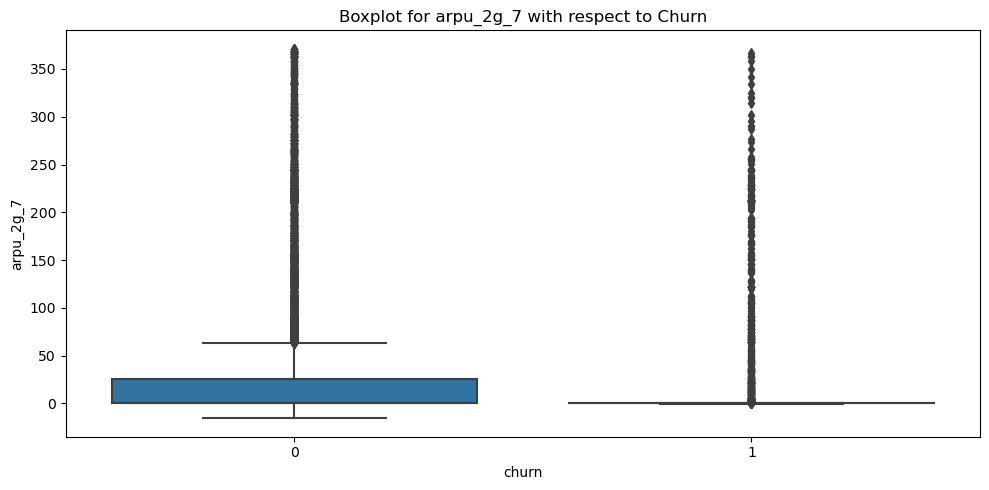

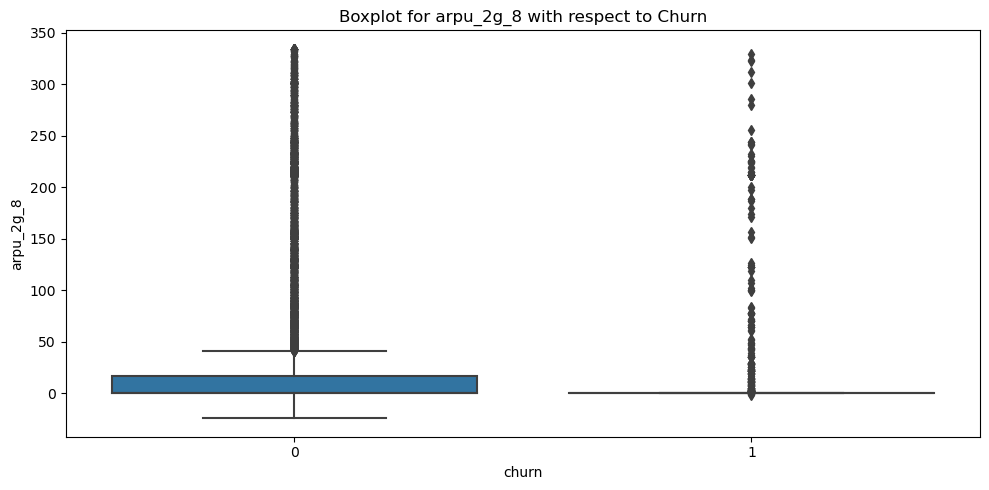

In [44]:

arpu_columns = data.columns[data.columns.str.contains('arpu')]

# Loop through rech_columns
for i in arpu_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.boxplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

<Axes: xlabel='churn', ylabel='aon'>

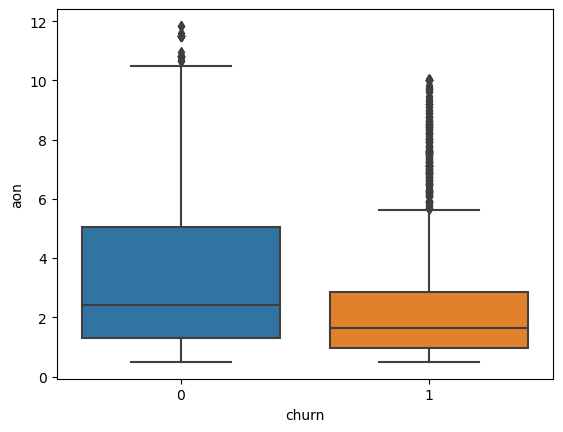

In [45]:
sns.boxplot(x=data['churn'],y=data['aon']/365, data=data)

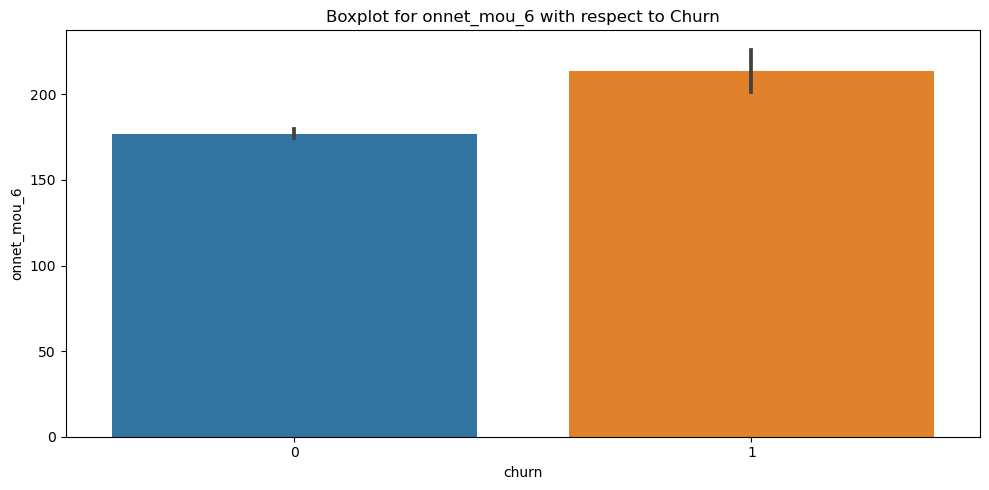

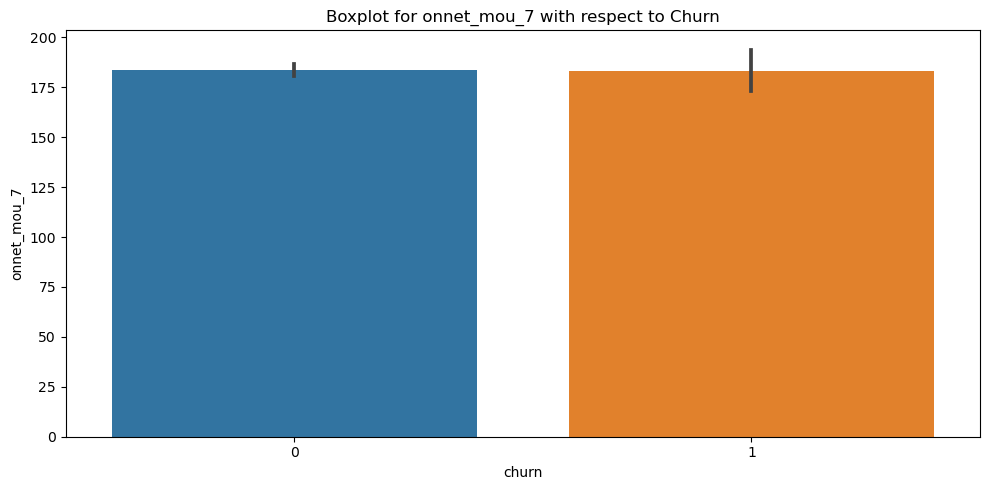

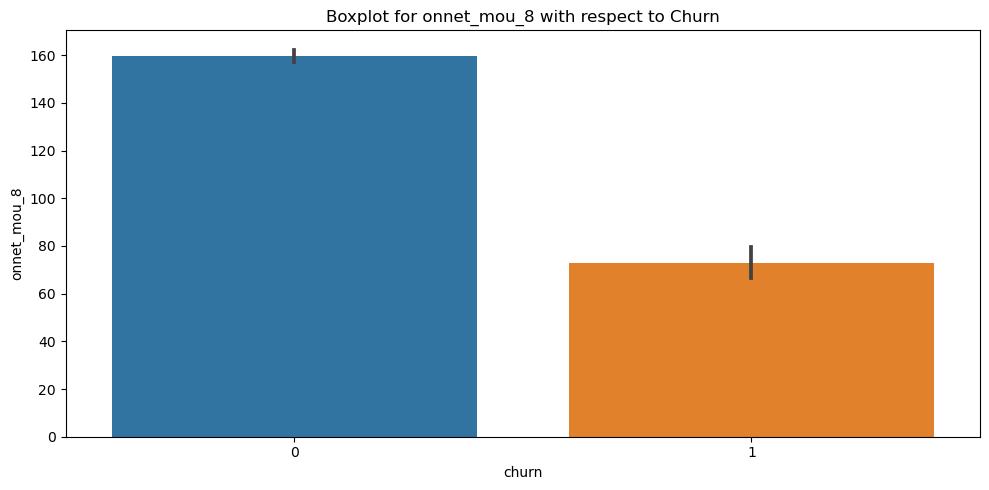

In [46]:
onnet_columns = data.columns[data.columns.str.contains('onnet')]

# Loop through rech_columns
for i in onnet_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

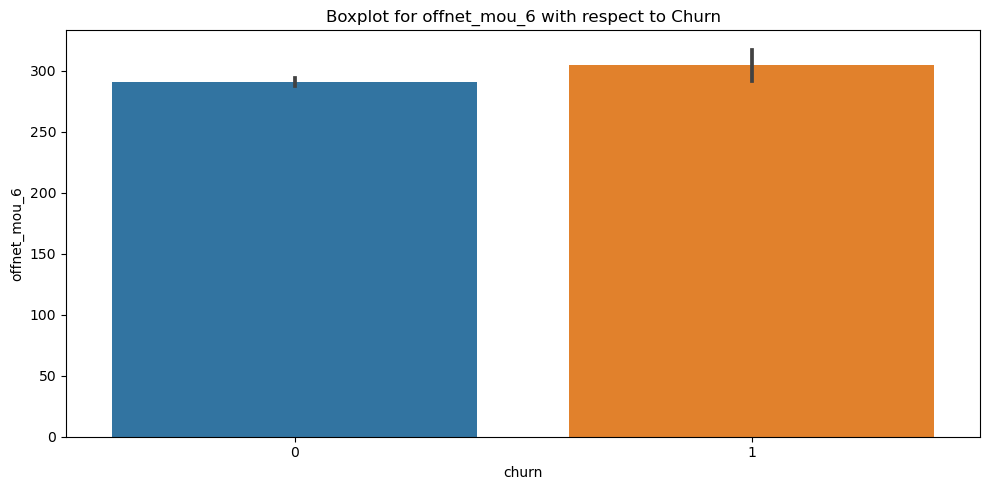

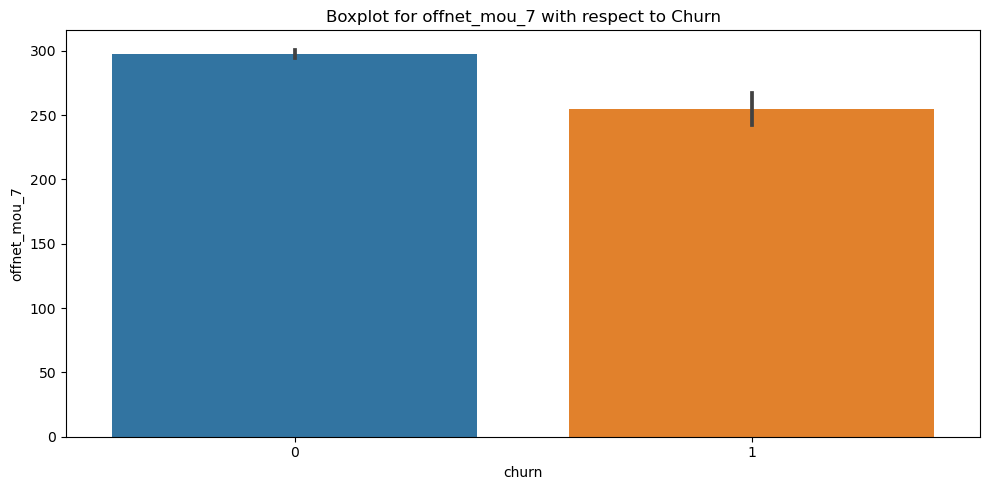

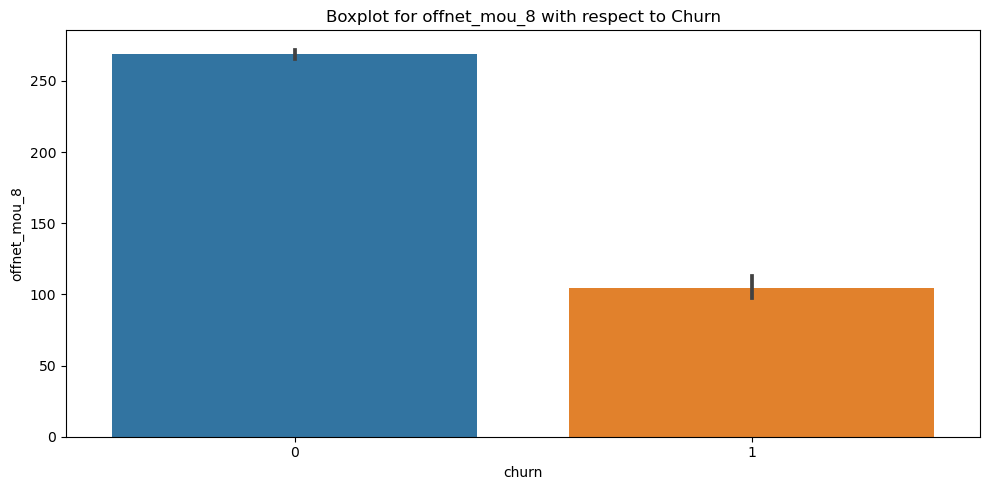

In [47]:
offnet_columns = data.columns[data.columns.str.contains('offnet')]

# Loop through rech_columns
for i in offnet_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

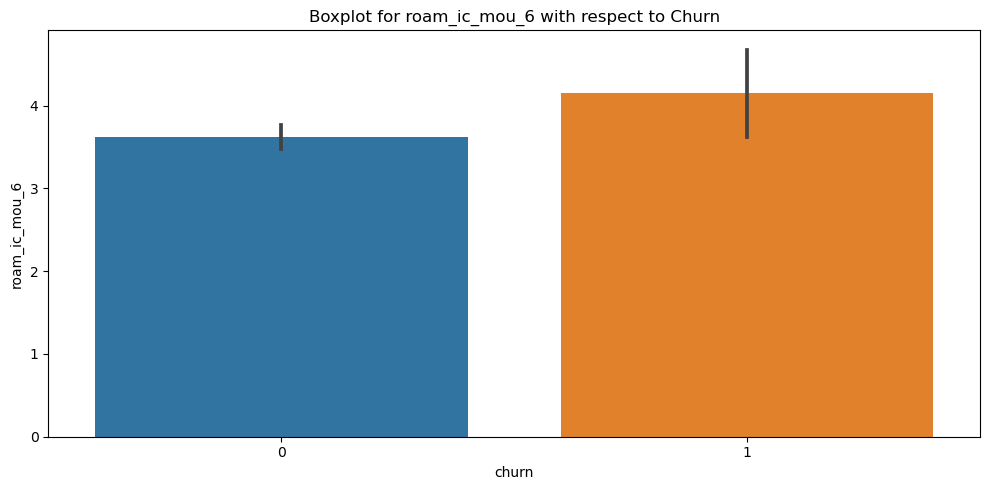

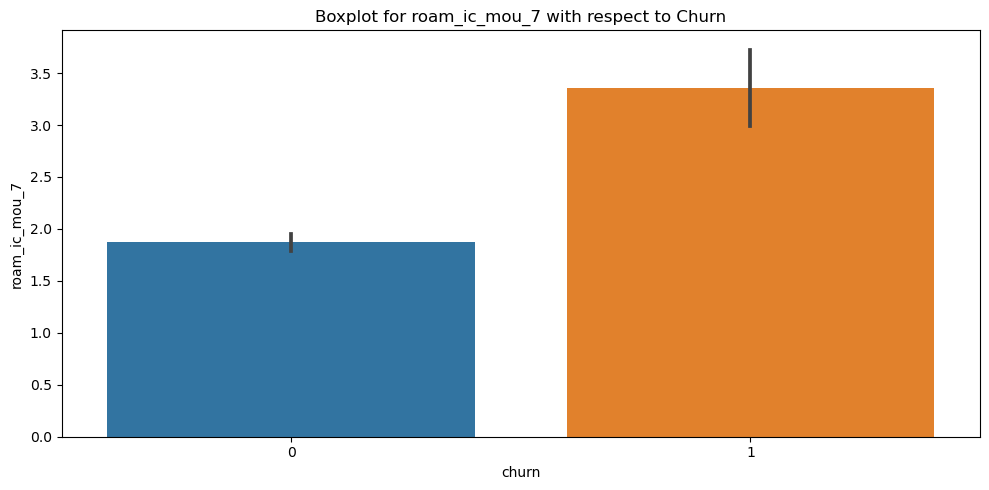

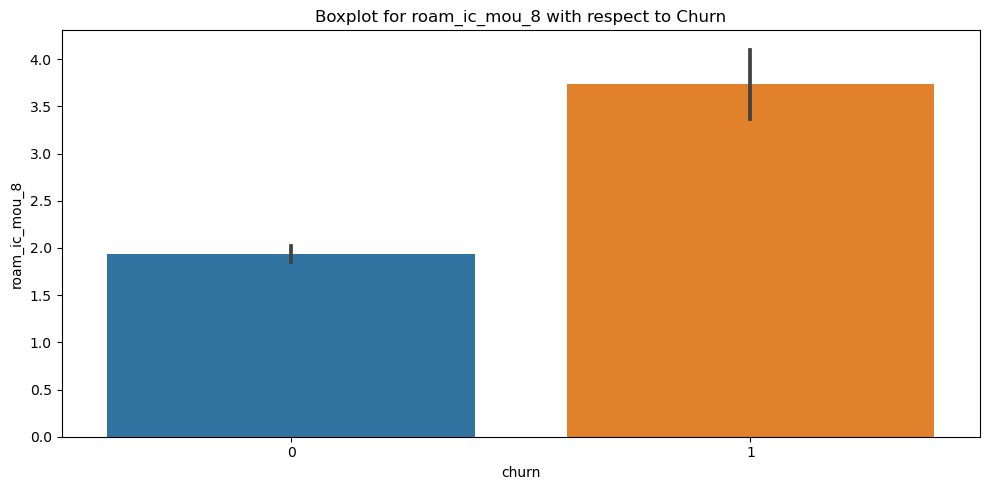

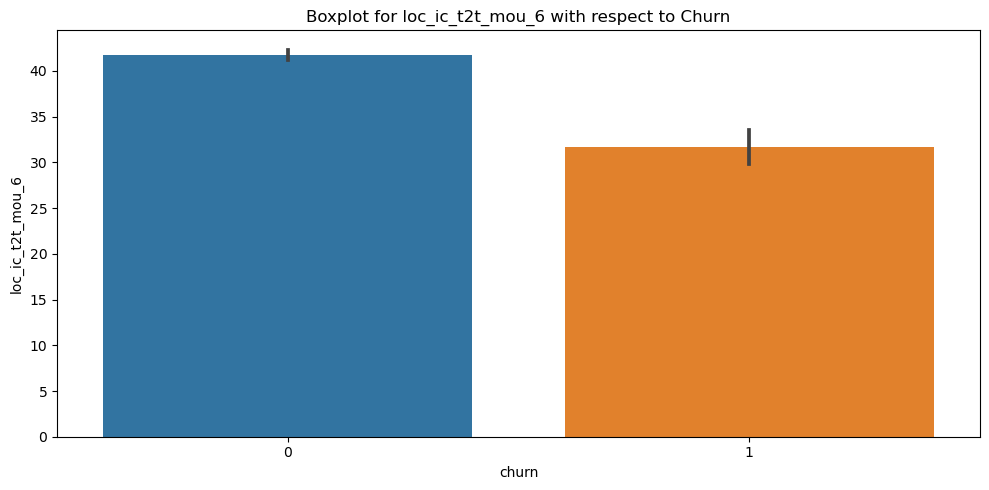

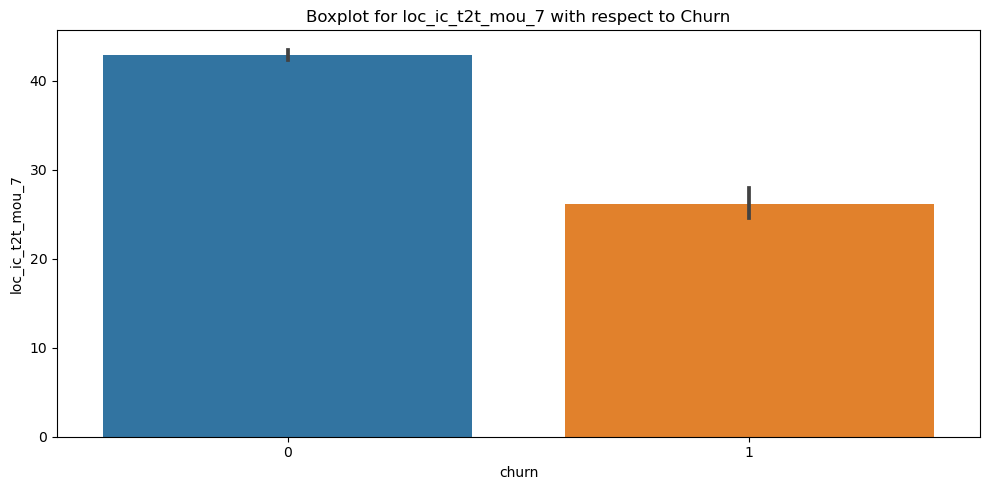

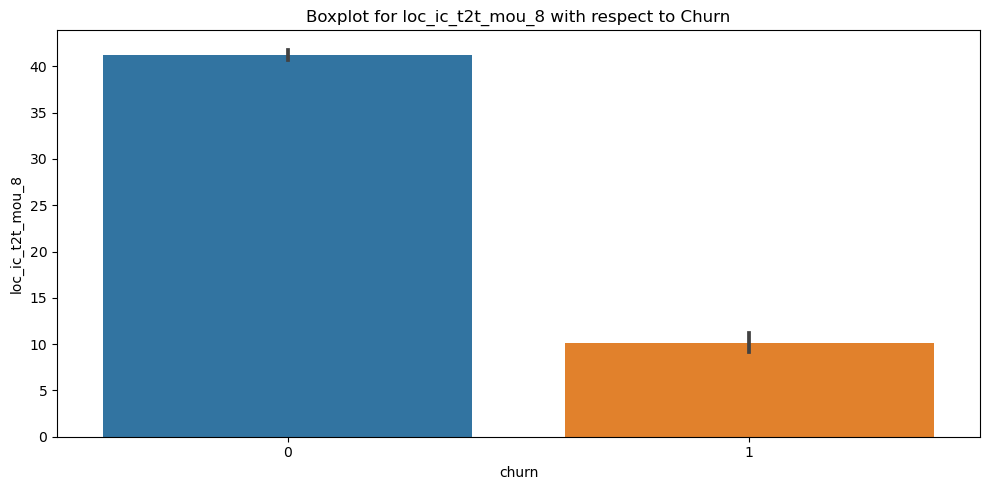

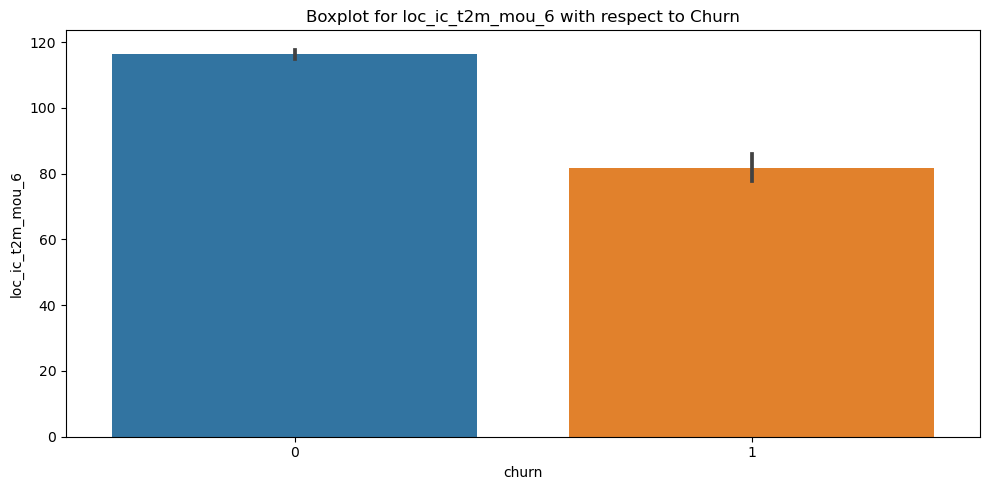

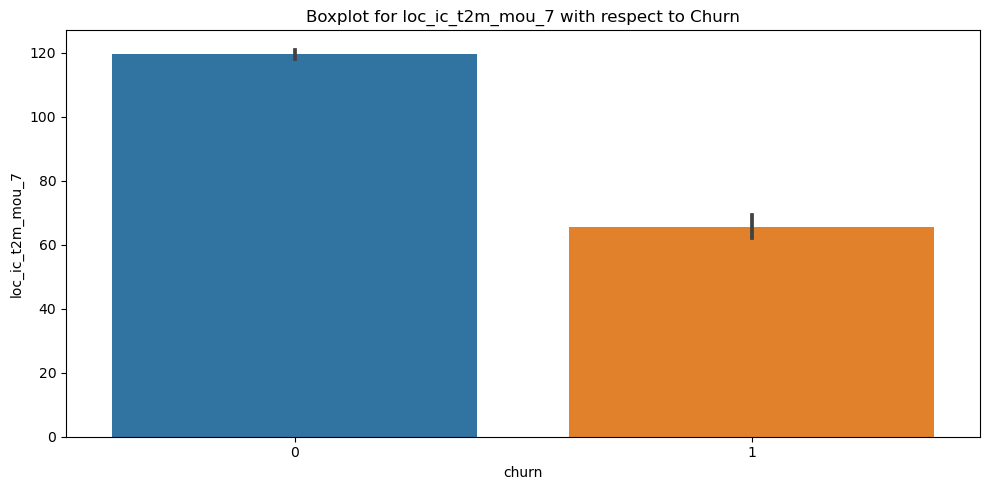

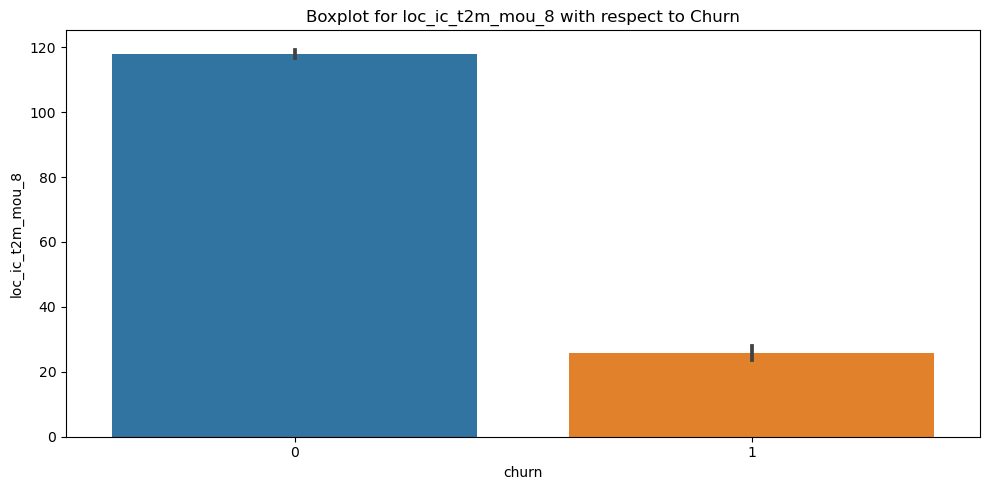

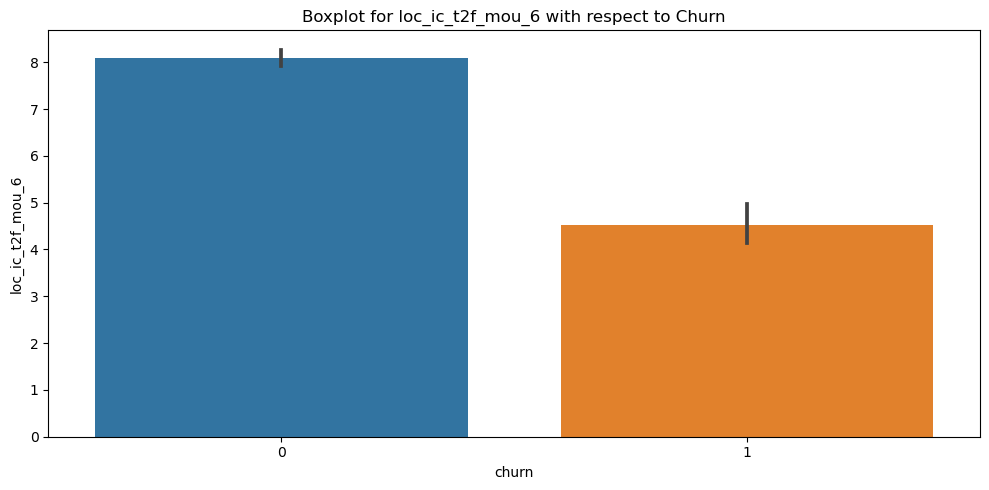

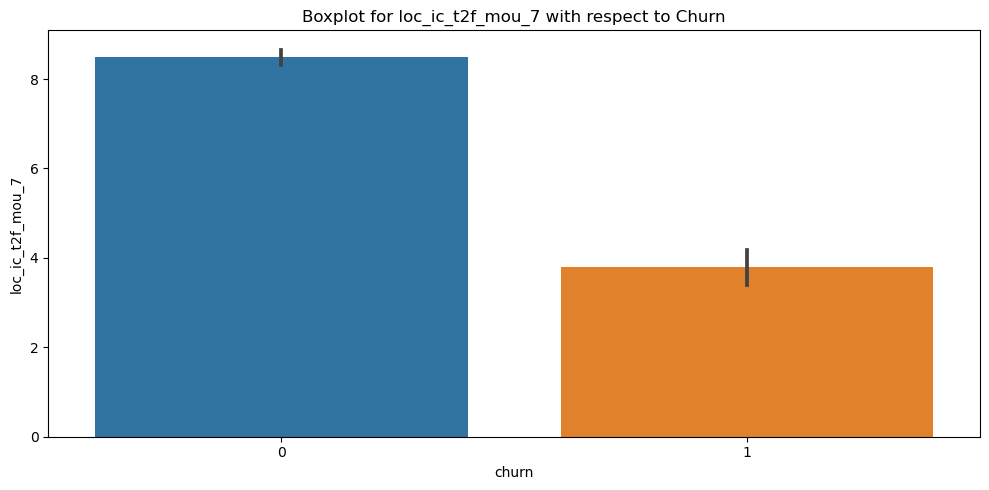

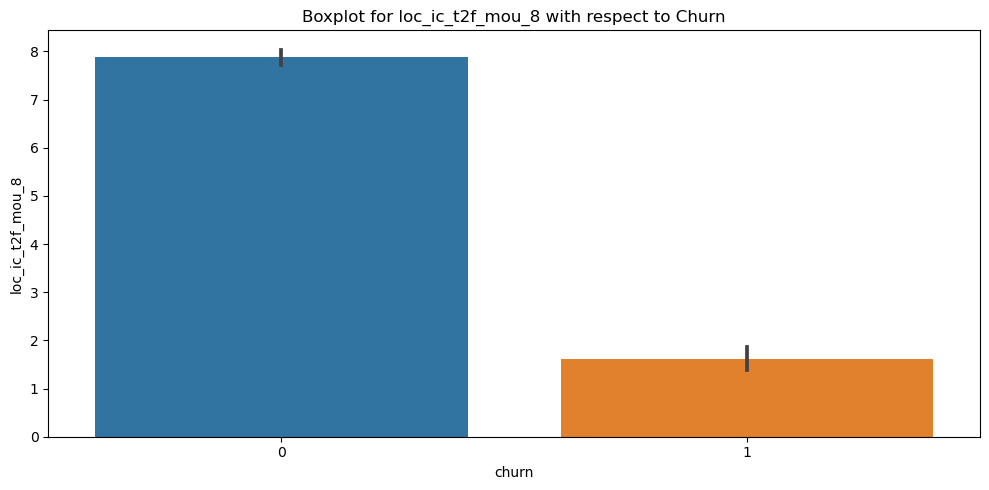

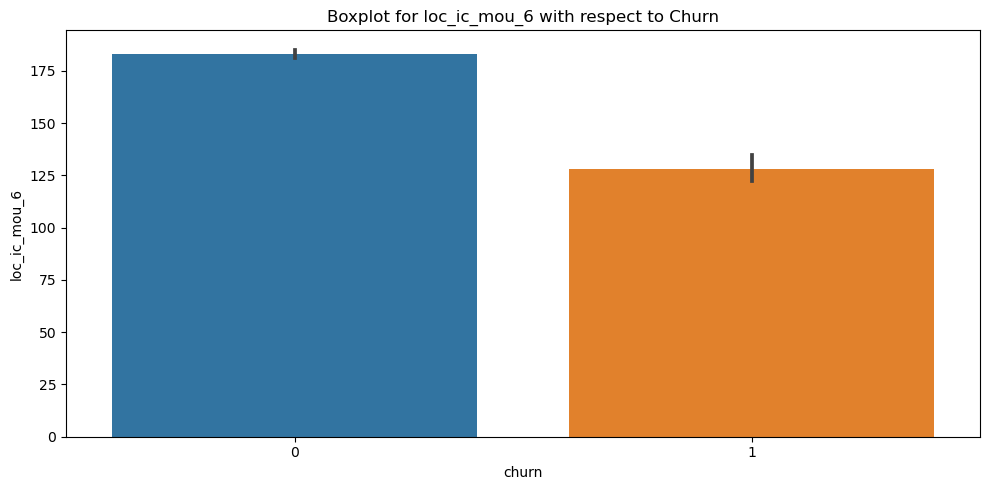

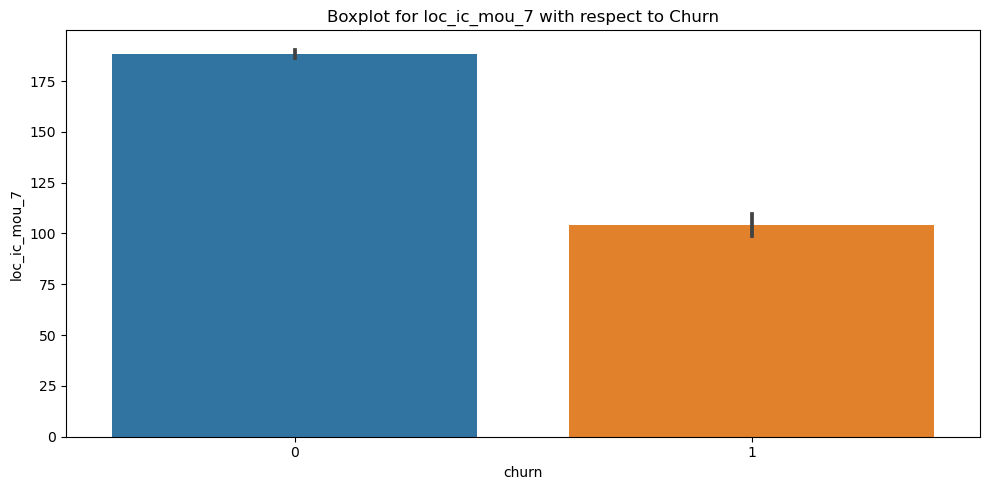

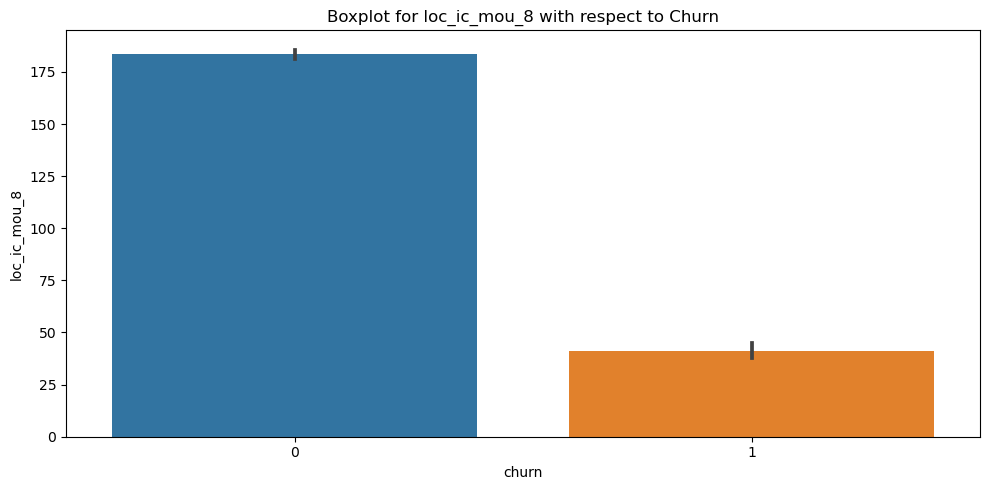

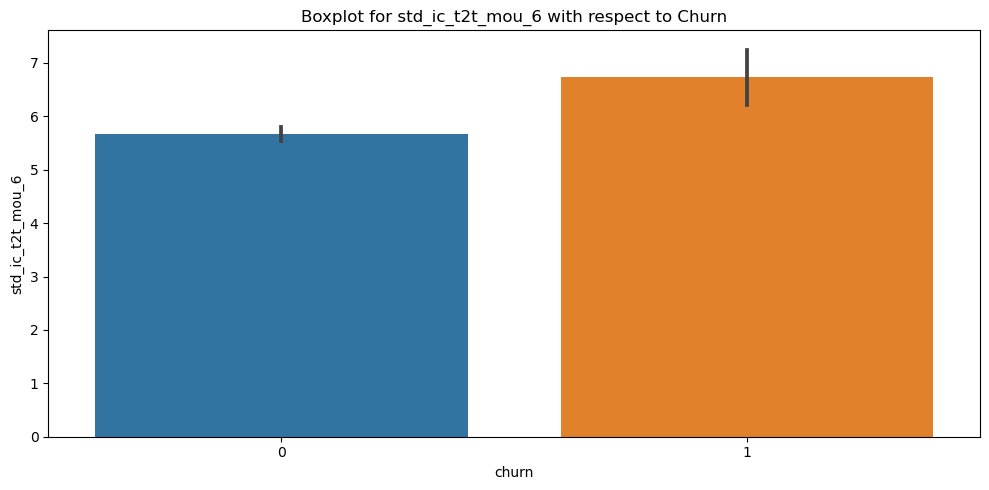

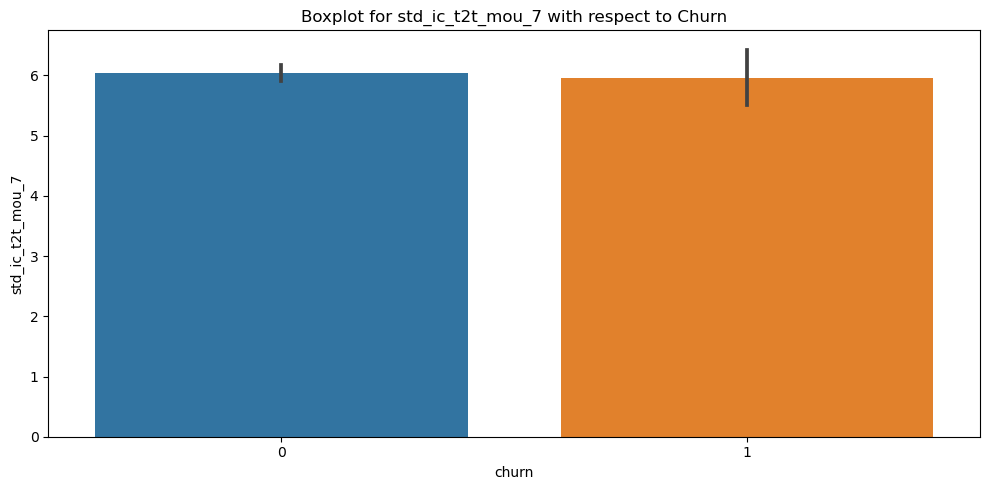

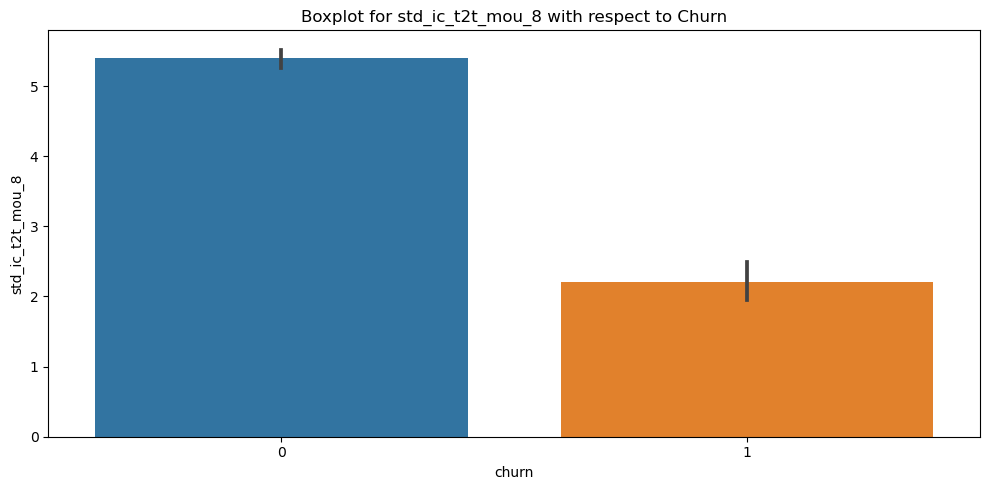

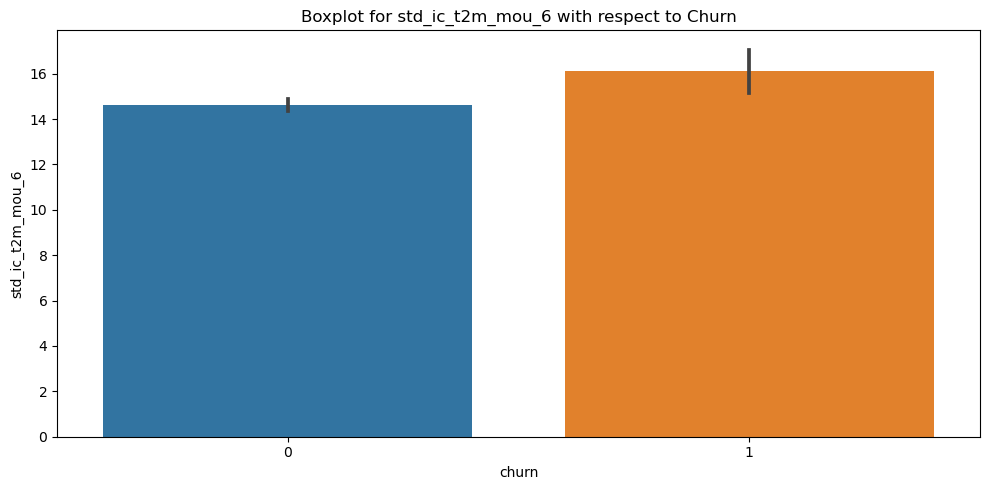

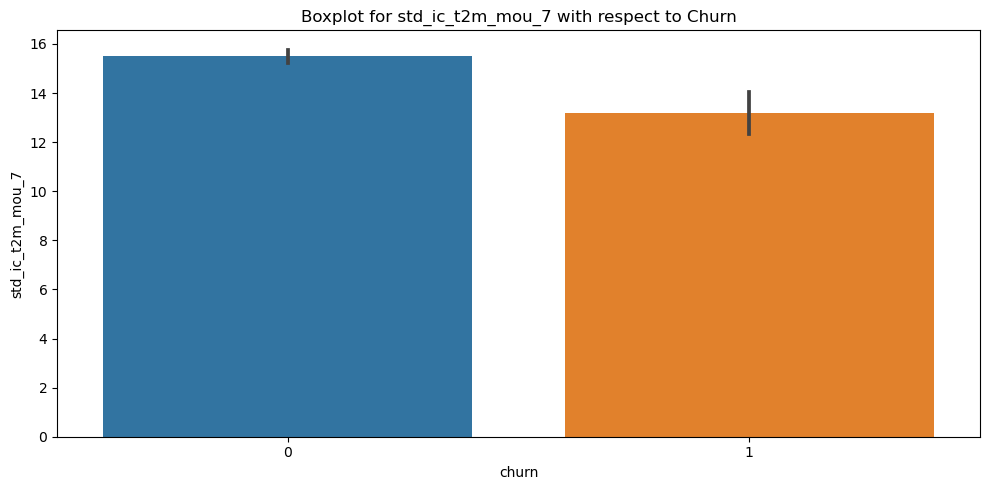

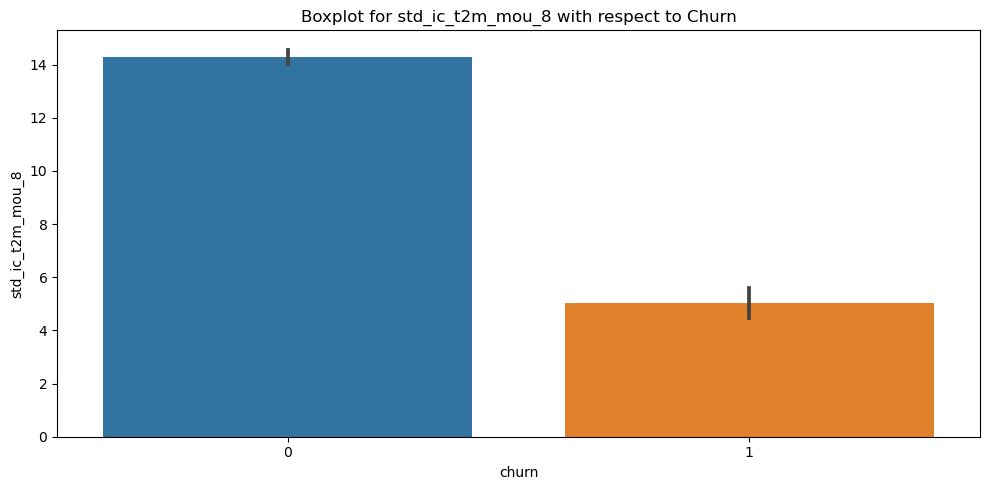

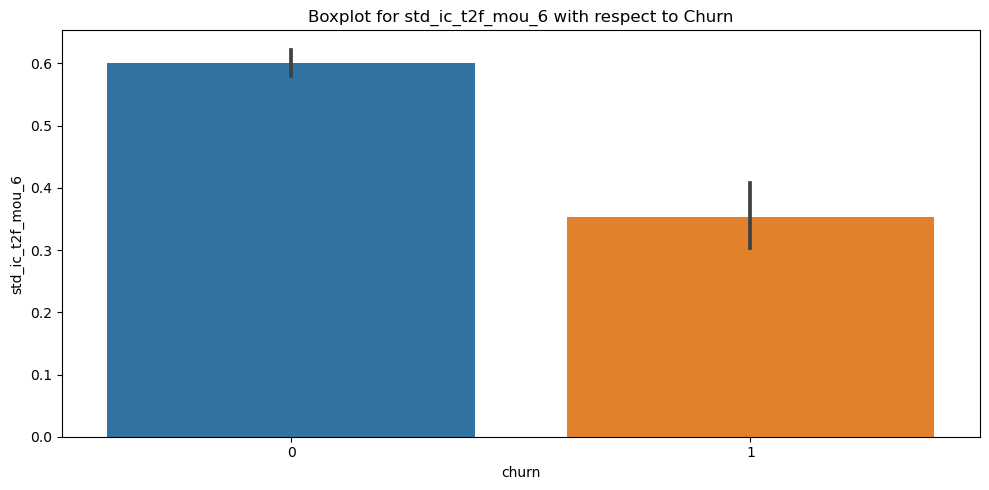

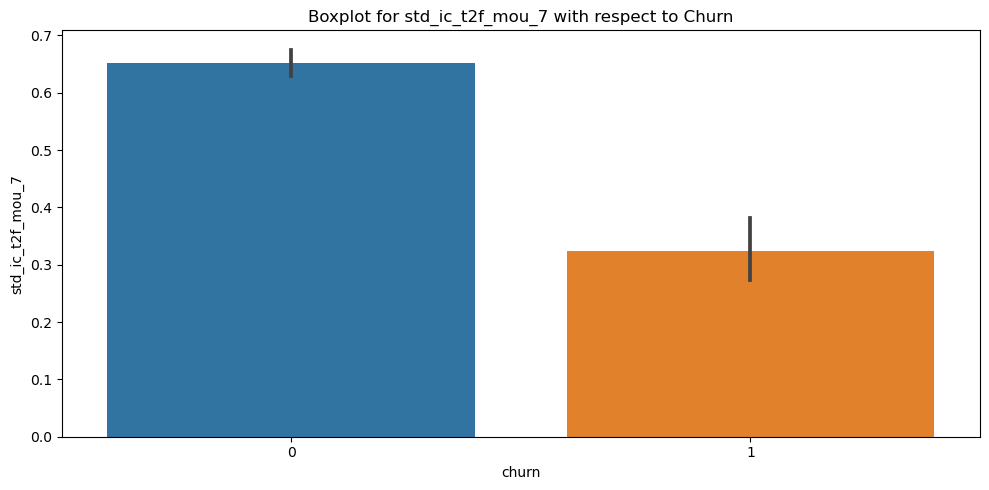

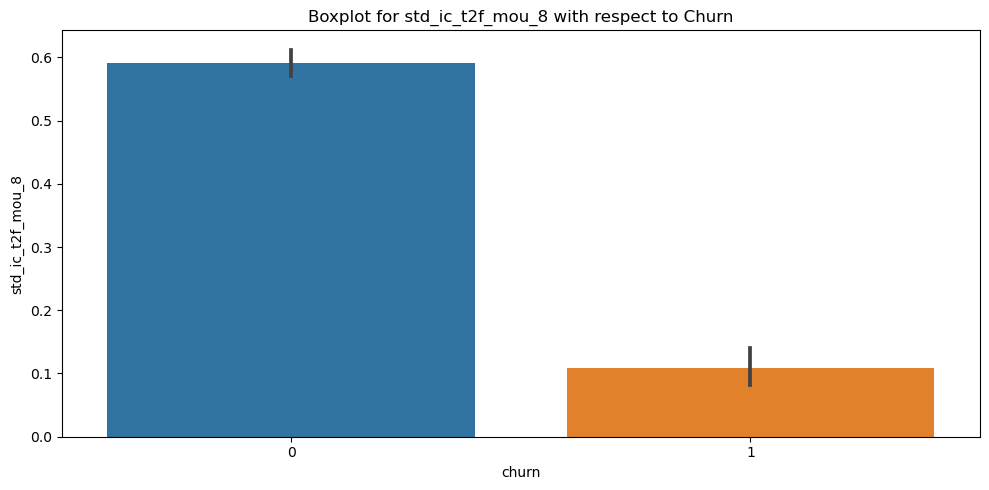

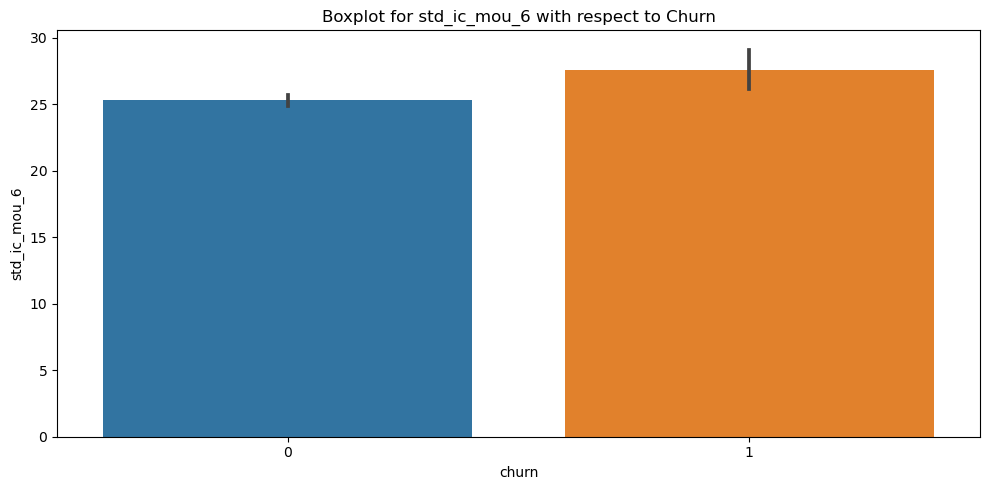

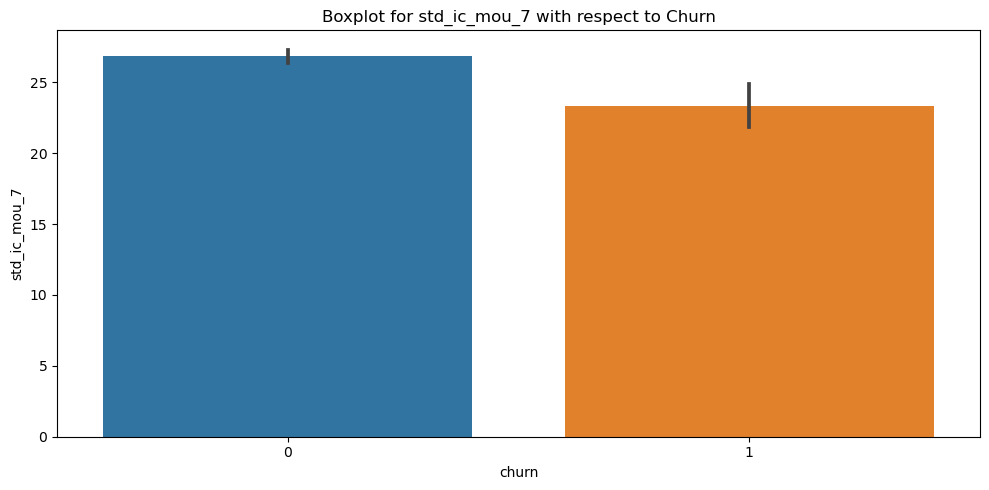

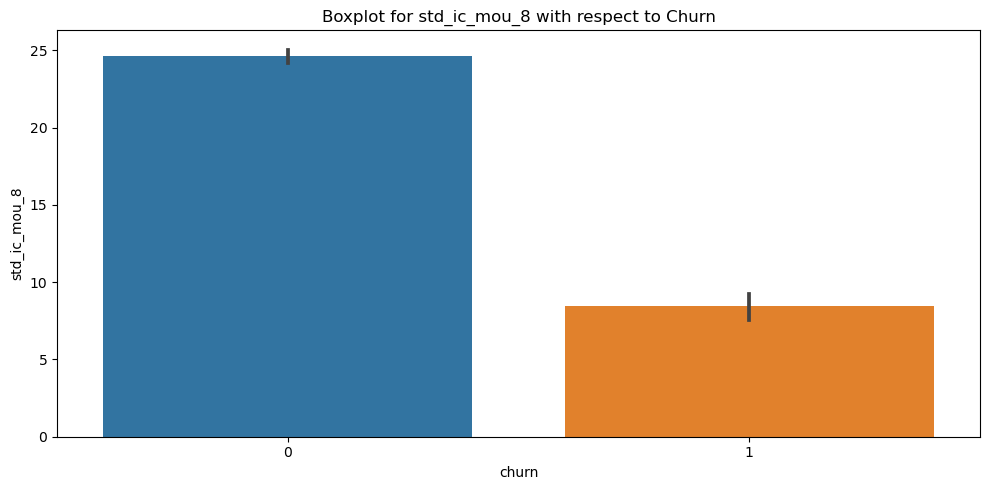

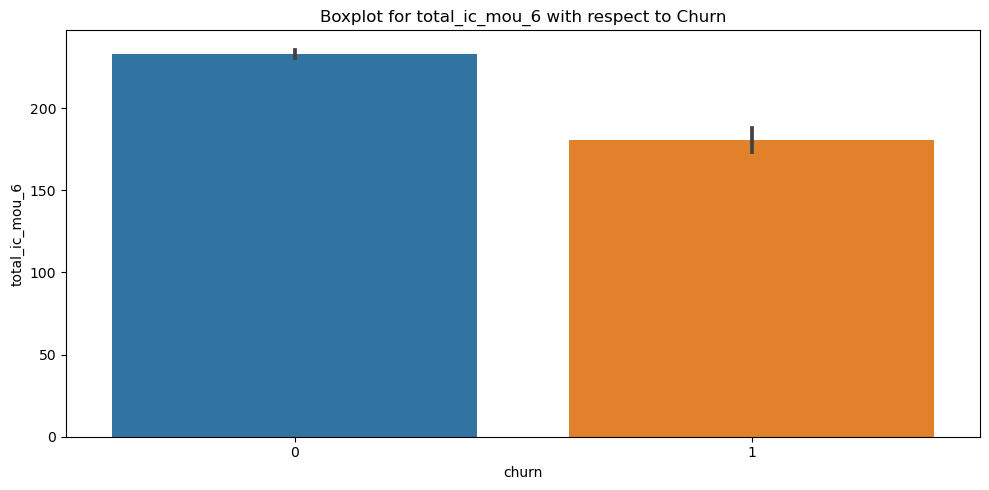

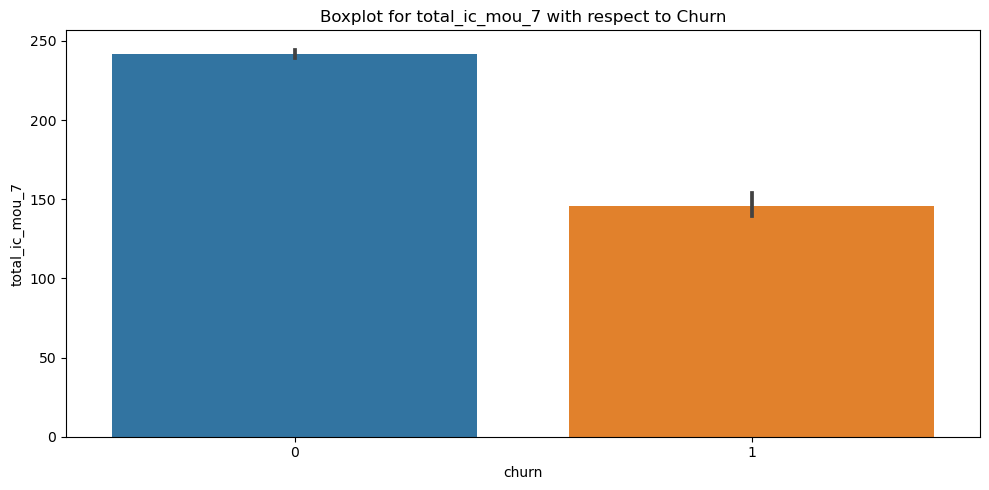

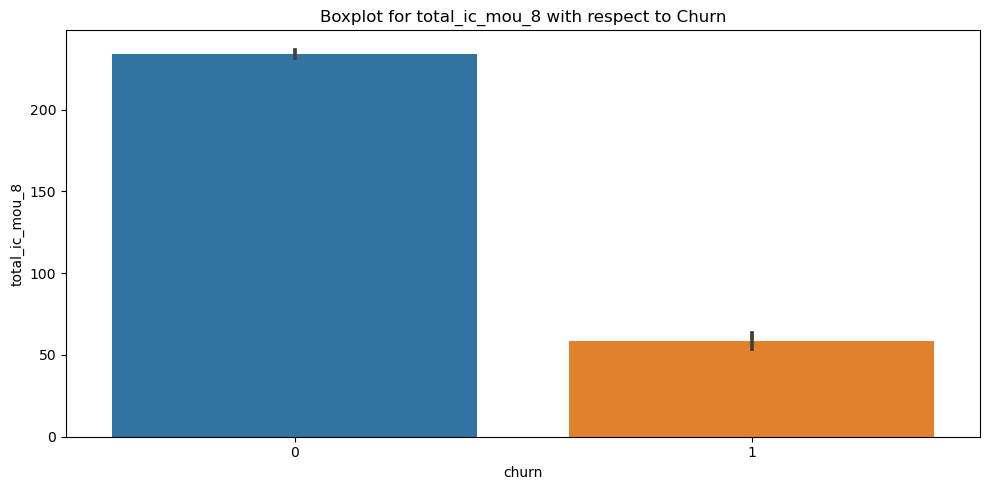

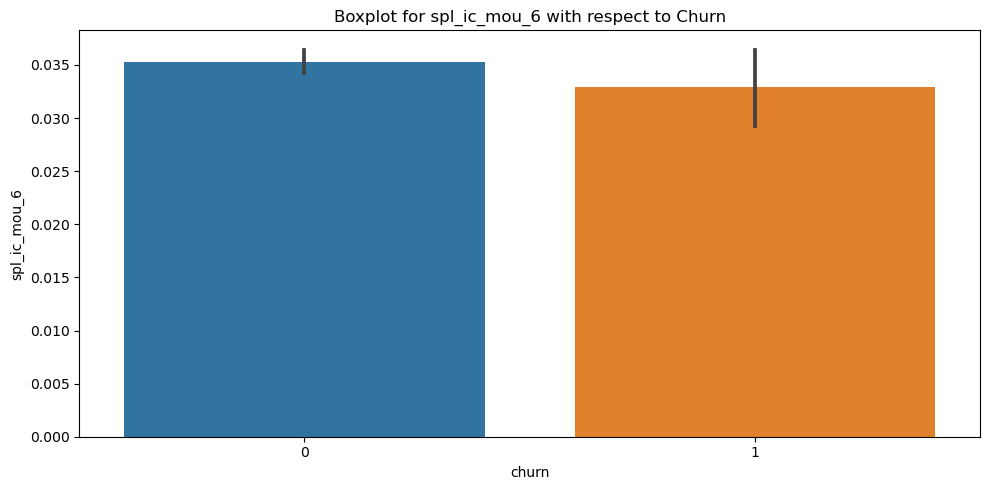

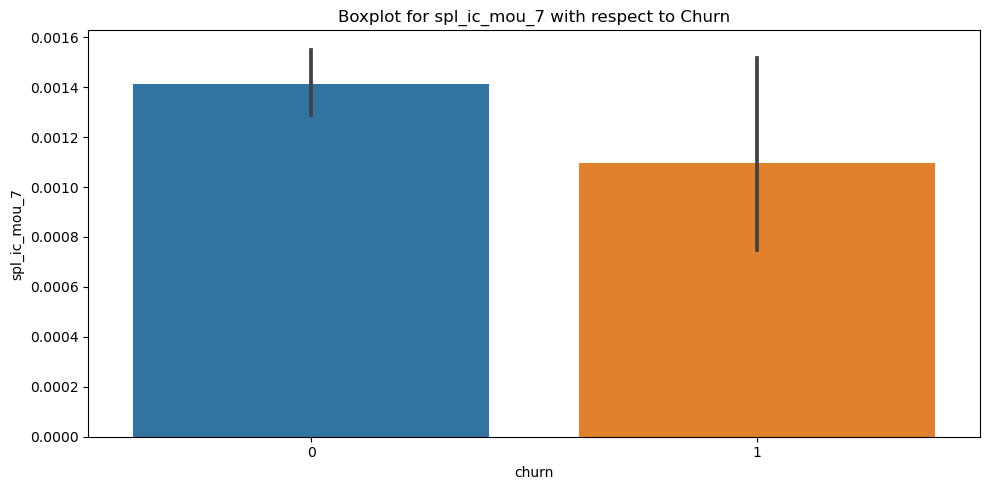

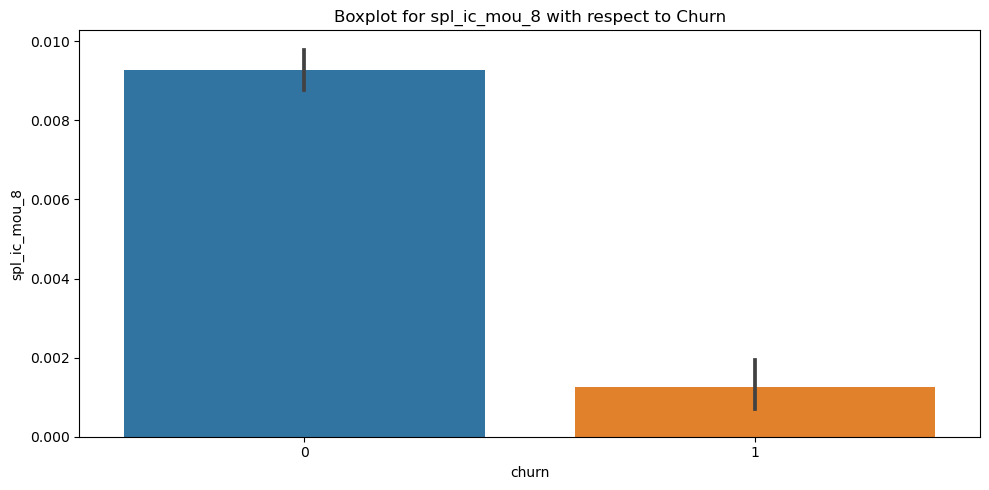

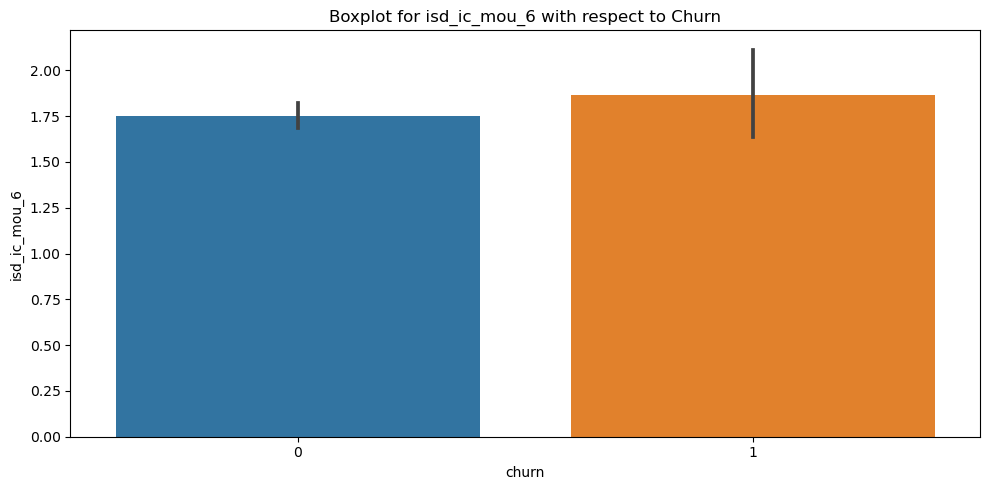

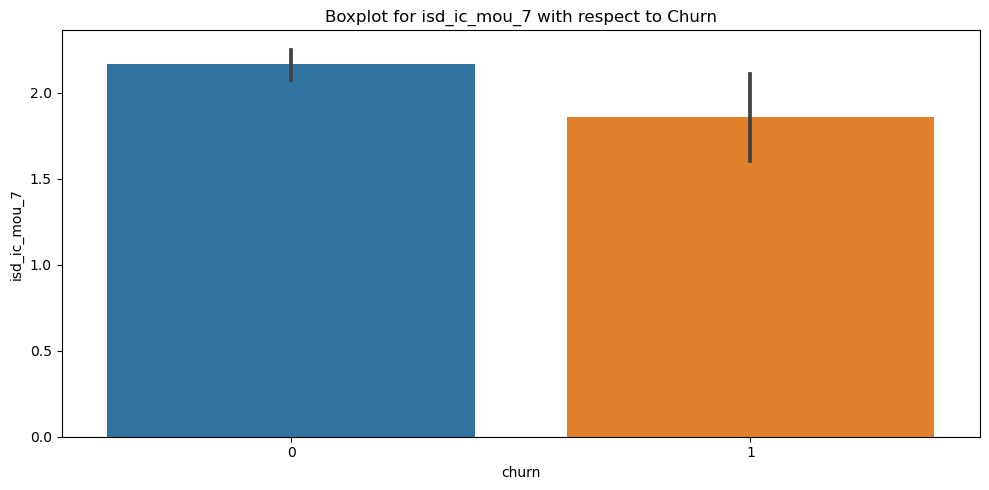

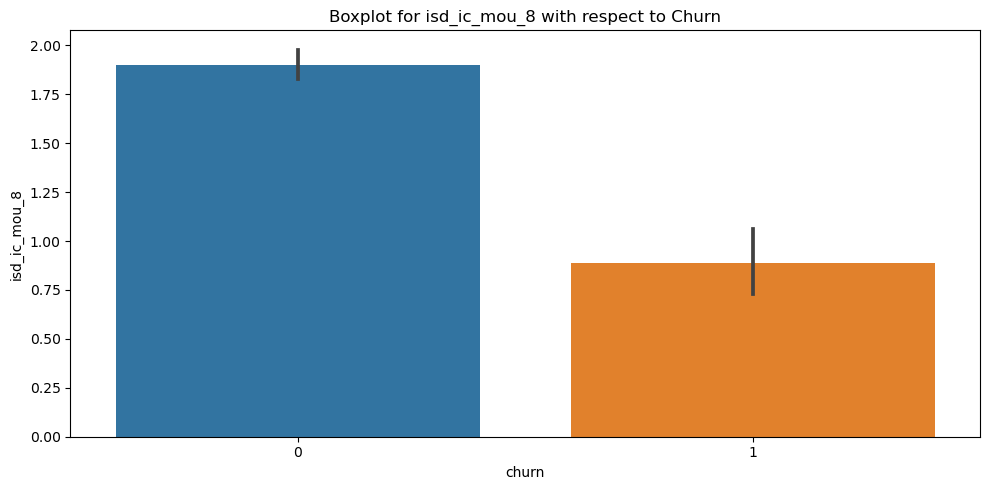

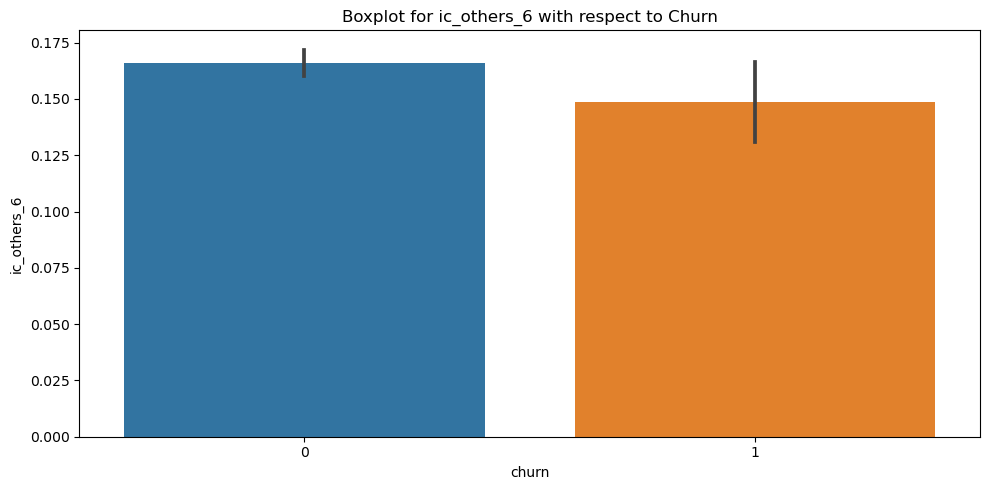

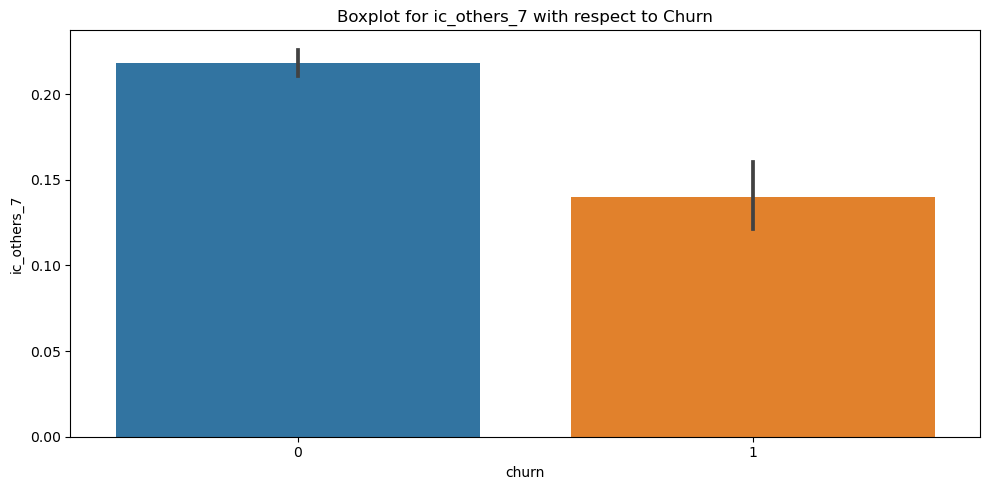

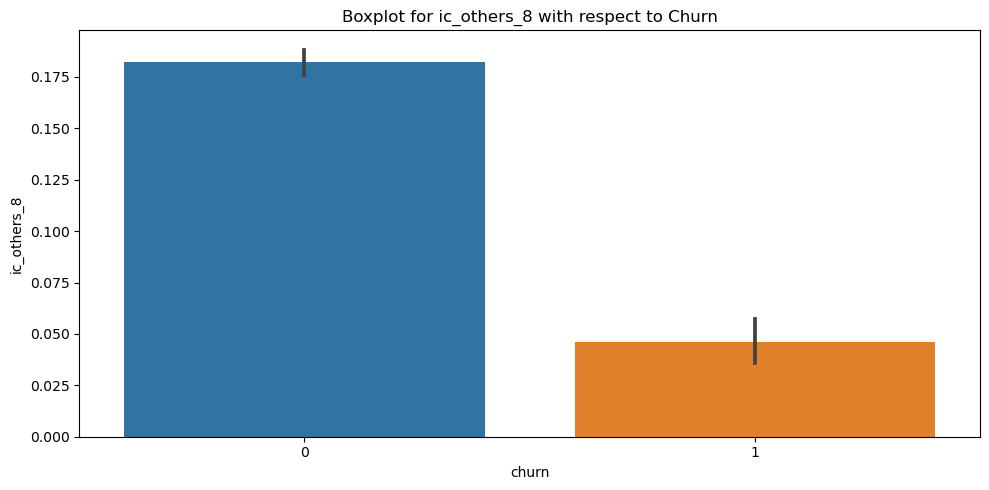

In [48]:
ic_columns = data.columns[data.columns.str.contains('ic')]

# Loop through rech_columns
for i in ic_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

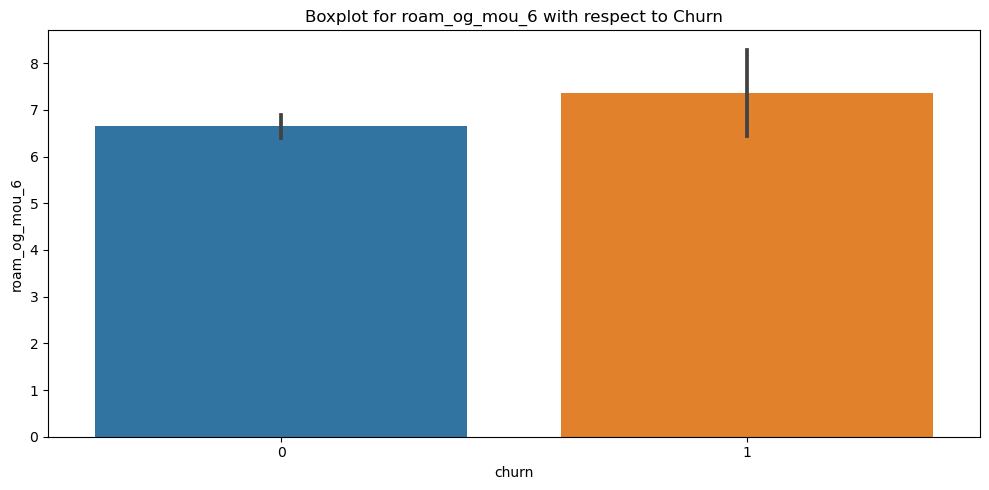

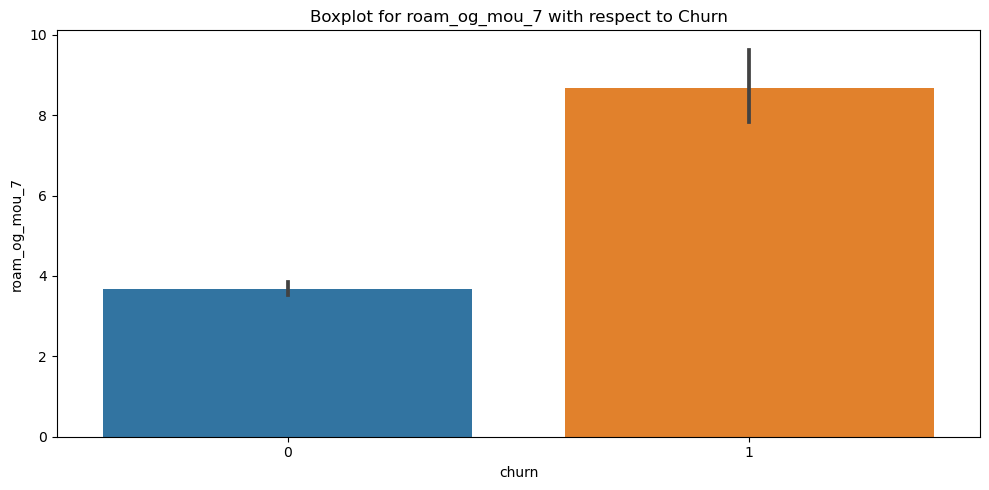

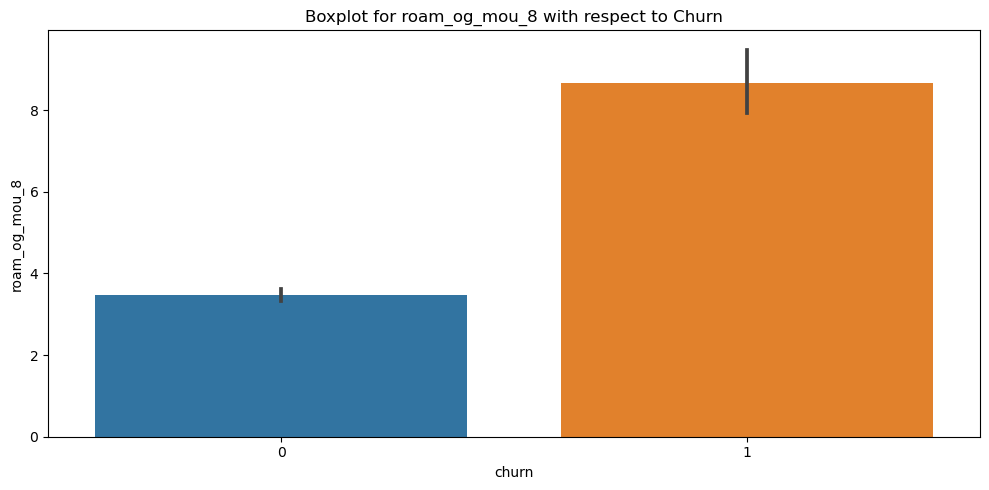

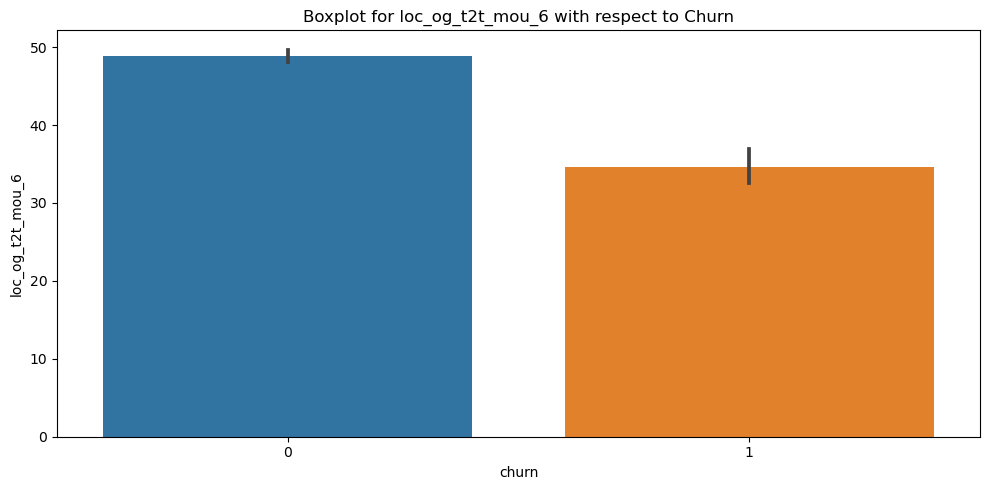

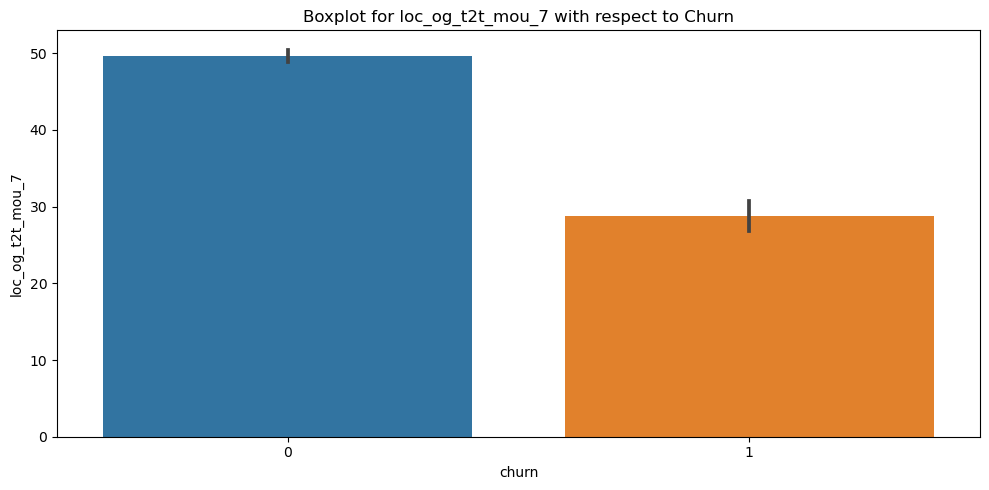

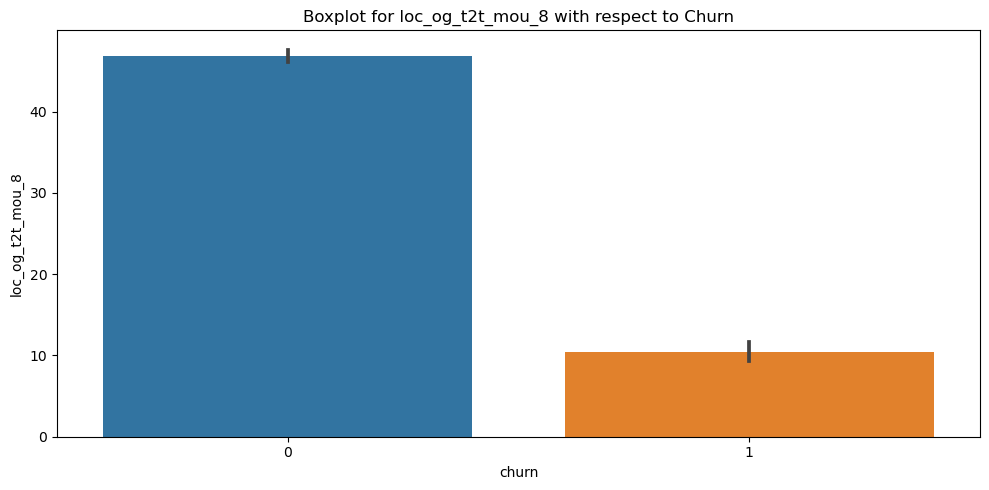

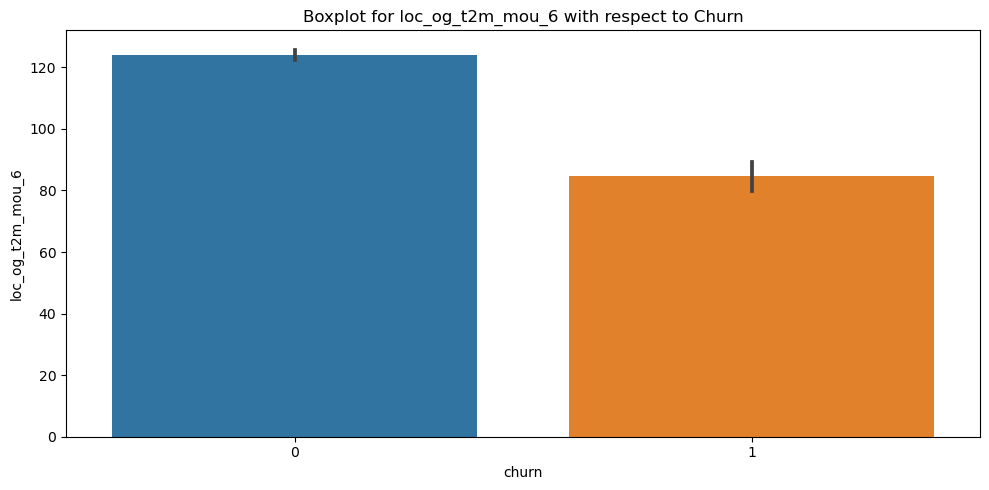

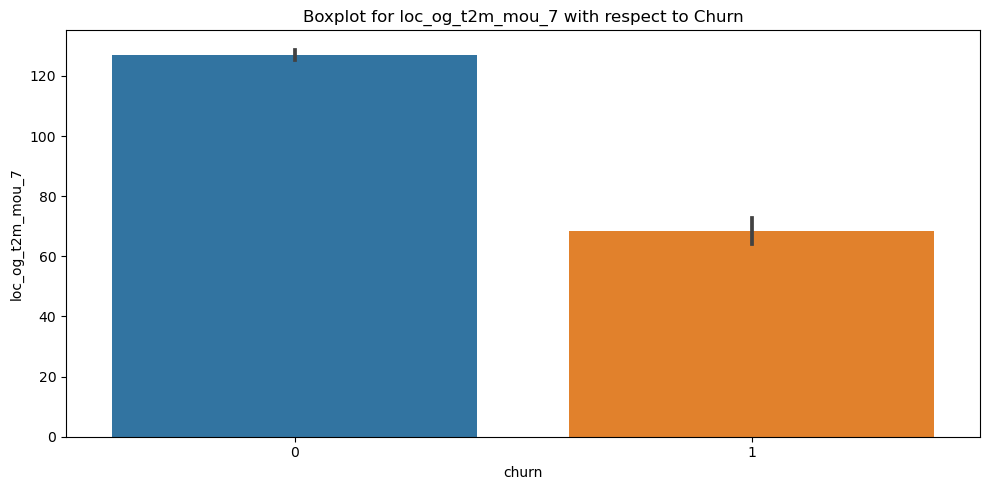

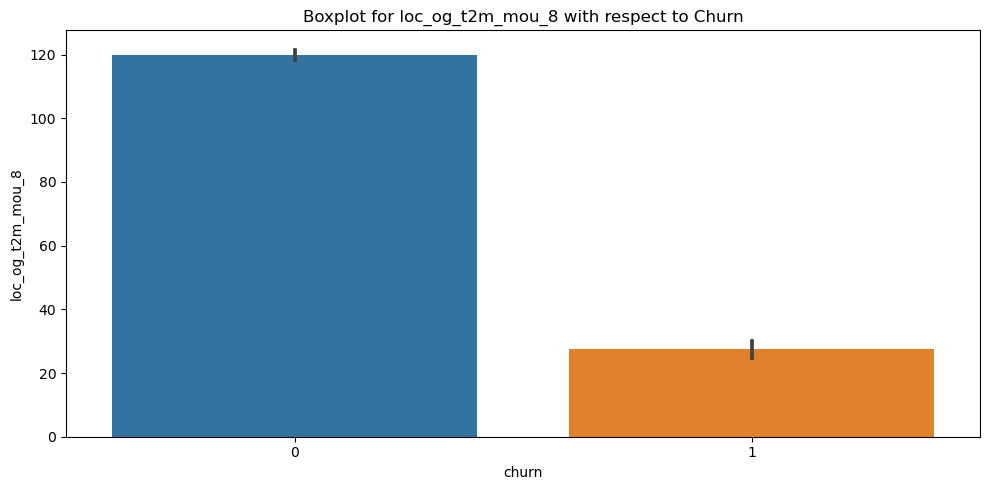

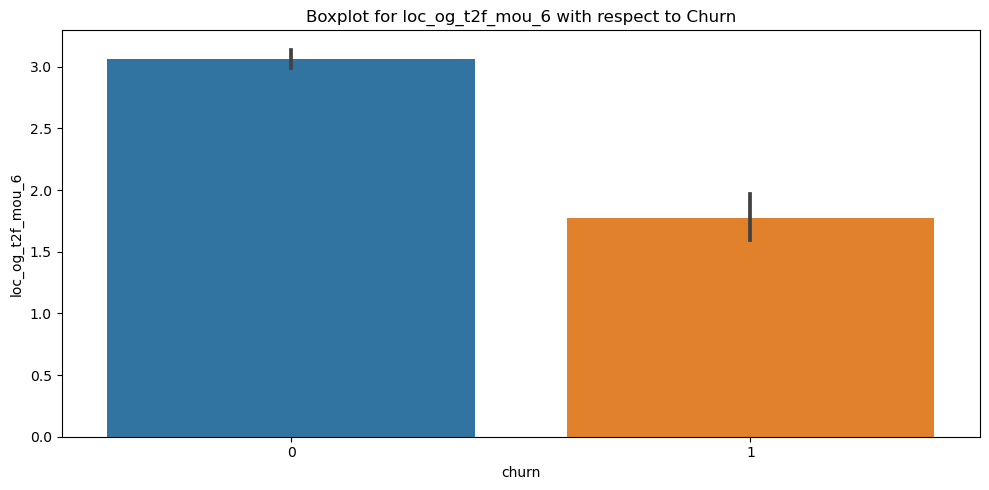

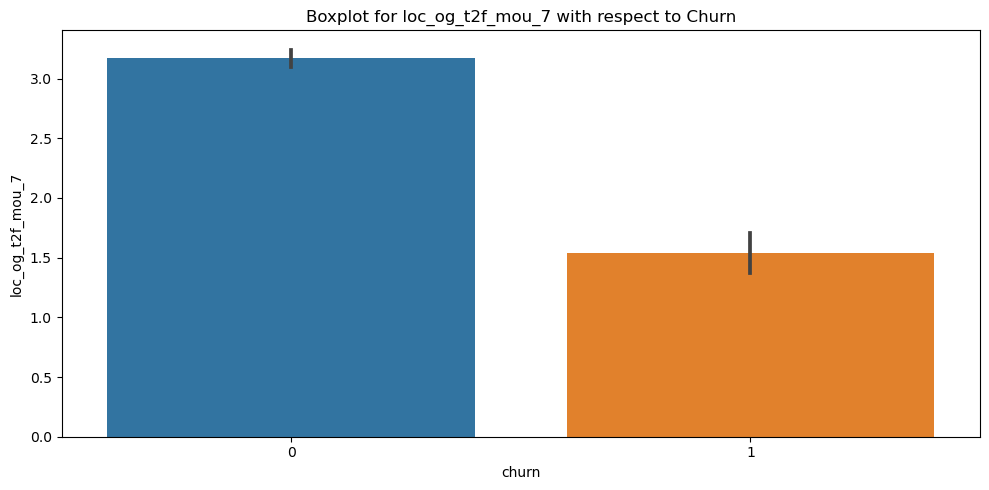

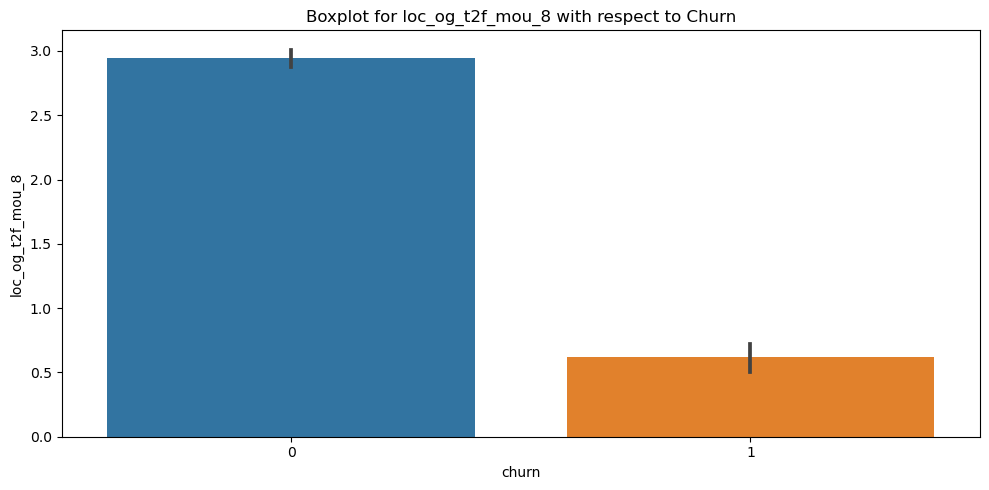

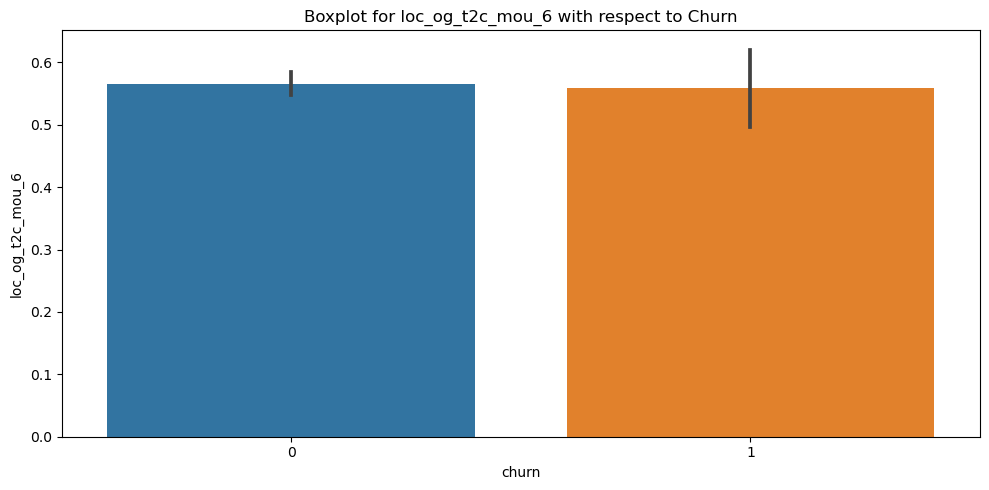

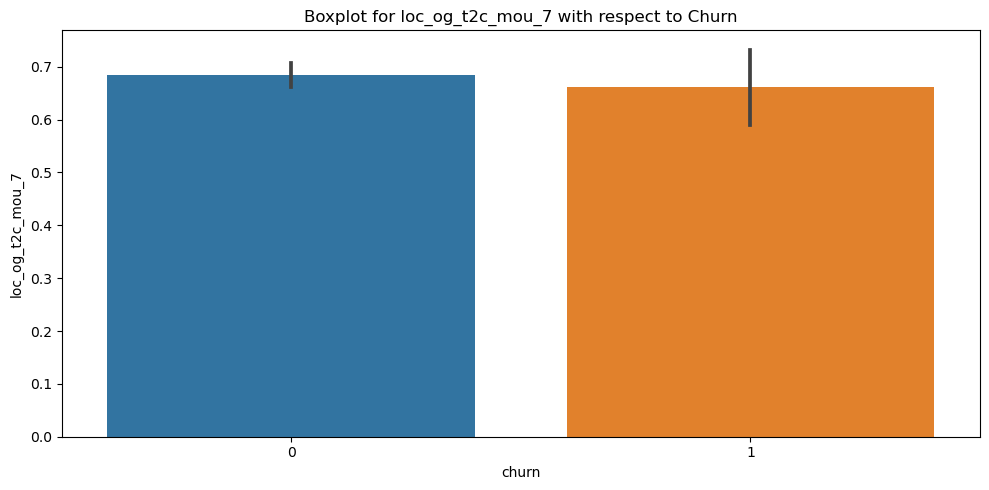

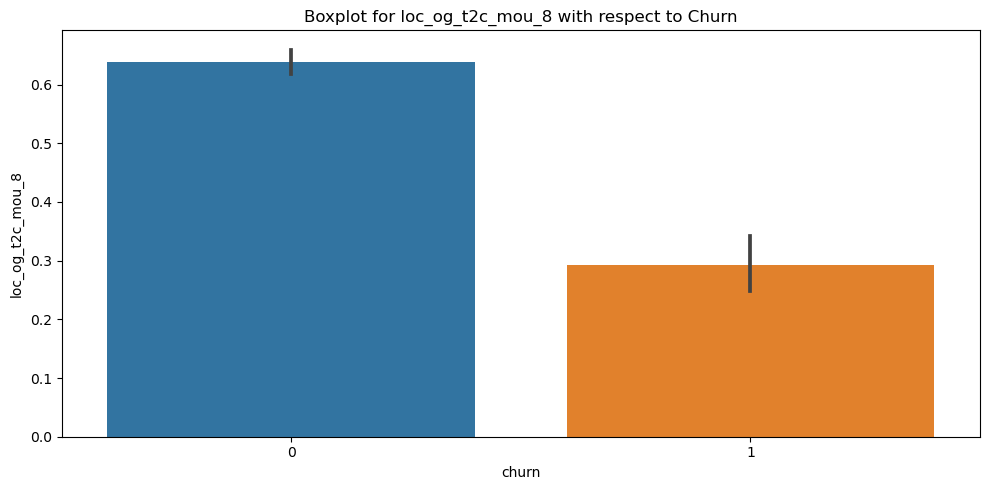

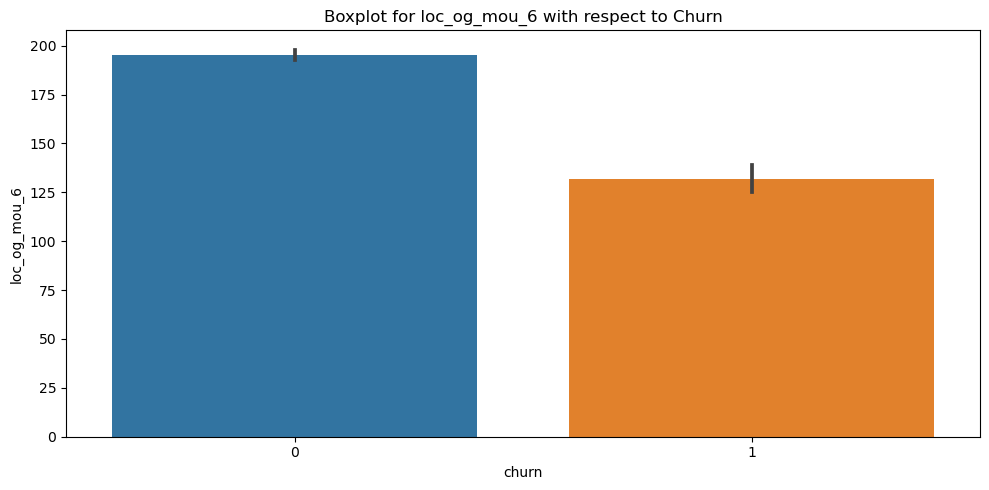

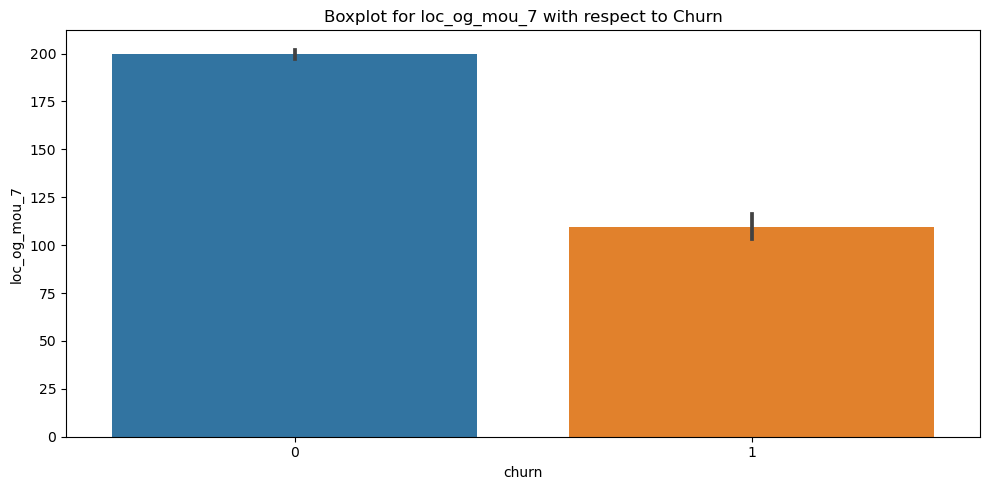

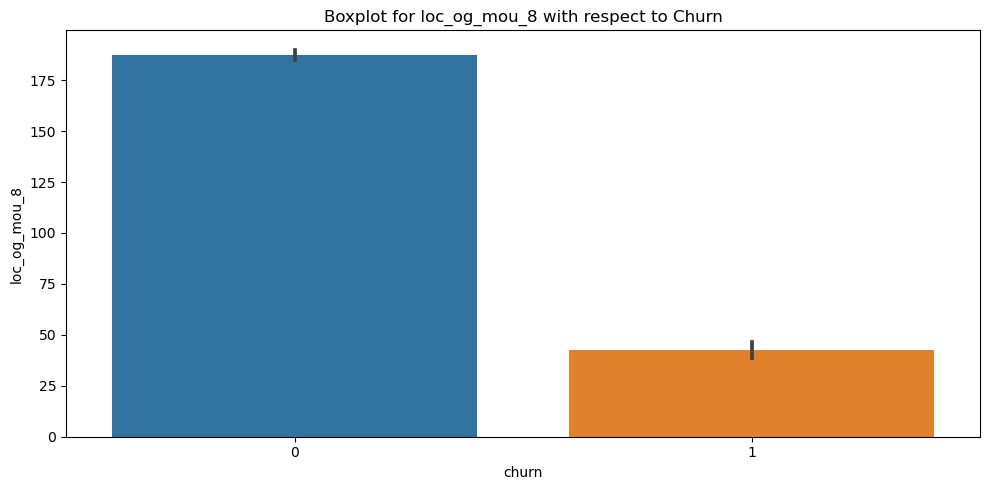

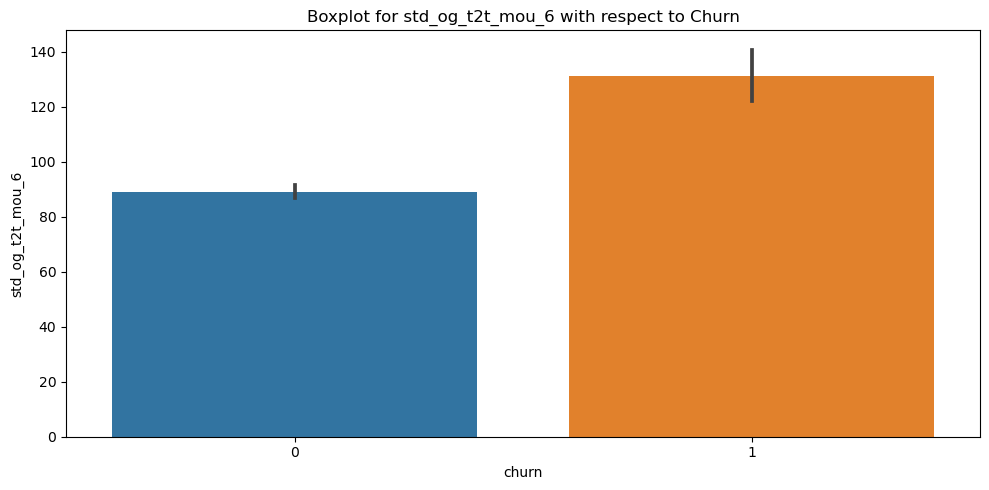

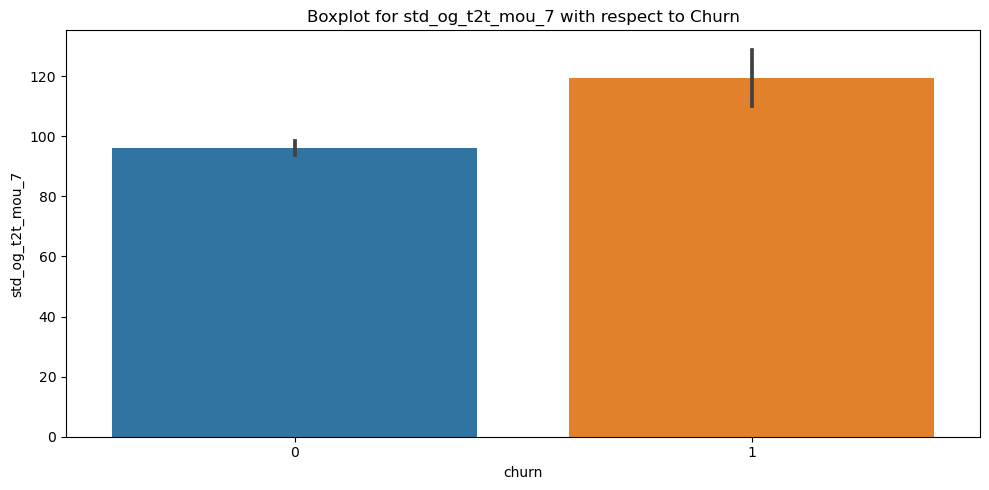

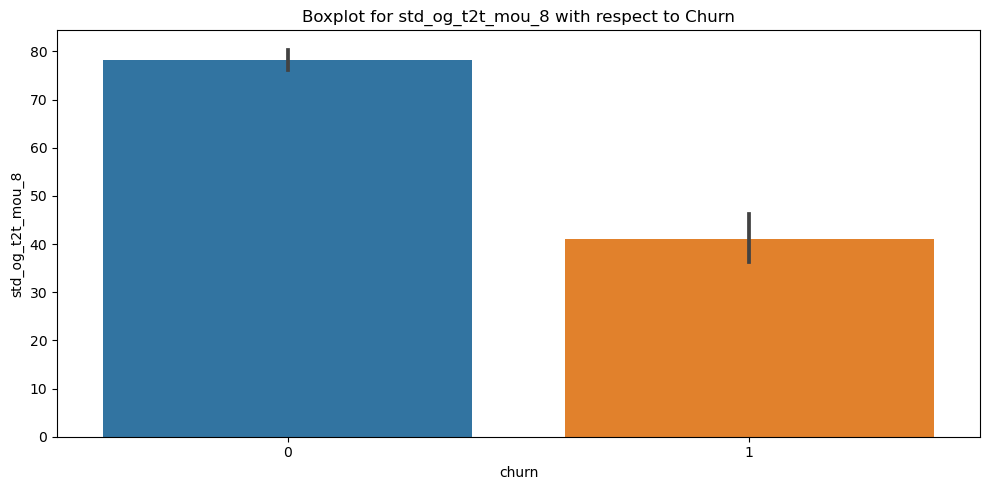

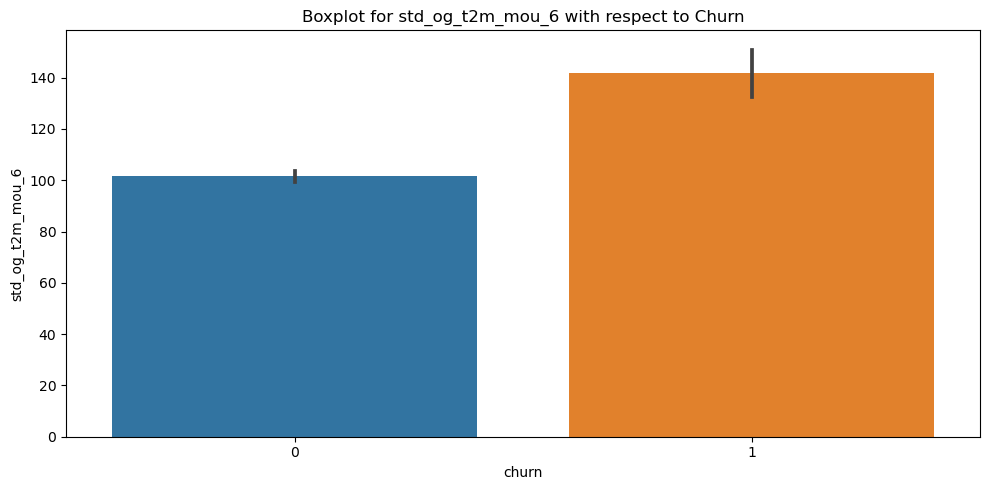

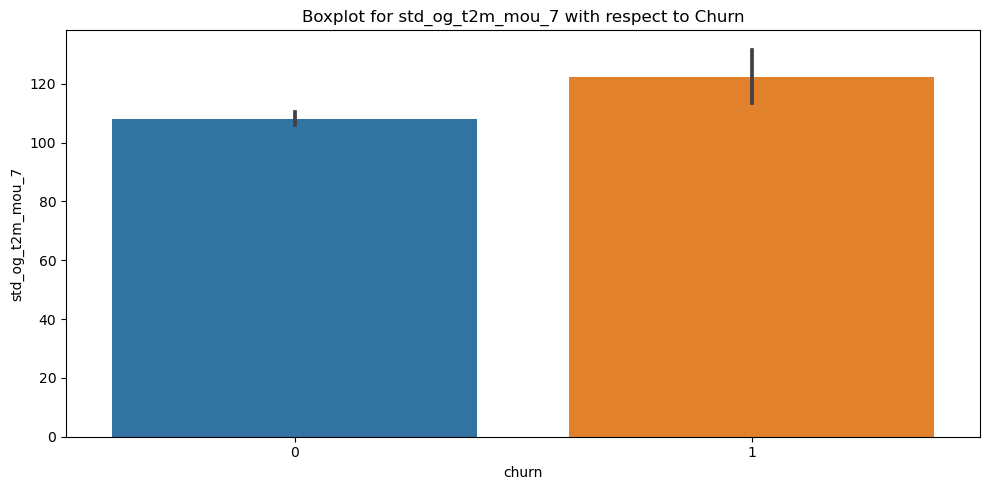

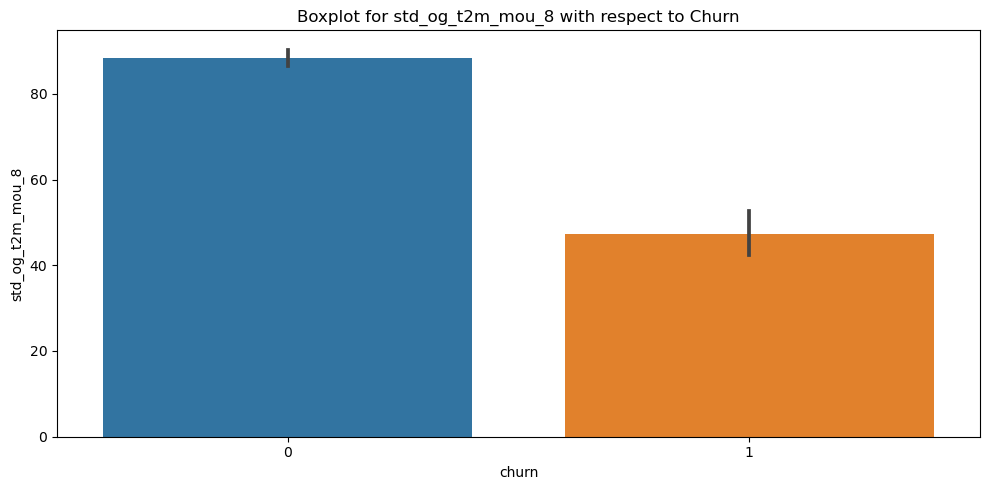

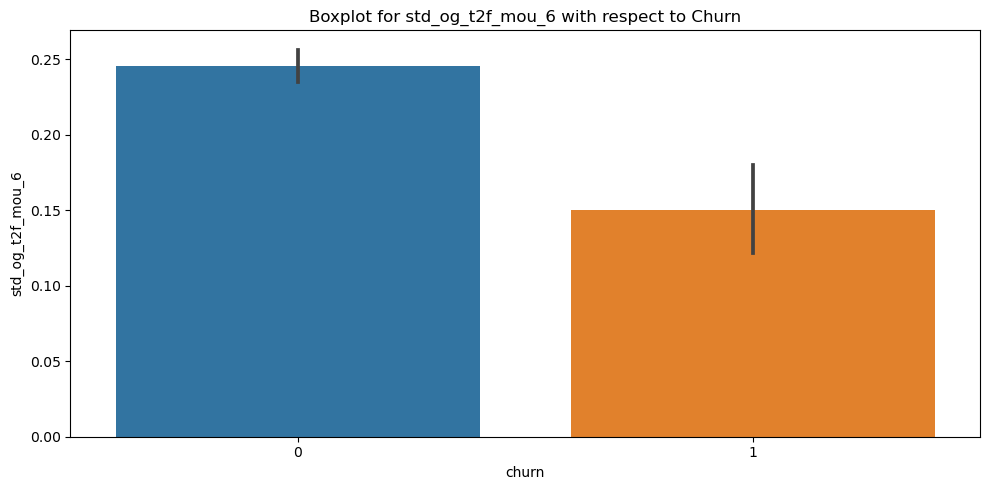

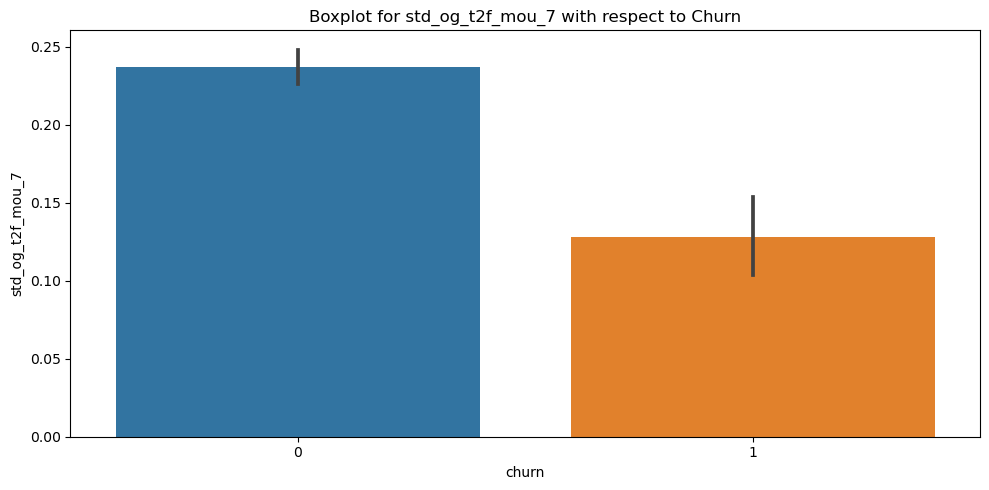

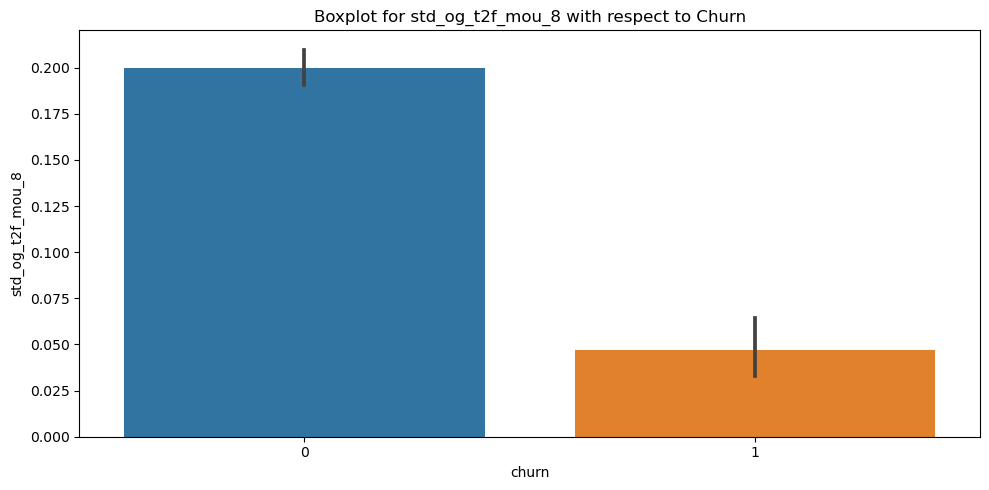

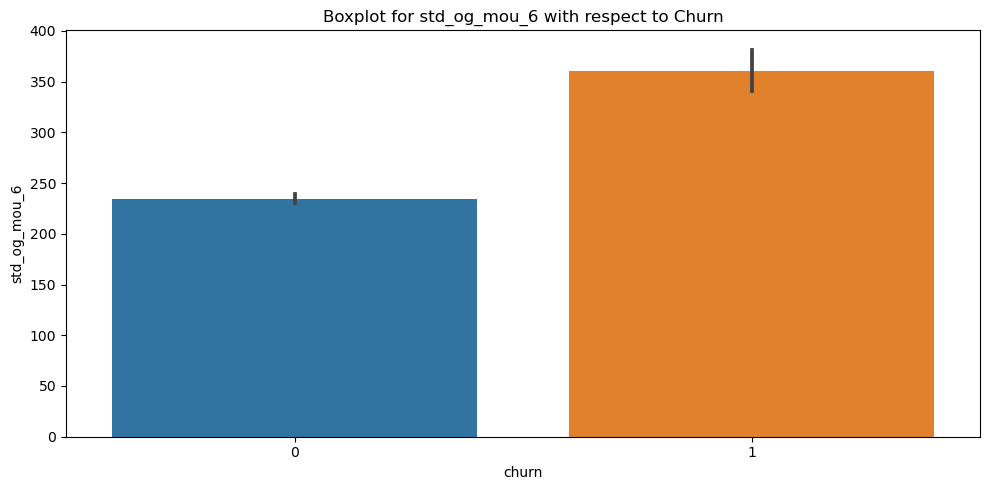

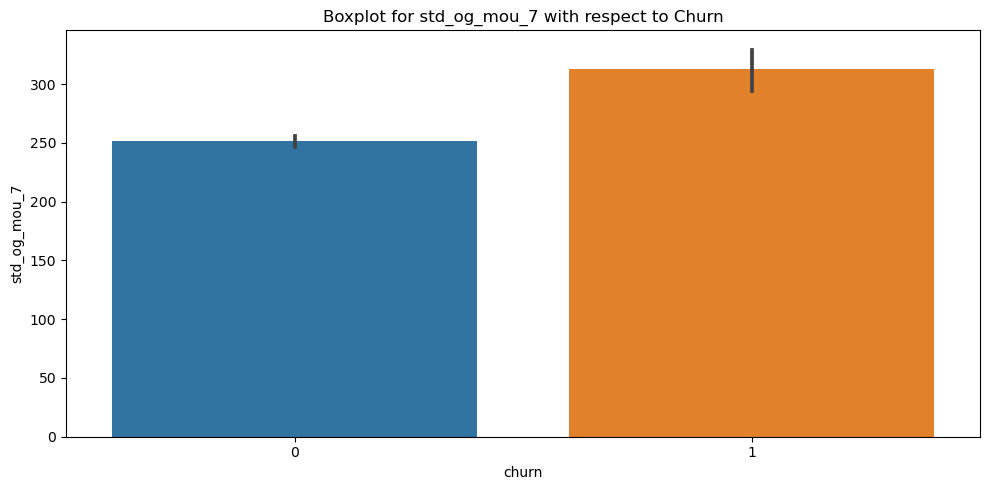

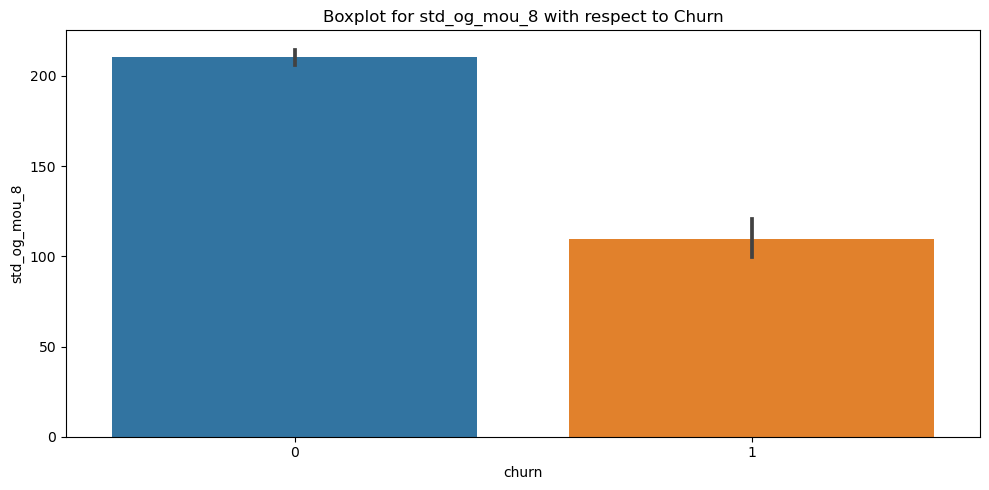

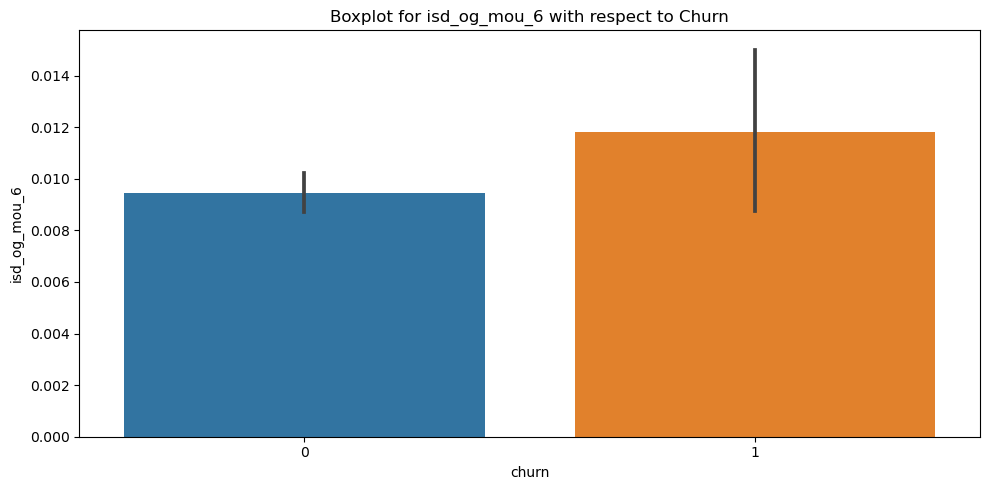

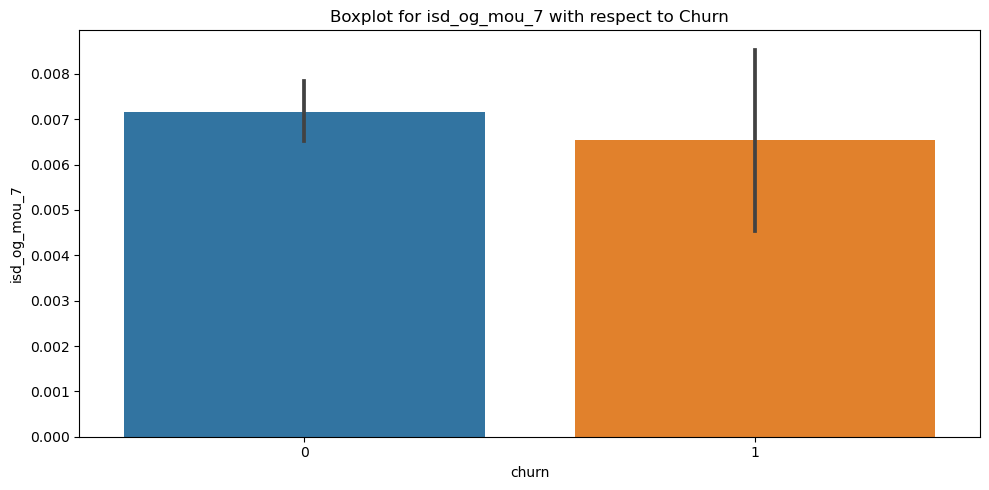

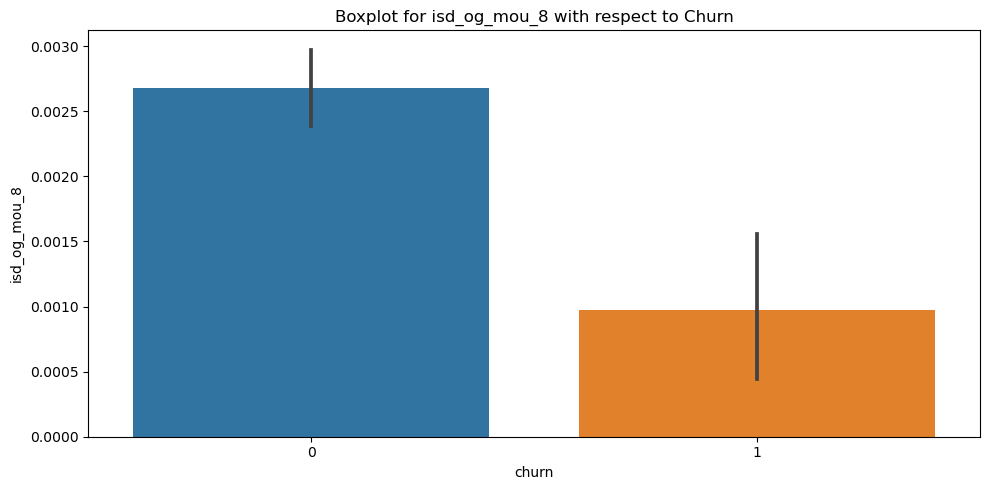

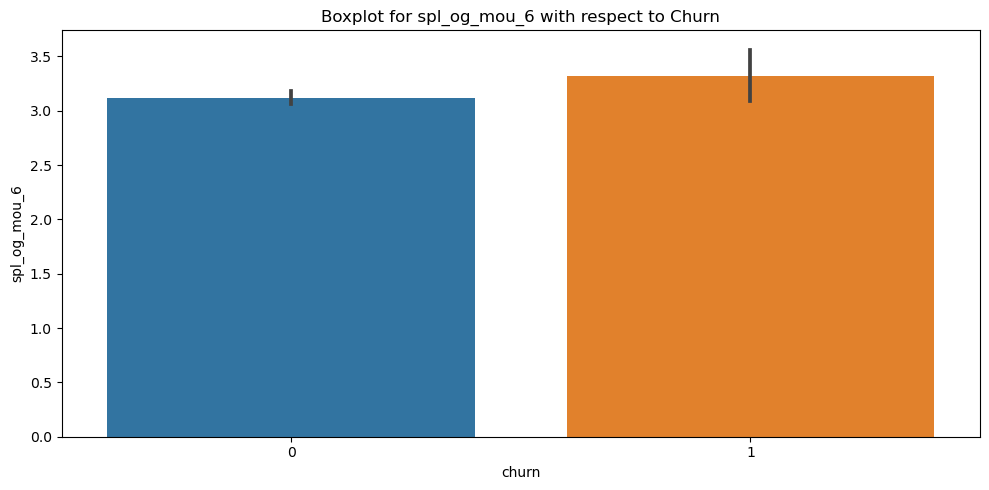

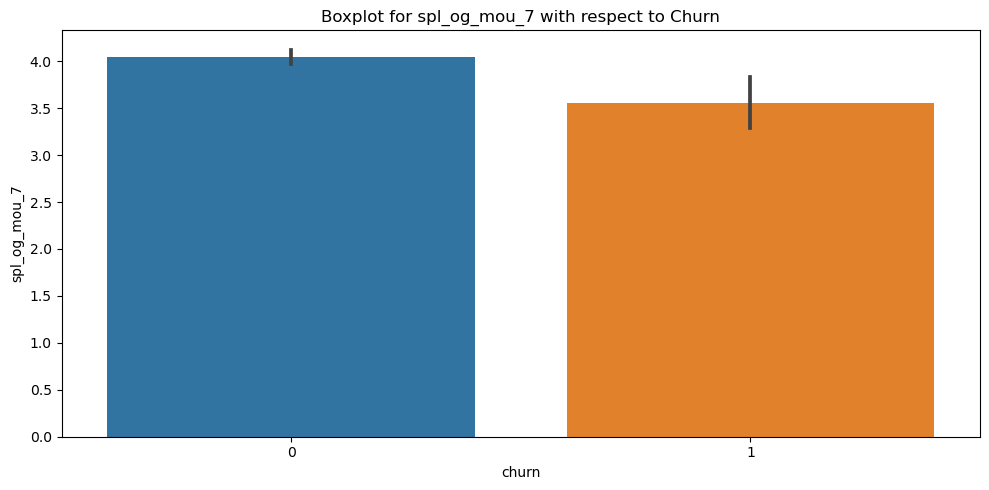

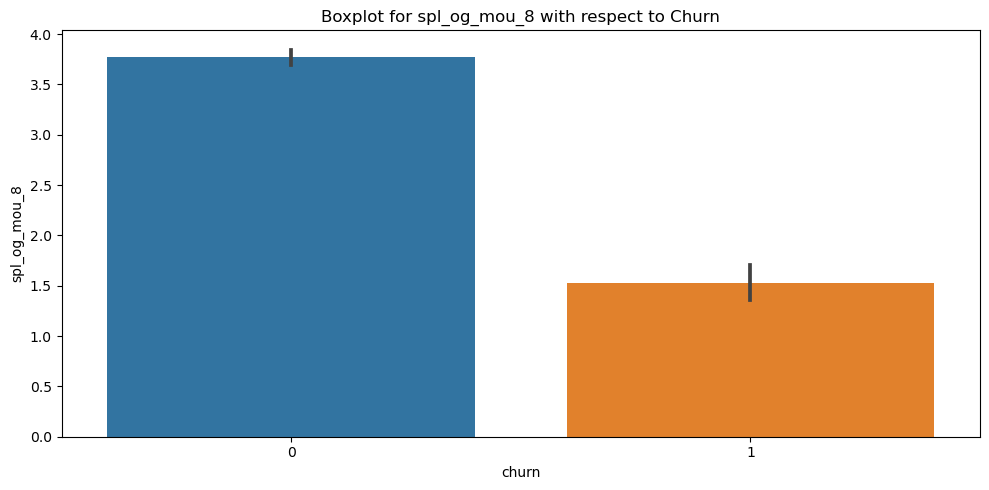

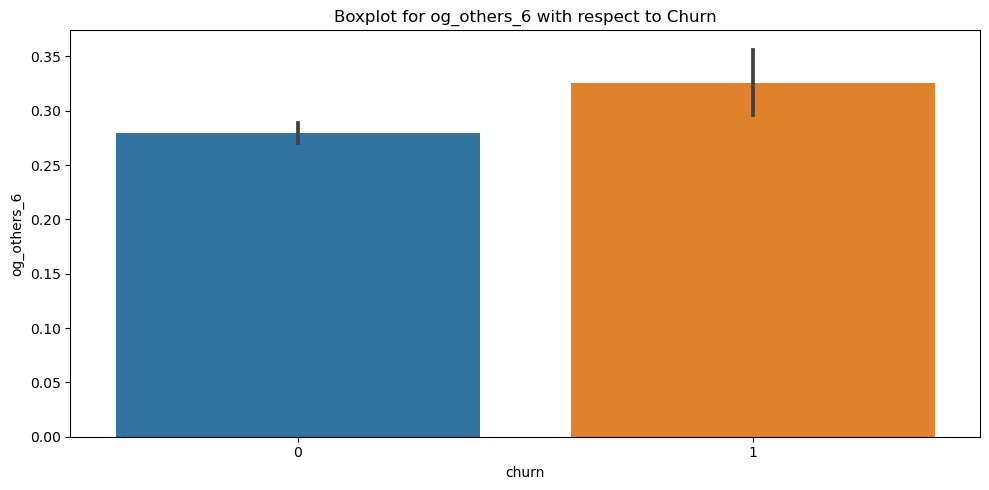

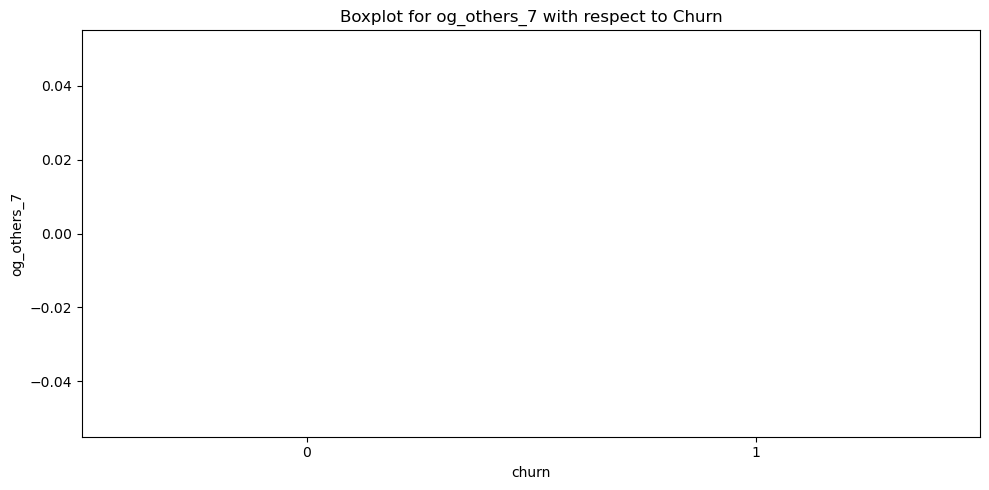

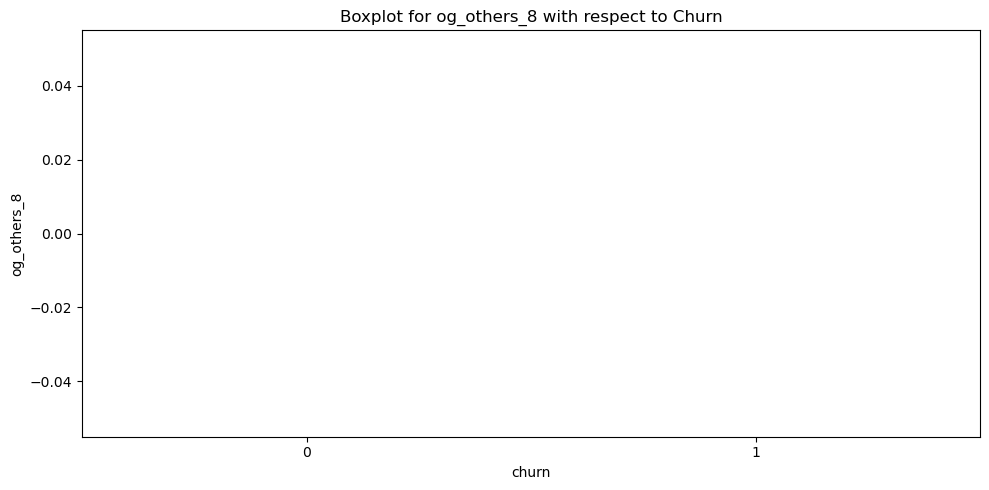

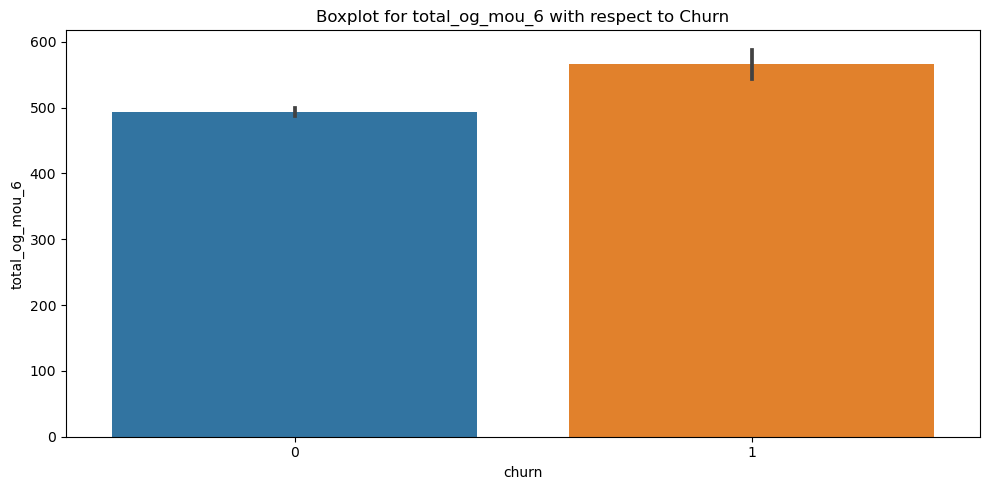

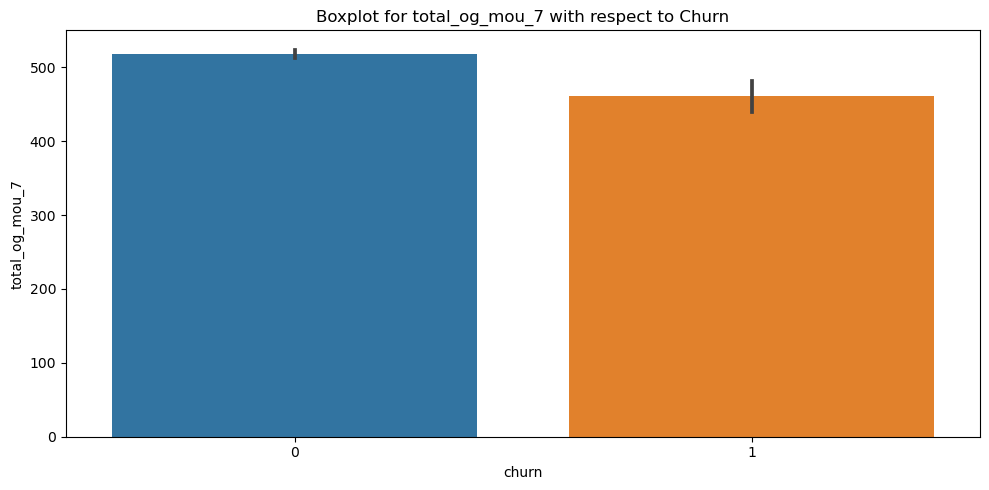

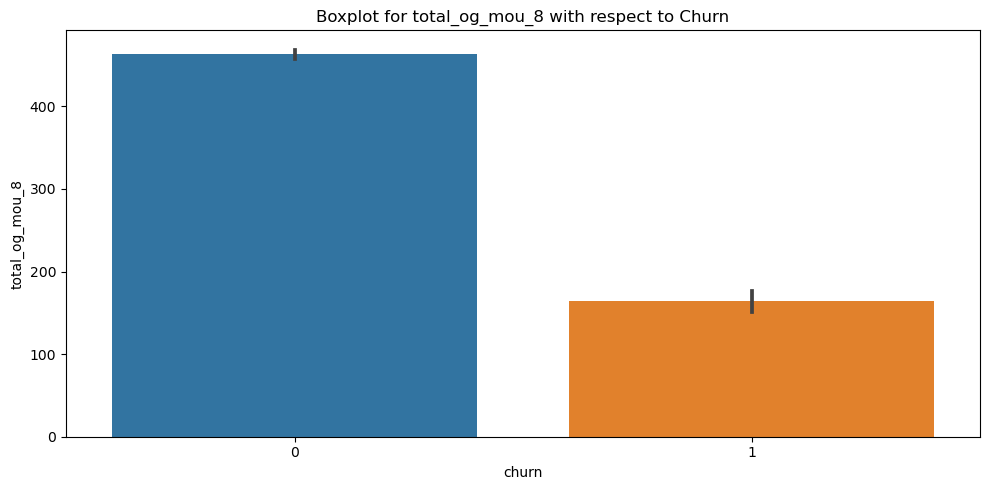

In [49]:
og_columns = data.columns[data.columns.str.contains('og')]

# Loop through rech_columns
for i in og_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

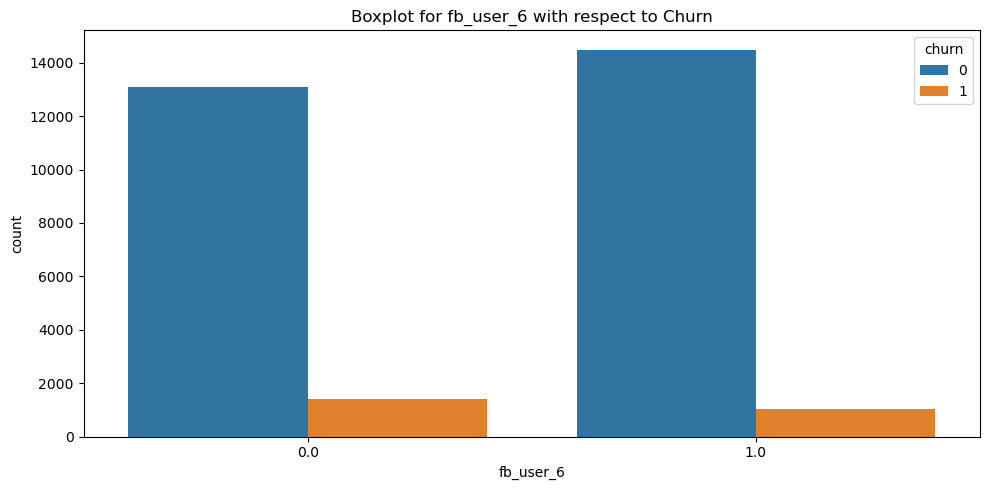

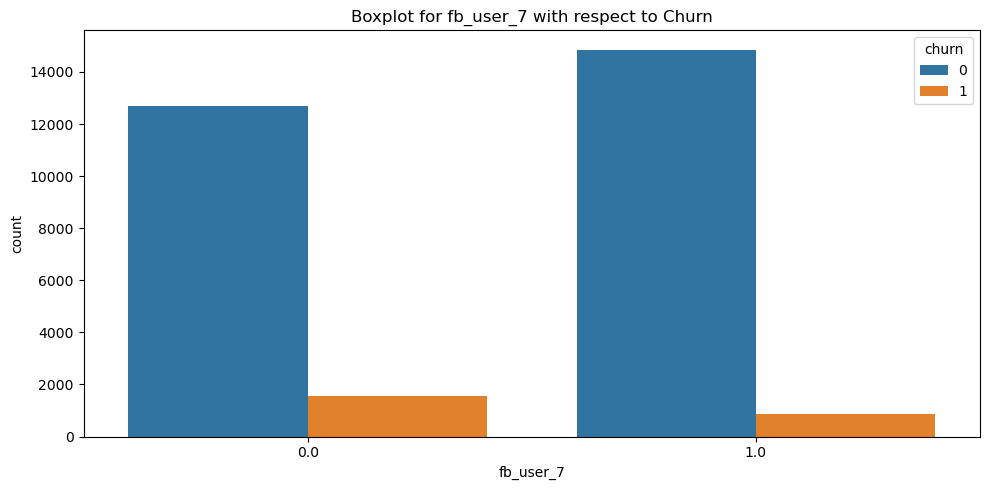

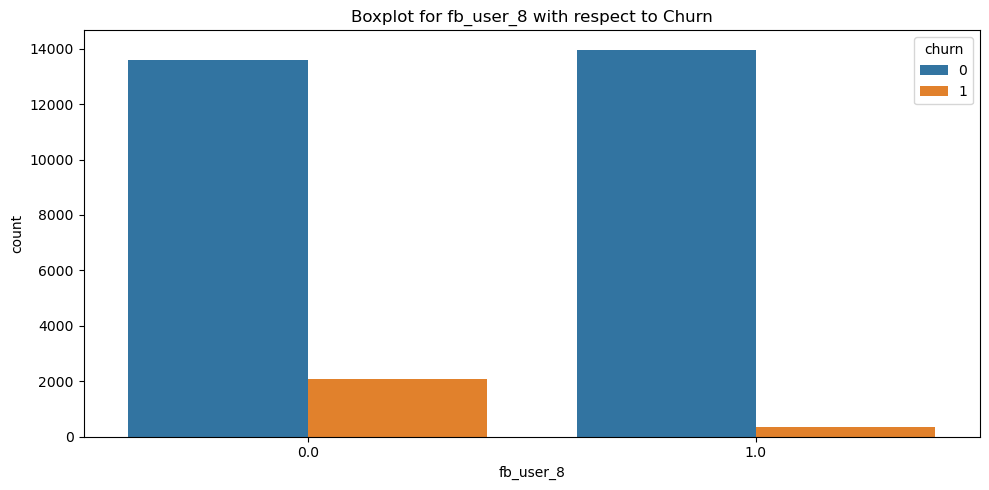

In [50]:
fb_columns = data.columns[data.columns.str.contains('fb')]

# Loop through rech_columns
for i in fb_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.countplot(x=i, data=data_ct,hue='churn')
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

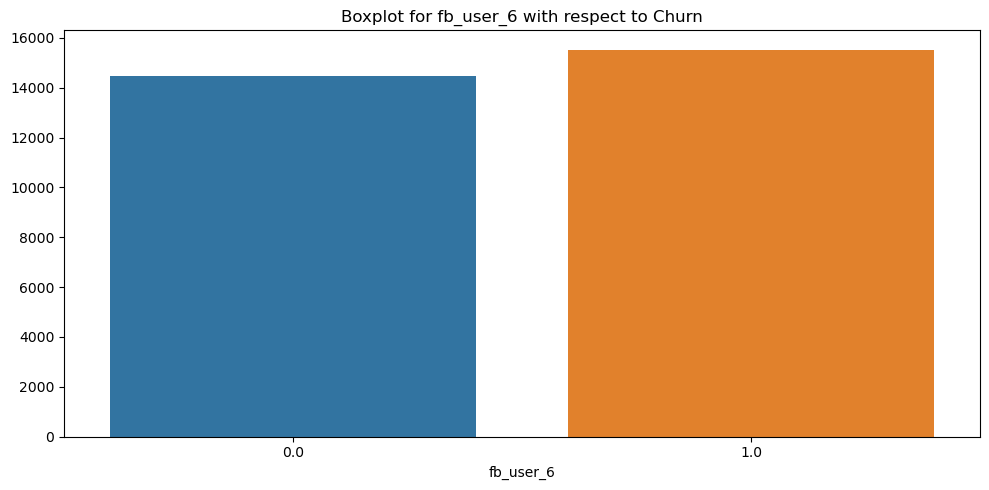

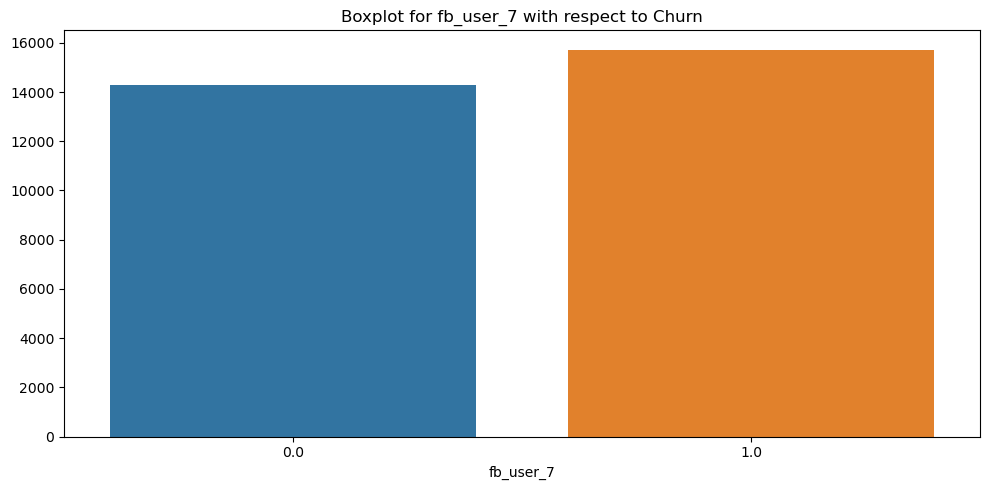

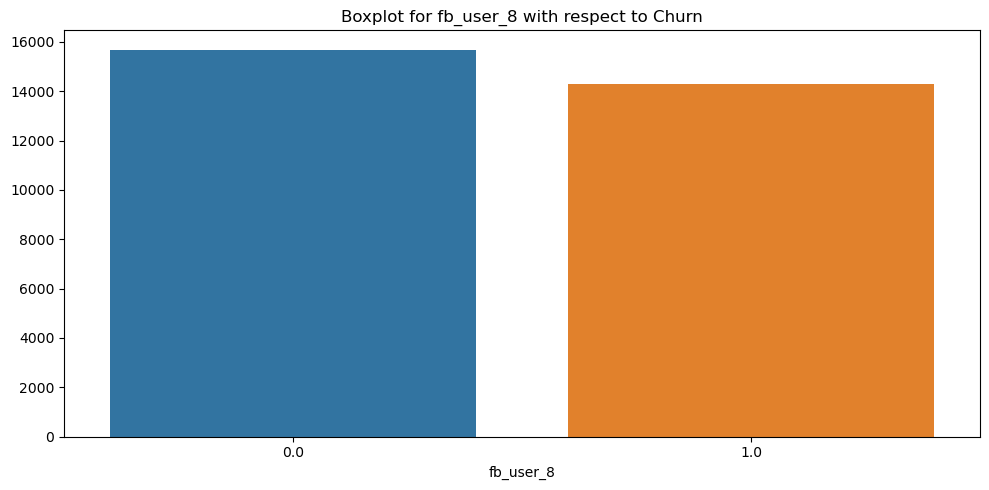

In [51]:
arpu_columns = data.columns[data.columns.str.contains('fb')]

# Loop through rech_columns
for i in arpu_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x=data[i].value_counts().index,y=data[i].value_counts().values, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

In [52]:
raw_data['last_date_of_month_6']=pd.to_datetime(raw_data['last_date_of_month_6']).dt.day


In [53]:
# raw_data['date_of_last_rech_6']=pd.to_datetime(raw_data['date_of_last_rech_6']).dt.day

In [54]:
# (raw_data['last_date_of_month_6']-raw_data['date_of_last_rech_6']).value_counts().plot.bar()


In [56]:
y=data.pop('churn')
X=data

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)
X, y=smote.fit_resample(X,y)

In [58]:
X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6_7
0,197.385000,214.816000,213.803000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,4.130000,0.000000,0.000000,1.150000,0.000000,0.000000,5.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.440000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4,3,2,362,252,252,252,252,252,252,252,252,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.0,252.000000,252.000000,252.000000,30.130000,1.320000,5.75000,83.570000,150.760000,109.61,212.170000,212.170000,212.17,212.170000,212.170000,212.17,0.000000,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.000000,1.0,1.000000,968,30.400000,0.000000,101.200000,3.58,559.000000
1,1069.180000,1349.850000,3171.480000,57.840000,54.680000,52.290000,453.430000,567.160000,325.910000,16.230000,33.490000,31.640000,23.740000,12.590000,38.060000,51.390000,31.380000,40.280000,308.630000,447.380000,162.280000,62.130000,55.140000,53.230000,0.000000,0.000000,0.000000,422.160000,533.910000,255.790000,4.300000,23.290000,12.010000,49.890000,31.760000,49.140000,6.660000,20.080000,16.68,60.860000,75.140000,77.840000,0.0,0.18,10.01,4.500000,0.000000,6.500000,0.000000,0.0,0.0,487.530000,609.240000,350.160000,58.140000,32.260000,27.310000,217.560000,221.490000,121.190000,152.160000,101.460000,

In [59]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
col=X.columns
X[col]=scale.fit_transform(X[col])
X.describe()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6_7
count,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,55120.000000,551

PCA

In [60]:
from sklearn.decomposition import PCA
pca=PCA(.99).fit(X)
len(pca.components_)

54

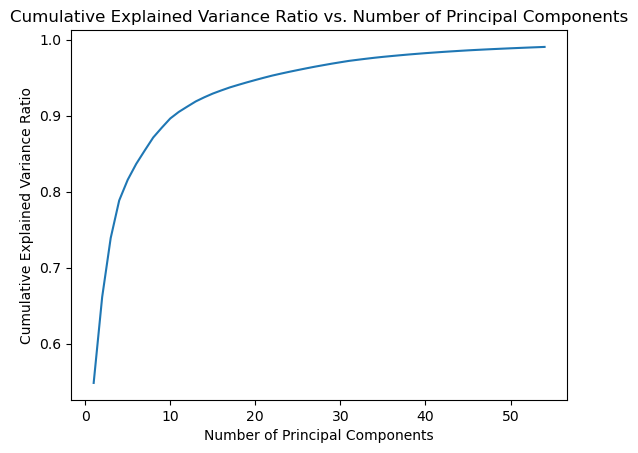

In [61]:
cum_sumed = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_sumed) + 1), cum_sumed)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.show()


In [ ]:
# from above we observed that 
# around 95 % data can be explained  by 30 Components
# and 99 % by 50+
# to keep the fetures less an dmake less complexity I will choose 30

In [62]:
pca2=PCA(n_components=30)
X=pca2.fit_transform(X)

In [97]:
pca2.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29'], dtype=object)

In [63]:
X.shape

(55120, 30)

Modeling

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgm
from sklearn.pipeline import Pipeline

In [66]:
from xgboost import XGBClassifier

In [67]:
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [68]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, precision_recall_curve, roc_auc_score, make_scorer

In [69]:
def eva(m,X, y):
    print('accuracy_score', accuracy_score(m.predict(X),y))
    print('recall_score', recall_score(m.predict(X),y))
    print('precision_score', precision_score(m.predict(X),y))
    print('auc_roc', roc_auc_score(m.predict(X),y))

In [70]:
eva(lr, X, y)

accuracy_score 0.8376451378809869
recall_score 0.8252420397749117
precision_score 0.8567126269956459
auc_roc 0.8381368824247073


Decision Tree

In [71]:
dt=DecisionTreeClassifier(random_state=42)

In [72]:
dt.fit(X,y)

DecisionTreeClassifier(random_state=42)

In [73]:
eva(dt,X,y)

accuracy_score 1.0
recall_score 1.0
precision_score 1.0
auc_roc 1.0


In [74]:
rf=RandomForestClassifier(random_state=42).fit(X,y)
eva(rf,X,y)

accuracy_score 1.0
recall_score 1.0
precision_score 1.0
auc_roc 1.0


In [75]:
xg=XGBClassifier(random_state=42).fit(X,y)
eva(xg,X,y)

accuracy_score 0.9694121915820029
recall_score 0.960850669706469
precision_score 0.9787010159651669
auc_roc 0.969574255290975


In [ ]:
# on default hyperparametrs least over fit model was XGBClassifier followed by RandomForestClassifier and then DecisionTreeClassifier
# while  r2 score of LR is negative indicating not suitable for the same 

hypertuning

In [ ]:
# for RandomForestClassifier & DT

In [76]:
para={'max_depth':[3,4,5,6,],
      'max_leaf_nodes':[10,20, 30,40,50],
      'n_estimators':[20,50,100, 150,200, 250],
      'learing_rate':[.001,.01,.1,1 ,10]}

In [77]:
from sklearn.model_selection import  RandomizedSearchCV

In [ ]:
# RandomizedSearchCV?

Init signature:
RandomizedSearchCV(
    estimator,
    param_distributions,
    *,
    n_iter=10,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    random_state=None,
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Randomized search on hyper parameters.

RandomizedSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but
rather a fixed number of parameter settings is sampled from the specified
distributions. The number of parameter settings that are tried is
given by n_iter.

If all parameters are presented as a list,
sampling without replacement is p

In [78]:
random_search=RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=para, cv=5,scoring=['recall', 'precision'],refit='recall', n_jobs=-1)

In [79]:
random_search.fit(X,y)

c:\Users\dhima\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "learing_rate", "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learing_rate': [0.001, 0.01, 0.1, 1,
                                                         10],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50],
                                        'n_estimators': [20, 50, 100, 150, 200,
                                                         250]},
                   refit='recall', scoring=['recall', 'precision'])

In [83]:
random_search.best_params_
# d=pd.DataFrame(random_search.cv_results_)

# d.head()

{'n_estimators': 250,
 'max_leaf_nodes': 30,
 'max_depth': 6,
 'learing_rate': 0.01}

In [84]:
final_xg=XGBClassifier(n_estimators= 250,
max_leaf_nodes= 30,
 max_depth= 6,
 learing_rate= 0.001).fit(X,y)

c:\Users\dhima\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [00:03:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "learing_rate", "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


In [85]:
eva(final_xg, X, y)

accuracy_score 0.9971879535558781
recall_score 0.9955516979494412
precision_score 0.9988388969521045
auc_roc 0.9971933741849576


TEsting

In [99]:
churn_data.columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9'],
      dtype='object')

SyntaxError: invalid syntax (697266066.py, line 1)

In [ ]:
para_rf={'max_depth':[3,4,5,6,],
      'max_leaf_nodes':[10,20, 30,40,50],
      'n_estimators':[20,50,100, 150,200, 250],
      }

In [ ]:
random_search=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=para_rf, cv=3,scoring=['recall','precision'],refit='recall', n_jobs=-1)

In [ ]:
random_search.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50],
                                        'n_estimators': [20, 50, 100, 150, 200,
                                                         250]},
                   refit='recall', scoring=['recall', 'precision'])

In [ ]:
d=pd.DataFrame(random_search.cv_results_)
d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_leaf_nodes,param_max_depth,params,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,2.068619,0.065575,0.022549,0.008059,20,20,5,"{'n_estimators': 20, 'max_leaf_nodes': 20, 'ma...",0.002457,0.001229,0.00000,0.001229,0.001003,2,1.0,1.0,0.000000,0.666667,0.471405,1
1,10.038953,0.017321,0.101923,0.002466,100,50,5,"{'n_estimators': 100, 'max_leaf_nodes': 50, 'm...",0.000000,0.000000,0.00000,0.000000,0.000000,3,0.0,0.0,0.000000,0.000000,0.000000,3
2,3.744010,0.032716,0.039061,0.007798,50,10,4,"{'n_estimators': 50, 'max_leaf_nodes': 10, 'ma...",0.000000,0.000000,0.00000,0.000000,0.000000,3,0.0,0.0,0.000000,0.000000,0.000000,3
3,15.446265,0.074869,0.195730,0.007129,250,50,3,"{'n_estimators': 250, 'max_leaf_nodes': 50, 'm...",0.000000,0.000000,0.00000,0.000000,0.000000,3,0.0,0.0,0.000000,0.000000,0.000000,3
4,6.052908,0.007921,0.078096,0.006795,100,30,3,"{'n_estimators': 100, 'max_leaf_nodes': 30, 'm...",0.000000,0.000000,0.00000,0.000000,0.000000,3,0.0,0.0,0.000000,0.000000,0.000000,3
5,1.230330,0.006981,0.015641,0.000016,20,10,3,"{'n_estimators': 20, 'max_leaf_nodes': 10, 'ma...",0.000000,0.000000,0.00000,0.000000,0.000000,3,0.0,0.0,0.000000,0.000000,0.000000,3
6,15.105542,0.128433,0.116485,0.000229,150,30,6,"{'n_estimators': 150, 'max_leaf_nodes': 30, 'm...",0.004914,0.002457,0.01353,0.006967,0.004748,1,0.8,0.5,0.647059,0.649020,0.122482,2
7,19.717472,0.070294,0.155129,0.006309,200,50,5,"{'n_estimators': 200, 'max_leaf_nodes': 50, 'm...",0.000000,0.000000,0.00000,0.000000,0.000000,3,0.0,0.0,0.000000,0.000000,0.000000,3
8,22.782919,0.196060,0.185762,0.013138,250,20,5,"{'n_estimators': 250, 'max_leaf_nodes': 20, 'm...",0.000000,0.000000,0.00000,0.000000,0.000000,3,0.0,0.0,0.000000,0.000000,0.000000,3
9,15.579500,0.086115,0.115802,0.000300,200,10,6,"{'n_estimators': 200, 'max_leaf_nodes': 10, 'm...",0.000000,0.000000,0.00000,0.000000,0.000000,3,0.0,0.0,0.000000,0.000000,0.000000,3


In [ ]:
rf_2=RandomForestClassifier(n_estimators= 20, max_leaf_nodes= 50,max_depth= 6)

In [ ]:
rf_2.fit(X,y)

RandomForestClassifier(max_depth=6, max_leaf_nodes=50, n_estimators=20)

In [ ]:
eva(rf_2,X,y)

accuracy_score 0.9203359888003734
recall_score 0.8695652173913043
precision_score 0.024580090126997134
auc_roc 0.8950091221260945
